# Name of Project: Bank Loan Defaulter Prediction Using Different Machine Learning Methods

In [2]:
# import Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 122) # to display all the columns
pd.set_option('display.max_rows', 307511) # to display all the rows
pd.set_option('display.width', 1000)
import plotly.express as px
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:

bld=pd.read_csv("application_data.csv")

In [4]:
# checking first % Rows
bld.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [5]:
# data understanding
bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# data understanding

bld.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   
mean   278180.518577       0.080729       0.417052      1.687979e+05  5.990260e+05   27108.573909     5.383962e+05                    0.020868  -16036.995067   63815.045904       -4986.120328     -2994.202373      12.061091       0.999997        0.819889         0.199368          0.998133       0.281066       0.056720         2.152665              2.052463                     2.031521                12.063419                    0.015144                    0.050769                     0.040659                0.078173                0.230454                 0.179555       0.502130  5.143927e-01       0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894       0.066333              0.100775        0.107399                 0.008809           0.028358         0.114231           0.087543                      0.977065          0.759637         0.042553        0.074490   
std    102790.175348       0.272419       0.722121      2.371231e+05  4.024908e+05   14493.737315     3.694465e+05                    0.013831    4363.988632  141275.766519        3522.886321      1509.450419      11.944812       0.001803        0.384280         0.399526          0.043164       0.449521       0.231307         0.910682              0.509034                     0.502737                 3.265832                    0.122126                    0.219526                     0.197499                0.268444                0.421124                 0.383817       0.211062  1.910602e-01       0.194844         0.10824          0.082438                     0.059223         0.113280        0.076036       0.134576       0.100049       0.144641       0.161380       0.081184              0.092576        0.110565                 0.047732           0.069523         0.107936           0.084307                      0.064575          0.110111         0.074445        0.132256   
min    100002.000000       0.000000       0.000000      2.

In [7]:
# checking Rows and columns
bld.shape

(307511, 122)

In [8]:
bld.columns.unique()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [9]:
#bld.select_dtypes(include=object)

In [10]:
# all categorical columns
bld.select_dtypes(include=object).columns.tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [11]:
# no of categorical columns
len(bld.select_dtypes(include=object).columns.tolist())

16

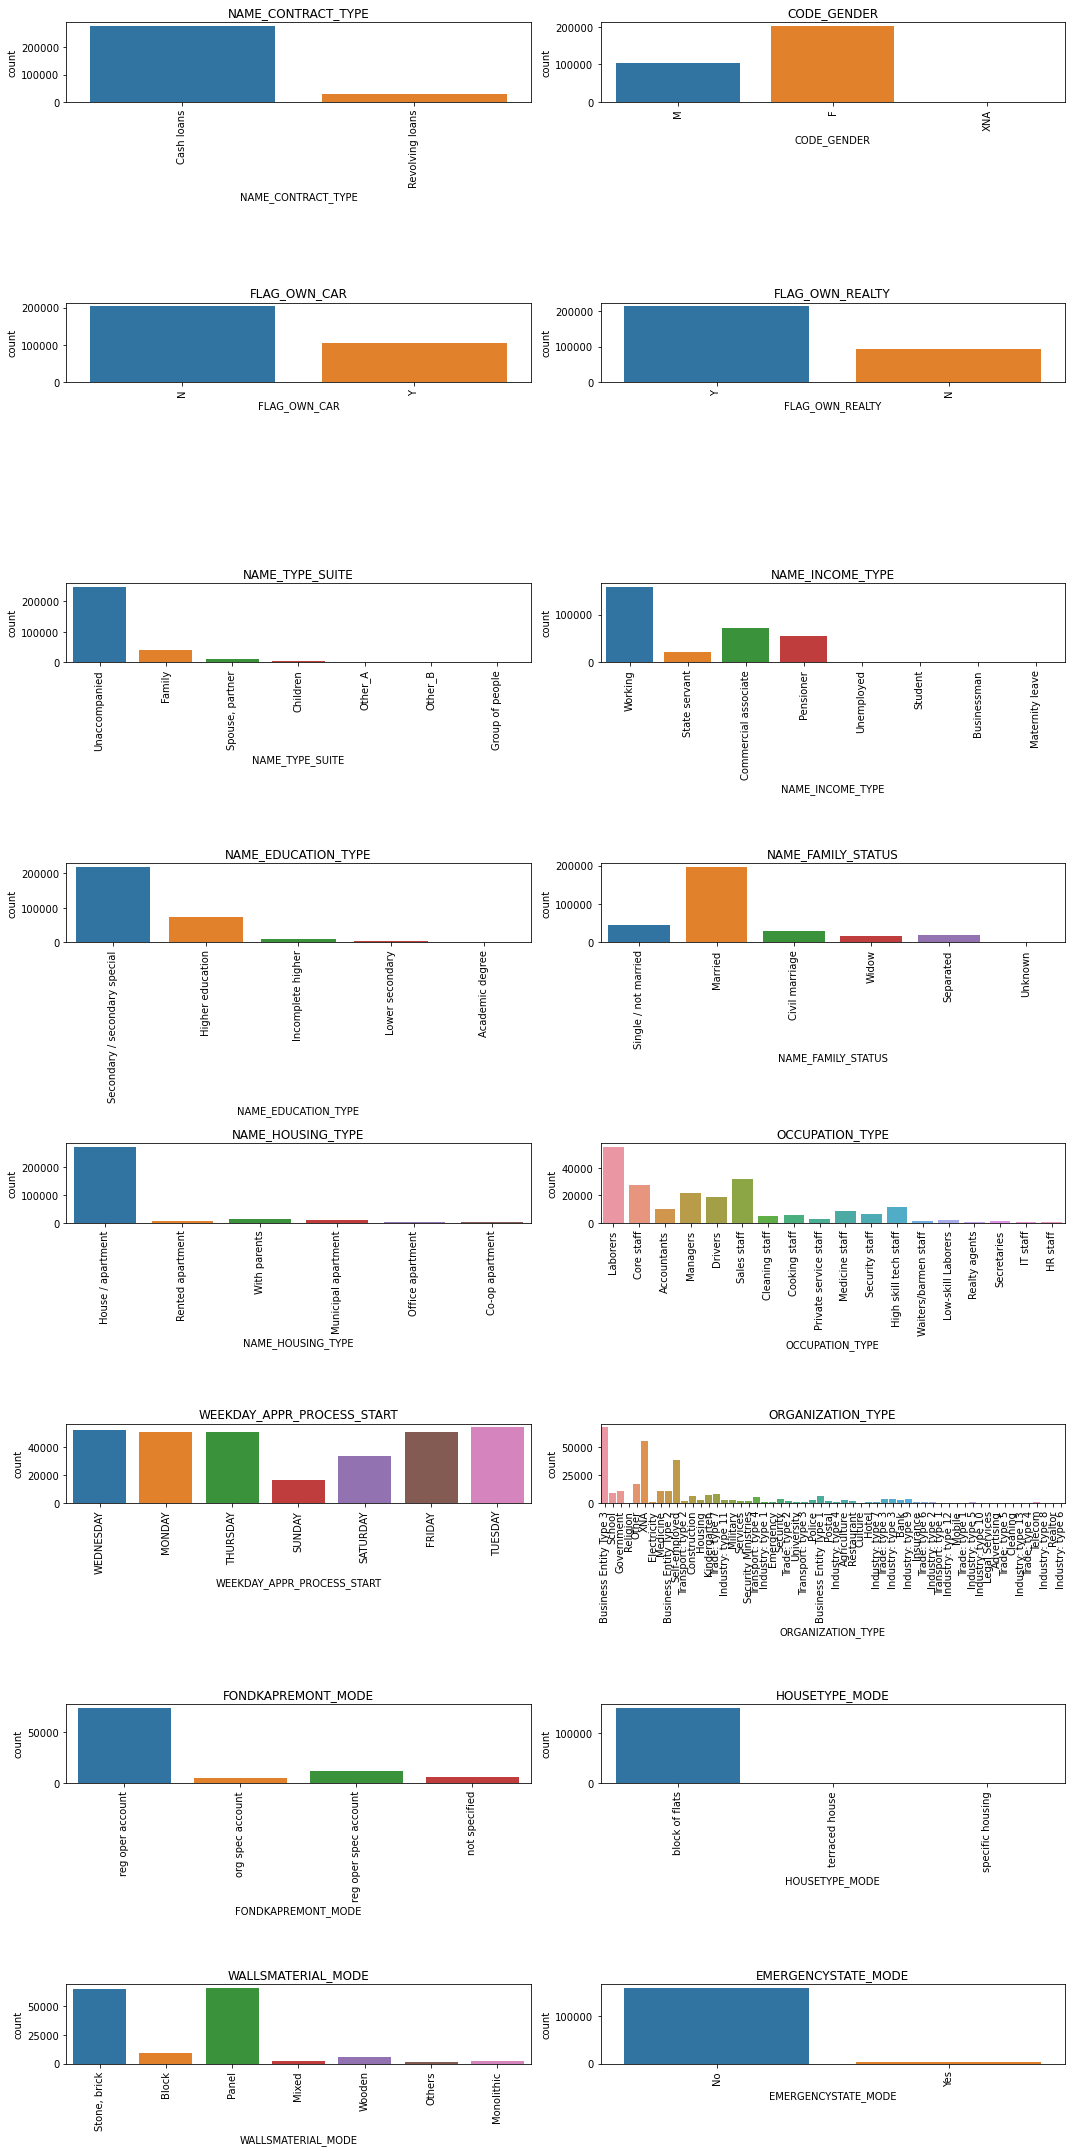

In [12]:
# making count plot for categorical features
cols1=bld.select_dtypes(include=object).columns
plt.rcParams['figure.figsize']=[15,30]

r=8
c=2
i=1

for j in cols1:
    plt.subplot(r,c,i)
    sns.countplot(x=bld.loc[:,j])
    i+=1
    plt.title(j)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [13]:
##bld.describe(include=object)

In [14]:
#bld.select_dtypes(include=np.number)

In [15]:
#  All numerical features list
bld.select_dtypes(include=np.number).columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [16]:
# no. of numerical columns
len(bld.select_dtypes(include=np.number).columns.tolist())

106

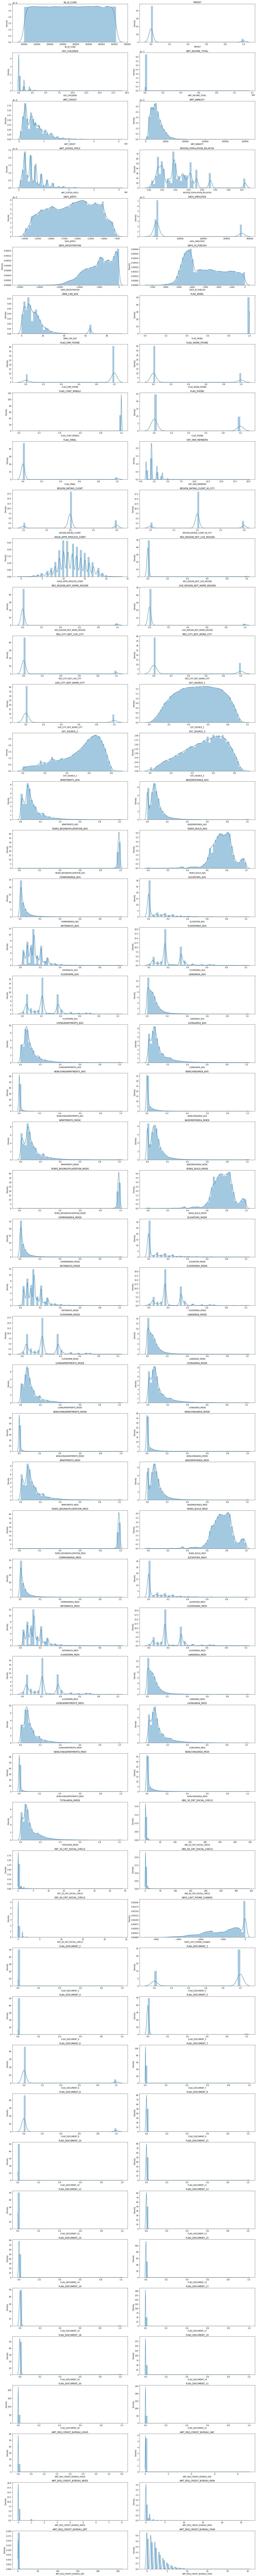

In [17]:
# distplot for  numerical columns
plt.rcParams['figure.figsize']=[20,200]
cols =bld.select_dtypes(include=np.number).columns

rows=53
columns=2
iterator=1

for i in cols:
    plt.subplot(rows,columns,iterator)
    sns.distplot(bld.loc[:,i].dropna())
    iterator+=1 
    plt.title(i)

plt.tight_layout()    
plt.show()

In [18]:
#bld.describe(include=np.number)

In [19]:
#bld.columns.unique()

In [20]:
# checking number of  duplicated rows
bld.duplicated().sum()

# there are no duplicate rows in dataset

0

In [21]:
# total  null values
bld.isnull().sum().sum()

9152465

In [22]:
bld.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [23]:
bld['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [24]:
#finding missing values percentage in each columns
percent_missing=bld.isnull().sum()*100/len(bld)

In [25]:
percent_missing

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [26]:
percent_missing_bld=pd.DataFrame({'column_name':bld.columns,'percent_missing'
                                  :percent_missing})

In [27]:
percent_missing_bld

column_name  percent_missing
SK_ID_CURR                                      SK_ID_CURR         0.000000
TARGET                                              TARGET         0.000000
NAME_CONTRACT_TYPE                      NAME_CONTRACT_TYPE         0.000000
CODE_GENDER                                    CODE_GENDER         0.000000
FLAG_OWN_CAR                                  FLAG_OWN_CAR         0.000000
FLAG_OWN_REALTY                            FLAG_OWN_REALTY         0.000000
CNT_CHILDREN                                  CNT_CHILDREN         0.000000
AMT_INCOME_TOTAL                          AMT_INCOME_TOTAL         0.000000
AMT_CREDIT                                      AMT_CREDIT         0.000000
AMT_ANNUITY                                    AMT_ANNUITY         0.003902
AMT_GOODS_PRICE                            AMT_GOODS_PRICE         0.090403
NAME_TYPE_SUITE                            NAME_TYPE_SUITE         0.420148
NAME_INCOME_TYPE                          NAME_INCOME_TYPE         0.000000
NAME_EDUCATION_TYPE                    NAME_EDUCATION_TYPE         0.000000
NAME_FAMILY_STATUS                      NAME_FAMILY_STATUS         0.000000
NAME_HOUSING_TYPE                        NAME_HOUSING_TYPE         0.000000
REGION_POPULATION_RELATIVE      REGION_POPULATION_RELATIVE         0.000000
DAYS_BIRTH                                      DAYS_BIRTH         0.000000
DAYS_EMPLOYED                                DAYS_EMPLOYED         0.000000
DAYS_REGISTRATION                        DAYS_REGISTRATION         0.000000
DAYS_ID_PUBLISH                            DAYS_ID_PUBLISH         0.000000
OWN_CAR_AGE                                    OWN_CAR_AGE        65.990810
FLAG_MOBIL                                      FLAG_MOBIL         0.000000
FLAG_EMP_PHONE                              FLAG_EMP_PHONE         0.000000
FLAG_WORK_PHONE                            FLAG_WORK_PHONE         0.000000
FLAG_CONT_MOBILE                          FLAG_CONT_MOBILE         0.000000
FLAG_PHONE                                      FLAG_PHONE         0.000000
FLAG_EMAIL                                      FLAG_EMAIL         0.000000
OCCUPATION_TYPE                            OCCUPATION_TYPE        31.345545
CNT_FAM_MEMBERS                            CNT_FAM_MEMBERS         0.000650
REGION_RATING_CLIENT                  REGION_RATING_CLIENT         0.000000
REGION_RATING_CLIENT_W_CITY    REGION_RATING_CLIENT_W_CITY         0.000000
WEEKDAY_APPR_PROCESS_START      WEEKDAY_APPR_PROCESS_START         0.000000
HOUR_APPR_PROCESS_START            HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      REG_REGION_NOT_LIVE_REGION         0.000000
REG_REGION_NOT_WORK_REGION      REG_REGION_NOT_WORK_REGION         0.000000
LIVE_REGION_NOT_WORK_REGION    LIVE_REGION_NOT_WORK_REGION         0.000000
REG_CITY_NOT_LIVE_CITY              REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY              REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY            LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE                        ORGANIZATION_TYPE         0.000000
EXT_SOURCE_1                                  EXT_SOURCE_1        56.381073
EXT_SOURCE_2                                  EXT_SOURCE_2         0.214626
EXT_SOURCE_3                                  EXT_SOURCE_3        19.825307
APARTMENTS_AVG                              APARTMENTS_AVG        50.749729
BASEMENTAREA_AVG                          BASEMENTAREA_AVG        58.515956
YEARS_BEGINEXPLUATATION_AVG    YEARS_BEGINEXPLUATATION_AVG        48.781019
YEARS_BUILD_AVG                            YEARS_BUILD_AVG        66.497784
COMMONAREA_AVG                              COMMONAREA_AVG        69.872297
ELEVATORS_AVG                                ELEVATORS_AVG        53.295980
ENTRANCES_AVG                                ENTRANCES_AVG        50.348768
FLOORSMAX_AVG                                FLOORSMAX_AVG        49.760822
FLOORSMIN_AVG      

In [28]:
# lets sort missing values by percentage
percent_missing_bld.sort_values('percent_missing')

column_name  percent_missing
SK_ID_CURR                                      SK_ID_CURR         0.000000
HOUR_APPR_PROCESS_START            HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_WORK_REGION      REG_REGION_NOT_WORK_REGION         0.000000
LIVE_REGION_NOT_WORK_REGION    LIVE_REGION_NOT_WORK_REGION         0.000000
REG_CITY_NOT_LIVE_CITY              REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY              REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY            LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE                        ORGANIZATION_TYPE         0.000000
FLAG_DOCUMENT_21                          FLAG_DOCUMENT_21         0.000000
FLAG_DOCUMENT_20                          FLAG_DOCUMENT_20         0.000000
FLAG_DOCUMENT_19                          FLAG_DOCUMENT_19         0.000000
FLAG_DOCUMENT_18                          FLAG_DOCUMENT_18         0.000000
FLAG_DOCUMENT_17                          FLAG_DOCUMENT_17         0.000000
FLAG_DOCUMENT_16                          FLAG_DOCUMENT_16         0.000000
FLAG_DOCUMENT_15                          FLAG_DOCUMENT_15         0.000000
FLAG_DOCUMENT_14                          FLAG_DOCUMENT_14         0.000000
FLAG_DOCUMENT_13                          FLAG_DOCUMENT_13         0.000000
FLAG_DOCUMENT_12                          FLAG_DOCUMENT_12         0.000000
FLAG_DOCUMENT_11                          FLAG_DOCUMENT_11         0.000000
FLAG_DOCUMENT_10                          FLAG_DOCUMENT_10         0.000000
FLAG_DOCUMENT_9                            FLAG_DOCUMENT_9         0.000000
FLAG_DOCUMENT_8                            FLAG_DOCUMENT_8         0.000000
FLAG_DOCUMENT_7                            FLAG_DOCUMENT_7         0.000000
FLAG_DOCUMENT_6                            FLAG_DOCUMENT_6         0.000000
FLAG_DOCUMENT_5                            FLAG_DOCUMENT_5         0.000000
FLAG_DOCUMENT_4                            FLAG_DOCUMENT_4         0.000000
FLAG_DOCUMENT_3                            FLAG_DOCUMENT_3         0.000000
FLAG_DOCUMENT_2                            FLAG_DOCUMENT_2         0.000000
WEEKDAY_APPR_PROCESS_START      WEEKDAY_APPR_PROCESS_START         0.000000
REGION_RATING_CLIENT_W_CITY    REGION_RATING_CLIENT_W_CITY         0.000000
REG_REGION_NOT_LIVE_REGION      REG_REGION_NOT_LIVE_REGION         0.000000
NAME_HOUSING_TYPE                        NAME_HOUSING_TYPE         0.000000
CNT_CHILDREN                                  CNT_CHILDREN         0.000000
NAME_INCOME_TYPE                          NAME_INCOME_TYPE         0.000000
NAME_EDUCATION_TYPE                    NAME_EDUCATION_TYPE         0.000000
NAME_FAMILY_STATUS                      NAME_FAMILY_STATUS         0.000000
REGION_RATING_CLIENT                  REGION_RATING_CLIENT         0.000000
REGION_POPULATION_RELATIVE      REGION_POPULATION_RELATIVE         0.000000
DAYS_BIRTH                                      DAYS_BIRTH         0.000000
DAYS_EMPLOYED                                DAYS_EMPLOYED         0.000000
DAYS_REGISTRATION                        DAYS_REGISTRATION         0.000000
DAYS_ID_PUBLISH                            DAYS_ID_PUBLISH         0.000000
AMT_INCOME_TOTAL                          AMT_INCOME_TOTAL         0.000000
FLAG_OWN_REALTY                            FLAG_OWN_REALTY         0.000000
CODE_GENDER                                    CODE_GENDER         0.000000
NAME_CONTRACT_TYPE                      NAME_CONTRACT_TYPE         0.000000
FLAG_MOBIL                                      FLAG_MOBIL         0.000000
FLAG_EMP_PHONE                              FLAG_EMP_PHONE         0.000000
FLAG_WORK_PHONE                            FLAG_WORK_PHONE         0.000000
FLAG_CONT_MOBILE                          FLAG_CONT_MOBILE         0.000000
FLAG_PHONE                                      FLAG_PHONE         0.000000
TARGET                                              TARGET         0.000000
FLAG_EMAIL         

In [29]:
# lets sort missing values by percentage
percent_missing_bld.sort_values('percent_missing',ascending=False)

column_name  percent_missing
COMMONAREA_MEDI                            COMMONAREA_MEDI        69.872297
COMMONAREA_AVG                              COMMONAREA_AVG        69.872297
COMMONAREA_MODE                            COMMONAREA_MODE        69.872297
NONLIVINGAPARTMENTS_MODE          NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG            NONLIVINGAPARTMENTS_AVG        69.432963
NONLIVINGAPARTMENTS_MEDI          NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE                      FONDKAPREMONT_MODE        68.386172
LIVINGAPARTMENTS_MODE                LIVINGAPARTMENTS_MODE        68.354953
LIVINGAPARTMENTS_AVG                  LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI                LIVINGAPARTMENTS_MEDI        68.354953
FLOORSMIN_AVG                                FLOORSMIN_AVG        67.848630
FLOORSMIN_MODE                              FLOORSMIN_MODE        67.848630
FLOORSMIN_MEDI                              FLOORSMIN_MEDI        67.848630
YEARS_BUILD_MEDI                          YEARS_BUILD_MEDI        66.497784
YEARS_BUILD_MODE                          YEARS_BUILD_MODE        66.497784
YEARS_BUILD_AVG                            YEARS_BUILD_AVG        66.497784
OWN_CAR_AGE                                    OWN_CAR_AGE        65.990810
LANDAREA_MEDI                                LANDAREA_MEDI        59.376738
LANDAREA_MODE                                LANDAREA_MODE        59.376738
LANDAREA_AVG                                  LANDAREA_AVG        59.376738
BASEMENTAREA_MEDI                        BASEMENTAREA_MEDI        58.515956
BASEMENTAREA_AVG                          BASEMENTAREA_AVG        58.515956
BASEMENTAREA_MODE                        BASEMENTAREA_MODE        58.515956
EXT_SOURCE_1                                  EXT_SOURCE_1        56.381073
NONLIVINGAREA_MODE                      NONLIVINGAREA_MODE        55.179164
NONLIVINGAREA_AVG                        NONLIVINGAREA_AVG        55.179164
NONLIVINGAREA_MEDI                      NONLIVINGAREA_MEDI        55.179164
ELEVATORS_MEDI                              ELEVATORS_MEDI        53.295980
ELEVATORS_AVG                                ELEVATORS_AVG        53.295980
ELEVATORS_MODE                              ELEVATORS_MODE        53.295980
WALLSMATERIAL_MODE                      WALLSMATERIAL_MODE        50.840783
APARTMENTS_MEDI                            APARTMENTS_MEDI        50.749729
APARTMENTS_AVG                              APARTMENTS_AVG        50.749729
APARTMENTS_MODE                            APARTMENTS_MODE        50.749729
ENTRANCES_MEDI                              ENTRANCES_MEDI        50.348768
ENTRANCES_AVG                                ENTRANCES_AVG        50.348768
ENTRANCES_MODE                              ENTRANCES_MODE        50.348768
LIVINGAREA_AVG                              LIVINGAREA_AVG        50.193326
LIVINGAREA_MODE                            LIVINGAREA_MODE        50.193326
LIVINGAREA_MEDI                            LIVINGAREA_MEDI        50.193326
HOUSETYPE_MODE                              HOUSETYPE_MODE        50.176091
FLOORSMAX_MODE                              FLOORSMAX_MODE        49.760822
FLOORSMAX_MEDI                              FLOORSMAX_MEDI        49.760822
FLOORSMAX_AVG                                FLOORSMAX_AVG        49.760822
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MODE        48.781019
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MEDI        48.781019
YEARS_BEGINEXPLUATATION_AVG    YEARS_BEGINEXPLUATATION_AVG        48.781019
TOTALAREA_MODE                              TOTALAREA_MODE        48.268517
EMERGENCYSTATE_MODE                    EMERGENCYSTATE_MODE        47.398304
OCCUPATION_TYPE                            OCCUPATION_TYPE        31.345545
EXT_SOURCE_3                                  EXT_SOURCE_3        19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      AMT_REQ_CREDIT_BUREAU_HOUR        13.501631
AMT_REQ_CREDIT_BURE

In [30]:
# columns that have null values more than 50%
nv50=percent_missing[percent_missing>=50]
nv50

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [31]:
len(nv50)
# 41 columns have null values more than  or equal to 50% 

41

In [32]:
# columns that have null values more than 40%
nv40=percent_missing[percent_missing>=40]
nv40.sort_values(ascending=True)

EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
HOUSETYPE_MODE                  50.176091
LIVINGAREA_MODE                 50.193326
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MEDI                 50.193326
ENTRANCES_MEDI                  50.348768
ENTRANCES_MODE                  50.348768
ENTRANCES_AVG                   50.348768
APARTMENTS_MEDI                 50.749729
APARTMENTS_MODE                 50.749729
APARTMENTS_AVG                  50.749729
WALLSMATERIAL_MODE              50.840783
ELEVATORS_AVG                   53.295980
ELEVATORS_MODE                  53.295980
ELEVATORS_MEDI                  53.295980
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_AVG               55

In [33]:
bld.corr()

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129         -0.001820   -0.000343    -0.000433        -0.000232                    0.000849   -0.001500       0.001366          -0.000973        -0.000384     0.001818    0.002804       -0.001337        -0.000415          0.002815    0.002753    0.000281        -0.002895             -0.001075                    -0.001138                 0.000350                   -0.000283                    0.001097                     0.002903               -0.001885               -0.001582                 0.000067      0.000082      0.002342      0.000222        0.001556         -0.002070                     0.001551         0.005900       -0.001463       0.004862      -0.002879       0.004851       0.003083      0.001465              0.003119        0.001770                -0.002575           0.003042         0.001961          -0.001411                      0.001890          0.005245        -0.001058        0.005017       -0.002844   
TARGET                         -0.002108  1.000000      0.019187         -0.003982   -0.030369    -0.012817        -0.039645                   -0.037227    0.078239      -0.044932           0.041975         0.051457     0.037612    0.000534        0.045982         0.028524          0.000370   -0.023806   -0.001758         0.009308              0.058899                     0.060893                -0.024166                    0.005576                    0.006942                     0.002819                0.044395                0.050994                 0.032518     -0.155317     -0.160472     -0.178919       -0.029498         -0.022746                    -0.009728        -0.022149       -0.018550      -0.034199      -0.019172      -0.044003      -0.033614     -0.010885             -0.025031       -0.032997                -0.003176          -0.013578        -0.027284          -0.019952                     -0.009036         -0.022068        -0.016340       -0.032131       -0.017387   
CNT_CHILDREN                   -0.001129  0.019187      1.000000          0.012882    0.002145     0.021374        -0.001827                   -0.025573    0.330938      -0.239818           0.183395        -0.028019     0.008494    0.001041        0.240714         0.055630         -0.000794   -0.029906    0.022619         0.879161              0.025423                     0.024781                -0.007292                   -0.013319                    0.008185                     0.014835                0.020072                0.070650                 0.069957     -0.138470     -0.018015     -0.042710       -0.013222         -0.008464                     0.006902         0.030172        0.000140      -0.007060      -0.008341      -0.009705      -0.008753     -0.003121             -0.008648       -0.010116                 0.004051           0.000028        -0.012105          -0.008513                      0.006199          0.029549         0.000440       -0.006397       -0.006880   
AMT_INCOME_TOTAL               -0.001820 -

In [34]:
len(nv40)

49

In [35]:
# lets drop columns having null values greater than 40%
null_val_40=list(percent_missing[percent_missing>=40].index)
bld.drop(labels=null_val_40, axis=1,inplace=True) 

# here we dropped 49 columns which have null values more than 40%
# now we have 73 columns in our data


In [36]:
bld.shape

(307511, 73)

In [37]:
bld.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [38]:
bld.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.262949      0.139376                       2.0                       2.0                       2.0                       2.0                 -1134.0                0                1                0                0                0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.622246           NaN                       1.0                       0.0                       1.0                       0.0                  -828.0                0                1                0                0                0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government      0.555912      0.729567                       0.0                       0.0                       0.0                       0.0                  -815.0                0                0                0                0                0   

In [39]:

bld["NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [40]:
bld["OCCUPATION_TYPE"].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [41]:
bld["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

<AxesSubplot:>

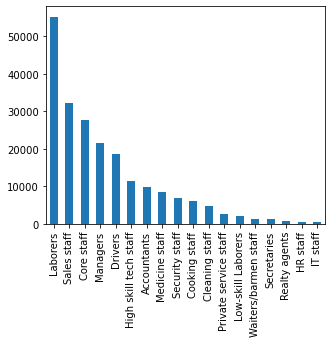

In [42]:
plt.figure(figsize=(5,4))
bld["OCCUPATION_TYPE"].value_counts().plot.bar()

In [43]:
# checking correlation of exit source with target variable 
exit_source= bld[["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
exit_source_corr = exit_source.corr()
exit_source_corr


EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_2      1.000000      0.109167 -0.160472
EXT_SOURCE_3      0.109167      1.000000 -0.178919
TARGET           -0.160472     -0.178919  1.000000

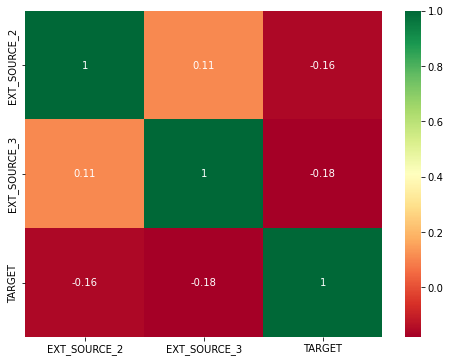

In [44]:
# heat map for correlation
plt.figure(figsize=(8,6))
ax = sns.heatmap(exit_source_corr,
            xticklabels=exit_source_corr.columns,
            yticklabels=exit_source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

# here we can see that there is no direct correlation of exit sources with target variable

In [45]:
# here we will drop exit sources columns


In [46]:

ext_src=["EXT_SOURCE_2","EXT_SOURCE_3"]
bld.drop(labels=ext_src,axis=1,inplace=True)

In [47]:
bld.shape

(307511, 71)

# Now check flag document columns

In [48]:
# flag columns +'TARGET' variable
flag_cols=bld[[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
           'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 
           'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
               'TARGET']]

<AxesSubplot:>

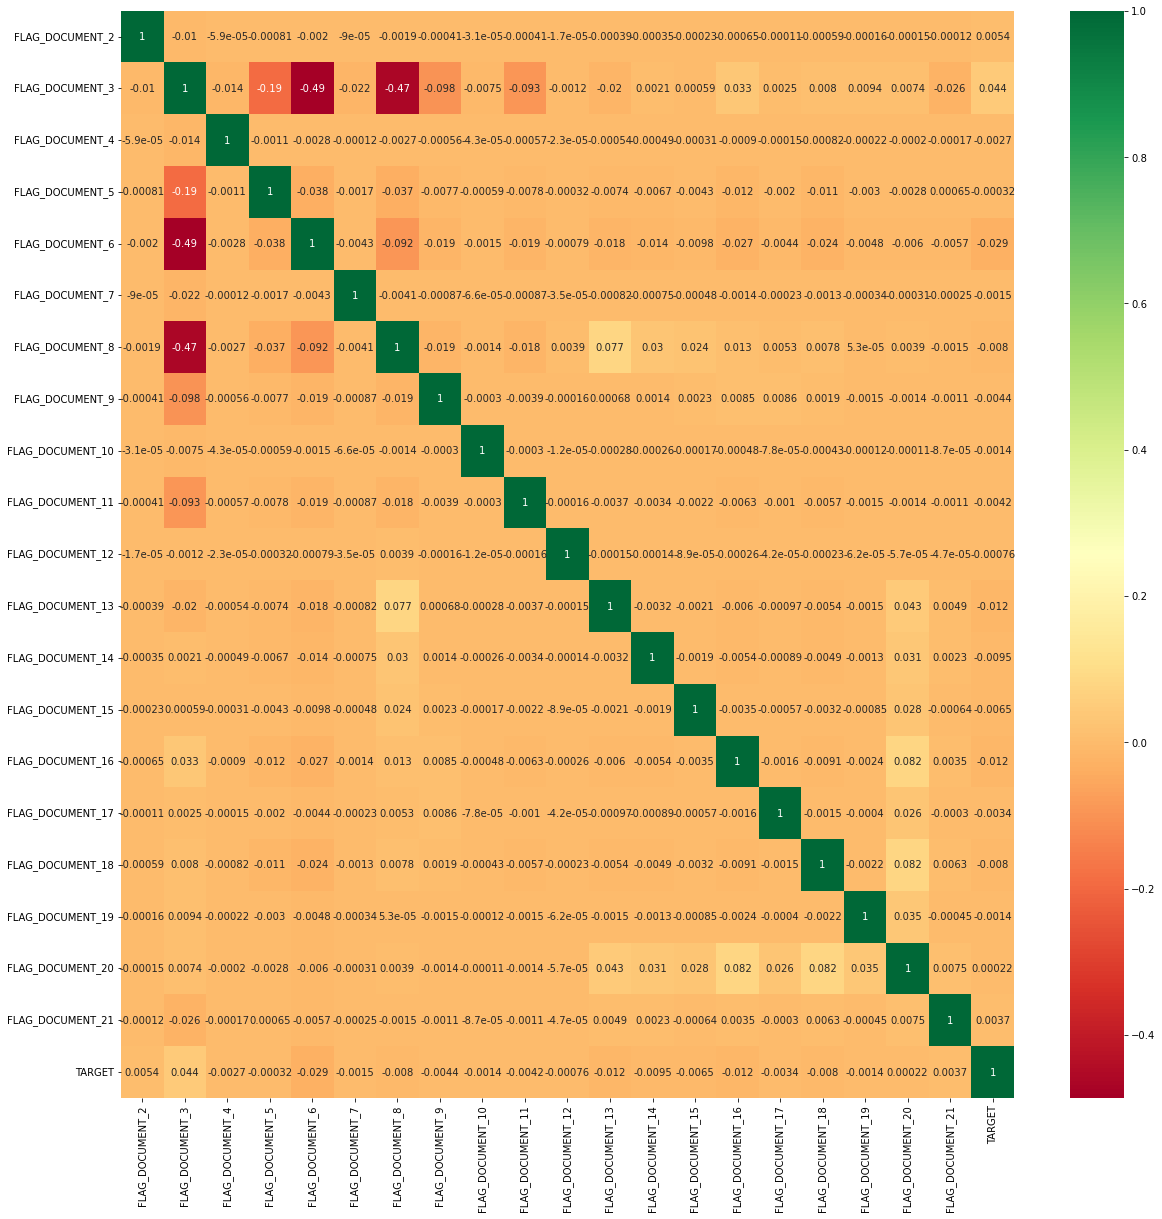

In [49]:
fig = plt.figure(figsize=(20,20))
flag_corr=flag_cols.corr()
sns.heatmap(flag_corr,
            xticklabels=flag_corr.columns,
            yticklabels=flag_corr.columns,
            annot = True,
            cmap ="RdYlGn")

In [50]:
# in above heatmap   we will analyse only 'FLAG_DOCUMENT_3'

In [51]:
# COUNTPLOT FOR CAT VS CAT SO WE CHANGE THEM INTO CATEGORICAL('OBJECT')
flag_cols.head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  TARGET
0                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       1
1                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
2                0                0                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
3                0                1                0                0                0                0                0                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0
4                0                0                0                0                0                0                1                0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0                 0       0

In [52]:
flag_cols=flag_cols.replace({0:'no',1:'yes'})


In [53]:
flag_cols.head()

FLAG_DOCUMENT_2 FLAG_DOCUMENT_3 FLAG_DOCUMENT_4 FLAG_DOCUMENT_5 FLAG_DOCUMENT_6 FLAG_DOCUMENT_7 FLAG_DOCUMENT_8 FLAG_DOCUMENT_9 FLAG_DOCUMENT_10 FLAG_DOCUMENT_11 FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14 FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 TARGET
0              no             yes              no              no              no              no              no              no               no               no               no               no               no               no               no               no               no               no               no               no    yes
1              no             yes              no              no              no              no              no              no               no               no               no               no               no               no               no               no               no               no               no               no     no
2              no              no              no              no              no              no              no              no               no               no               no               no               no               no               no               no               no               no               no               no     no
3              no             yes              no              no              no              no              no              no               no               no               no               no               no               no               no               no               no               no               no               no     no
4              no              no              no              no              no              no             yes              no               no               no               no               no               no               no               no               no               no               no               no               no     no

<AxesSubplot:xlabel='FLAG_DOCUMENT_3', ylabel='count'>

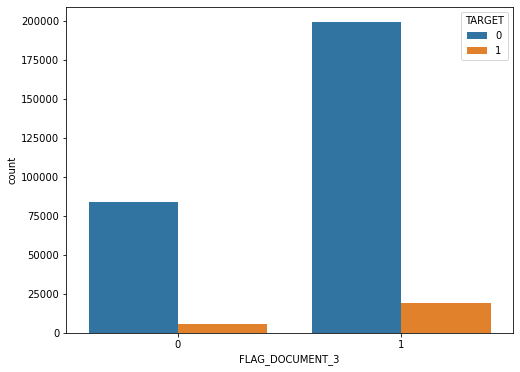

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(data=bld, x='FLAG_DOCUMENT_3',hue='TARGET')


In [55]:
flag_cols=flag_cols.drop(['TARGET'],axis=1)


In [56]:
# NOW PLOT COUNTPLOT

In [57]:
bld['FLAG_DOCUMENT_3'].value_counts()

1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64

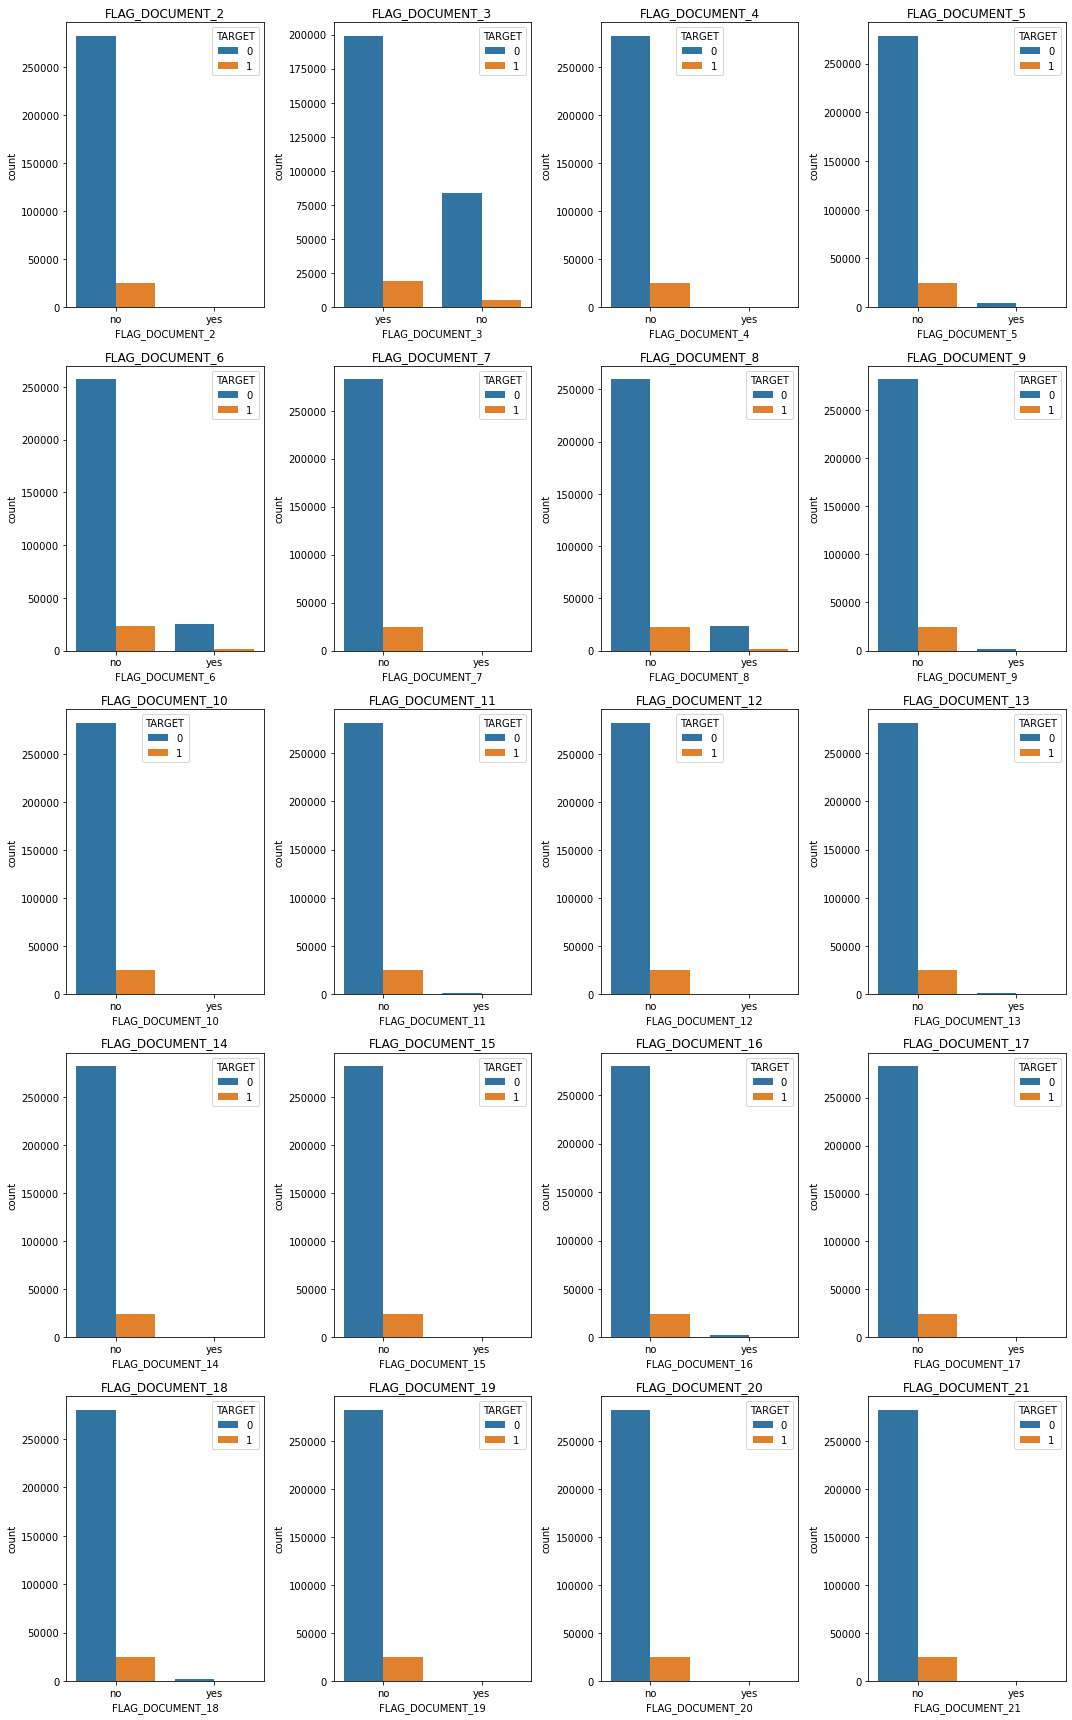

In [58]:
plt.rcParams['figure.figsize']=[15,24]

a=5
b=4
i=1

for j in flag_cols.columns:
    plt.subplot(a,b,i)
    sns.countplot(x=flag_cols[j],hue='TARGET',data= bld)
    i+=1
    plt.title(j)
    plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()
    

In [59]:
flag_cols=flag_cols.drop(['FLAG_DOCUMENT_3'],axis=1)

In [60]:
# checked if FLAG_DOCUMENT_3 dropped or not from flag_cols
flag_cols.columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'], dtype='object')

In [61]:
# now drop all (19) flag_cols except FLAG_DOCUMENT_3
bld.drop(labels=flag_cols,axis=1,inplace=True)

In [62]:
## checked if flag_cols dropped or not
bld.shape

(307511, 52)

In [63]:
## now check correlation between contact datails and TARGET
bld.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0   
3      100006       0         Cash loans           

In [64]:
# check index no. of ['FLAG_MOBIL'] so we can access them 
bld.columns.get_loc('FLAG_MOBIL')


21

In [65]:
# there are 6 columns of flag_contacts
contact_cols=bld.iloc[:,21:27].columns
contact_cols

Index(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL'], dtype='object')

In [66]:
bld.shape

(307511, 52)

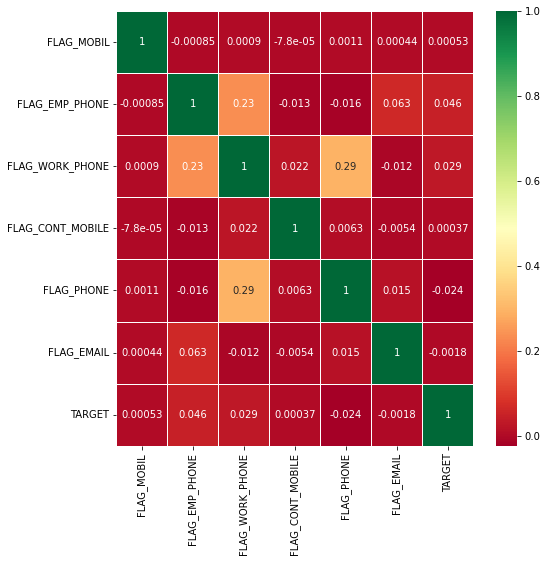

In [67]:
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = bld[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

In [68]:
# remove TARGET from contact_col
contact_col.remove('TARGET')

In [69]:
bld.drop(labels=contact_col,axis=1,inplace=True)

In [70]:
bld.shape

(307511, 46)

In [71]:
# now check date columns

date_cols = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

In [72]:
bld['DAYS_BIRTH'].describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [73]:
bld['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [74]:
bld['DAYS_REGISTRATION'].describe()

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

In [75]:
bld['DAYS_ID_PUBLISH'].describe()

count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

In [76]:
 # Above columns have negative values convert them into positive
for i in date_cols:
    bld[i]=abs(bld[i])


In [77]:
# check 
bld['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [78]:
dc= ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','TARGET']

In [79]:
bld[dc].corr()

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    TARGET
DAYS_BIRTH           1.000000       0.623941           0.331912         0.272691 -0.078239
DAYS_EMPLOYED        0.623941       1.000000           0.214573         0.274842 -0.047046
DAYS_REGISTRATION    0.331912       0.214573           1.000000         0.101896 -0.041975
DAYS_ID_PUBLISH      0.272691       0.274842           0.101896         1.000000 -0.051457
TARGET              -0.078239      -0.047046          -0.041975        -0.051457  1.000000

In [80]:
np.array(bld['AMT_CREDIT'].head(20)).T

array([ 406597.5, 1293502.5,  135000. ,  312682.5,  513000. ,  490495.5,
       1560726. , 1530000. , 1019610. ,  405000. ,  652500. ,  148365. ,
         80865. ,  918468. ,  773680.5,  299772. ,  509602.5,  270000. ,
        157500. ,  544491. ])

In [81]:
bld['AMT_CREDIT']=bld['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
range = ['0-1 lac','1 lac-2 lac', '2 lac-3 lac','3 lac-4 lac','4 lac-5 lac','5 lac-6 lac','6 lac-7 lac','7 lac-8 lac',
       '8 lac-9 lac','9 lac-1 Million', '1 Million+']

bld['AMT_CREDIT_RANGE']=pd.cut(bld['AMT_CREDIT'],bins=bins,labels=range)

In [82]:
bld['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

2 lac-3 lac        17.824728
1 Million+         16.254703
5 lac-6 lac        11.131960
4 lac-5 lac        10.418489
1 lac-2 lac         9.801275
3 lac-4 lac         8.564897
6 lac-7 lac         7.820533
8 lac-9 lac         7.086576
7 lac-8 lac         6.241403
9 lac-1 Million     2.902986
0-1 lac             1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [83]:
# lets Create bins for Age
bld['AGE'] = bld['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 plus']

bld['AGE_GROUP']=pd.cut(bld['AGE'],bins=bins,labels=slots)

In [84]:
bld['AGE_GROUP'].value_counts(normalize=True)*100

50 plus    31.604398
30-40      27.028952
40-50      24.194582
20-30      17.171743
0-20        0.000325
Name: AGE_GROUP, dtype: float64

In [85]:
#  lets Create bins for Employement Time
bld['YEARS_EMPLOYED'] = bld ['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

bld['EMPLOYMENT_YEAR']=pd.cut(bld['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [86]:
bld['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

In [87]:
 ## Create bins for income amount
bld['AMT_INCOME_TOTAL']=bld['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1 lac','1 lac-2 lac', '2 lac-3 lac','3 lac-4 lac','4 lac-5 lac','5 lac-6 lac','6 lac-7 lac','7 lac-8 lac','8 lac-9 lac','9lac-10 lac', '10 lac plus']

bld['AMT_INCOME_RANGE']=pd.cut(bld['AMT_INCOME_TOTAL'],bins,labels=slot)

In [88]:
bld['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

1 lac-2 lac    50.735000
2 lac-3 lac    21.210691
0-1 lac        20.729695
3 lac-4 lac     4.776116
4 lac-5 lac     1.744669
5 lac-6 lac     0.356354
6 lac-7 lac     0.282805
8 lac-9 lac     0.096980
7 lac-8 lac     0.052721
9lac-10 lac     0.009112
10 lac plus     0.005858
Name: AMT_INCOME_RANGE, dtype: float64

In [89]:
#  lets Create bins for Employement Time
bld['YEARS_EMPLOYED'] = bld['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

bld['EMPLOYMENT_YEAR']=pd.cut(bld['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [90]:
#checking the binning of data and % of data in each category
bld['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

# Checking data type

In [91]:
bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [92]:
cat_cols = ['WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_OWN_CAR',
            'FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
            'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
            'REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY','EMPLOYMENT_YEAR','AGE_GROUP',
          'AMT_INCOME_RANGE','AMT_CREDIT_RANGE' ]


In [93]:
for col in cat_cols:
    bld[col]=bld[col].astype('category')

In [94]:
bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

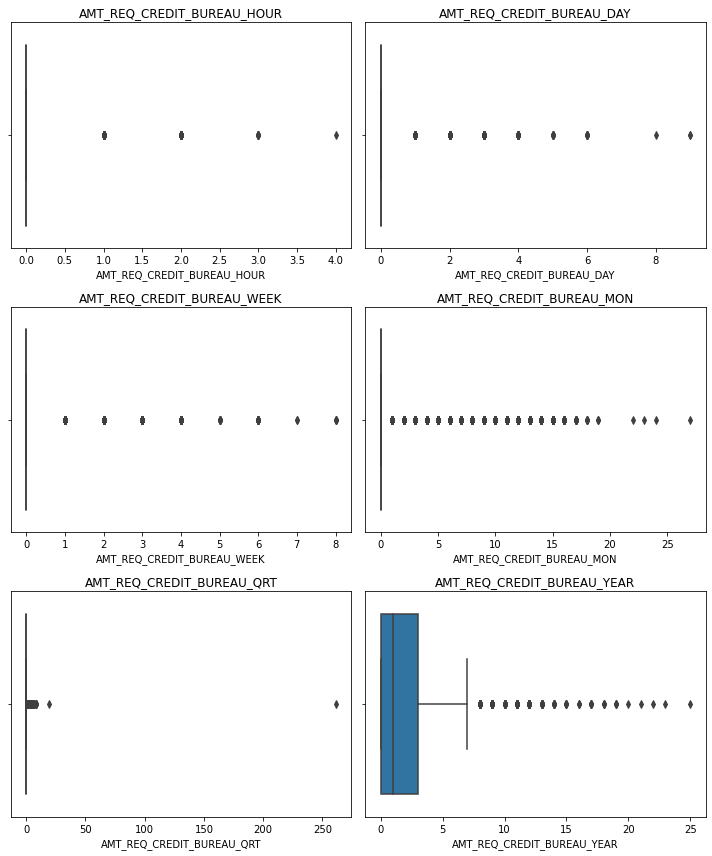

In [95]:
# check Amount columns
plt.figure(figsize=(10,12))
amt_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
a=3
b=2
i=1
for col in amt_col:
    plt.subplot(a,b,i)
    sns.boxplot((bld.loc[:,col]),data=bld)
    i+=1
    plt.title(col)
    plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

    

In [96]:
bld[amt_col].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

In [97]:
bld[amt_col].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [98]:
# lets impute null values in amt_col
for col in amt_col:
    bld[col].fillna(bld[col].median(),inplace=True)
    

In [99]:
bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [100]:
bld['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

# IMPUTE NULL VALUES

In [101]:
(bld.isnull().sum()/len(bld)*100).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EMPLOYMENT_YEAR                27.081308
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
AMT_GOODS_PRICE                 0.090403
AMT_INCOME_RANGE                0.075444
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_3                 0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
AMT_CREDIT_RANGE                0.000000
AGE             

In [102]:
# NAME_TYPE_SUITE  is categorical column so replace null values with mode
bld['NAME_TYPE_SUITE'].fillna((bld['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

In [103]:
# checking null value replaced or not
bld['NAME_TYPE_SUITE'].isnull().sum()

0

In [104]:
#'nan' value present in  column 'OCCUPATION_TYPE' we will impute it with mode

bld['OCCUPATION_TYPE'].fillna((bld['OCCUPATION_TYPE'].mode()[0]),inplace = True) 

In [105]:
bld['OCCUPATION_TYPE'].isnull().sum()

0

In [106]:
new_amt_col = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
           'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR',
           'AMT_GOODS_PRICE',
           'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
           'OBS_60_CNT_SOCIAL_CIRCLE',
           'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

In [107]:
bld[new_amt_col].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR       0
AMT_REQ_CREDIT_BUREAU_DAY        0
AMT_REQ_CREDIT_BUREAU_WEEK       0
AMT_REQ_CREDIT_BUREAU_MON        0
AMT_REQ_CREDIT_BUREAU_QRT        0
AMT_REQ_CREDIT_BUREAU_YEAR       0
AMT_GOODS_PRICE                278
OBS_30_CNT_SOCIAL_CIRCLE      1021
DEF_30_CNT_SOCIAL_CIRCLE      1021
OBS_60_CNT_SOCIAL_CIRCLE      1021
DEF_60_CNT_SOCIAL_CIRCLE      1021
DAYS_LAST_PHONE_CHANGE           1
dtype: int64

In [108]:
# lets impute null values in amt_col
for col in new_amt_col:
    bld[col].fillna(bld[col].median(),inplace=True)
    

In [109]:
bld[new_amt_col].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_GOODS_PRICE               0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
DAYS_LAST_PHONE_CHANGE        0
dtype: int64

In [110]:
(bld.isnull().sum()*100/len(bld)).sort_values(ascending=False)

EMPLOYMENT_YEAR                27.081308
AMT_INCOME_RANGE                0.075444
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.000000
OBS_60_CNT_SOCIAL_CIRCLE        0.000000
DEF_60_CNT_SOCIAL_CIRCLE        0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
FLAG_DOCUMENT_3                 0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_YEAR      0.000000
AMT_CREDIT_RANGE                0.000000
AGE                             0.000000
AGE_GROUP       

In [111]:
bld['EMPLOYMENT_YEAR'].mode()[0]

'0-5'

In [112]:
# EMPLOYMENT_YEAR  is categorical column so replace null values with mode
bld['EMPLOYMENT_YEAR'].fillna((bld['EMPLOYMENT_YEAR'].mode()[0]),inplace = True)

In [113]:
(bld.isnull().sum()*100/len(bld)).sort_values(ascending=False)

AMT_INCOME_RANGE               0.075444
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
FLAG_DOCUMENT_3                0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
LIVE_CITY_NOT_WORK_CITY        0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.000000
DEF_30_CNT_SOCIAL_CIRCLE       0.000000
OBS_60_CNT_SOCIAL_CIRCLE       0.000000
DEF_60_CNT_SOCIAL_CIRCLE       0.000000
DAYS_LAST_PHONE_CHANGE         0.000000
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
REG_REGION_NOT_LIVE_REGION     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
AMT_CREDIT_RANGE               0.000000
AGE                            0.000000
AGE_GROUP                      0.000000
YEARS_EMPLOYED                 0.000000


In [114]:
bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_TYPE_SUITE              307511 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

# outlier treatment

In [115]:
new_outliers_cols = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT',
                 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH','CNT_CHILDREN']


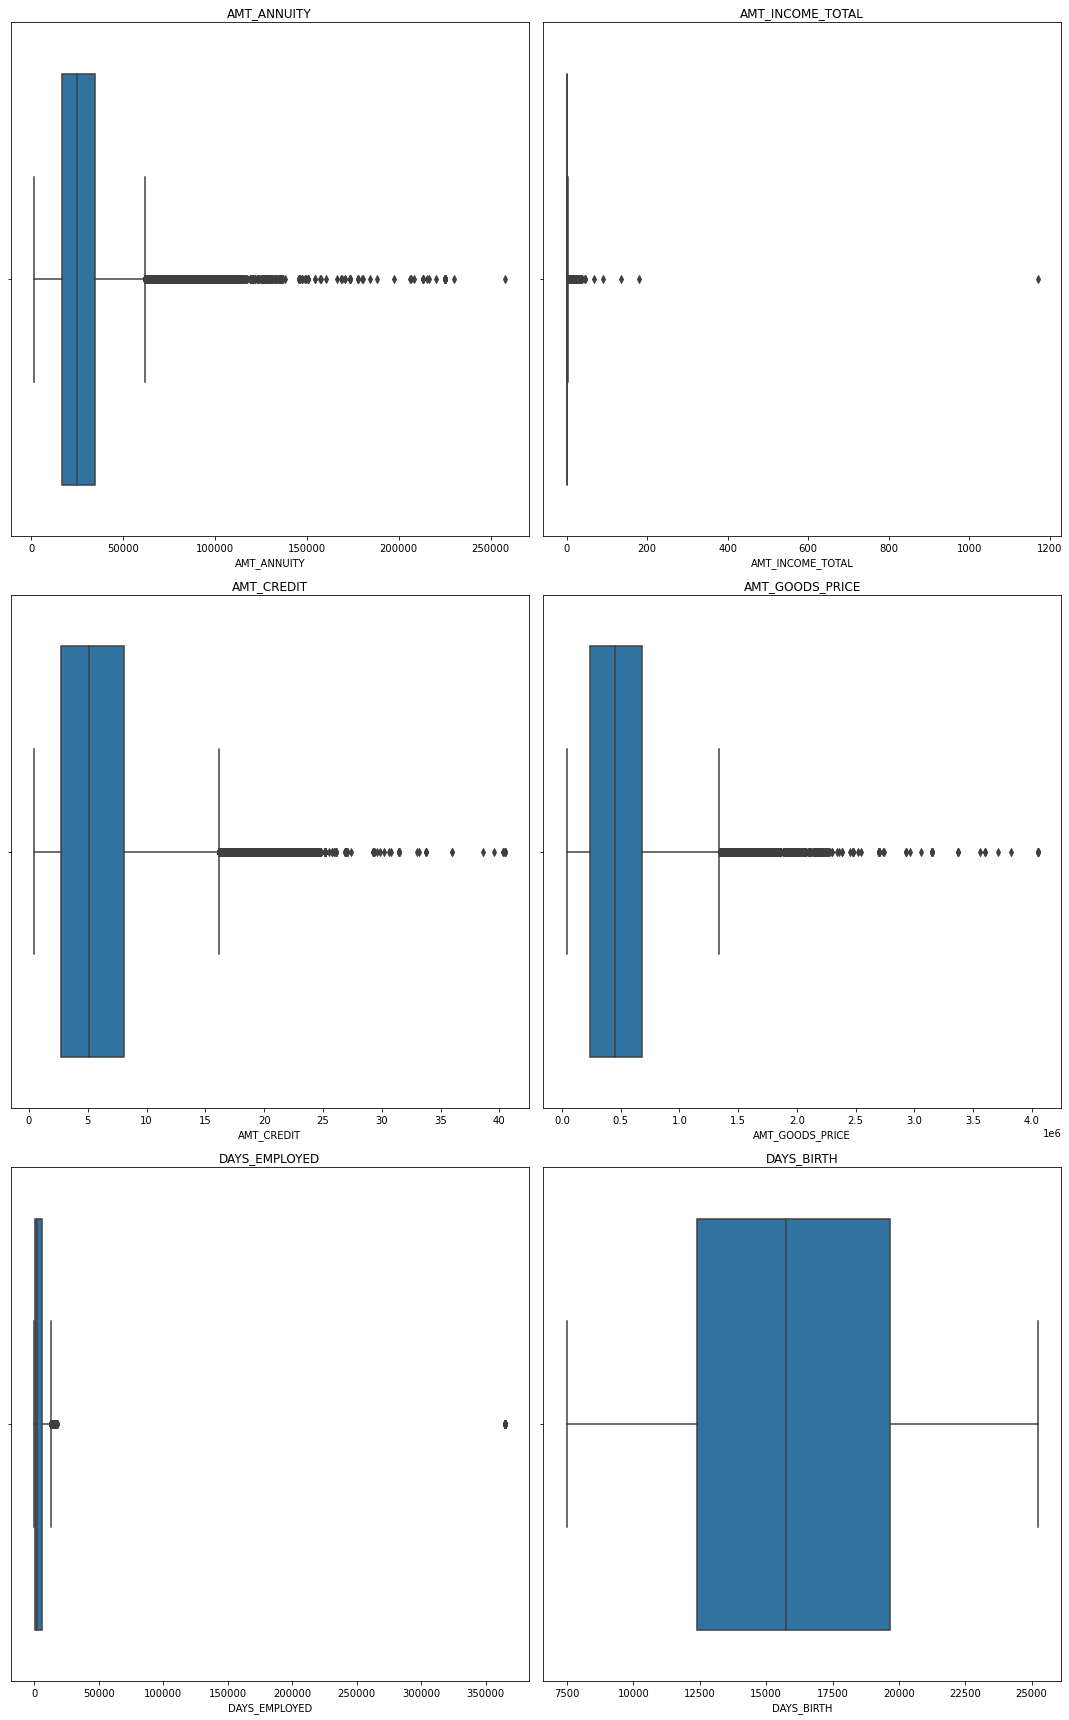

In [116]:
# checking outliers in diffrent columns
outliers_cols = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT',
                 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH']
a=3
b=2
i=1
for col in outliers_cols:
    plt.subplot(a,b,i)
    sns.boxplot(x=bld[col],data=bld)
    i+=1
    plt.title(col)
plt.tight_layout()
plt.show()
    

In [117]:
bld[outliers_cols].describe()

AMT_ANNUITY  AMT_INCOME_TOTAL     AMT_CREDIT  AMT_GOODS_PRICE  DAYS_EMPLOYED     DAYS_BIRTH
count  307499.000000     307511.000000  307511.000000     3.075110e+05  307511.000000  307511.000000
mean    27108.573909          1.687979       5.990260     5.383163e+05   67724.742149   16036.995067
std     14493.737315          2.371231       4.024908     3.692890e+05  139443.751806    4363.988632
min      1615.500000          0.256500       0.450000     4.050000e+04       0.000000    7489.000000
25%     16524.000000          1.125000       2.700000     2.385000e+05     933.000000   12413.000000
50%     24903.000000          1.471500       5.135310     4.500000e+05    2219.000000   15750.000000
75%     34596.000000          2.025000       8.086500     6.795000e+05    5707.000000   19682.000000
max    258025.500000       1170.000000      40.500000     4.050000e+06  365243.000000   25229.000000

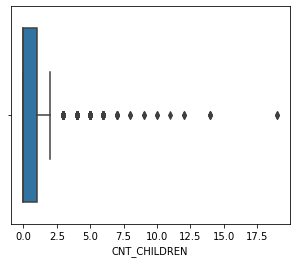

In [118]:
plt.figure(figsize=(5,4))
sns.boxplot(bld['CNT_CHILDREN'])
plt.show()

In [119]:
bld['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [120]:

for col in new_outliers_cols:
    q1 = bld[col].quantile(0.25)
    q2 = bld[col].quantile(0.5)
    q3 = bld[col].quantile(0.75)

    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    bld = bld[(bld[col]>lower) & (bld[col]<upper)]

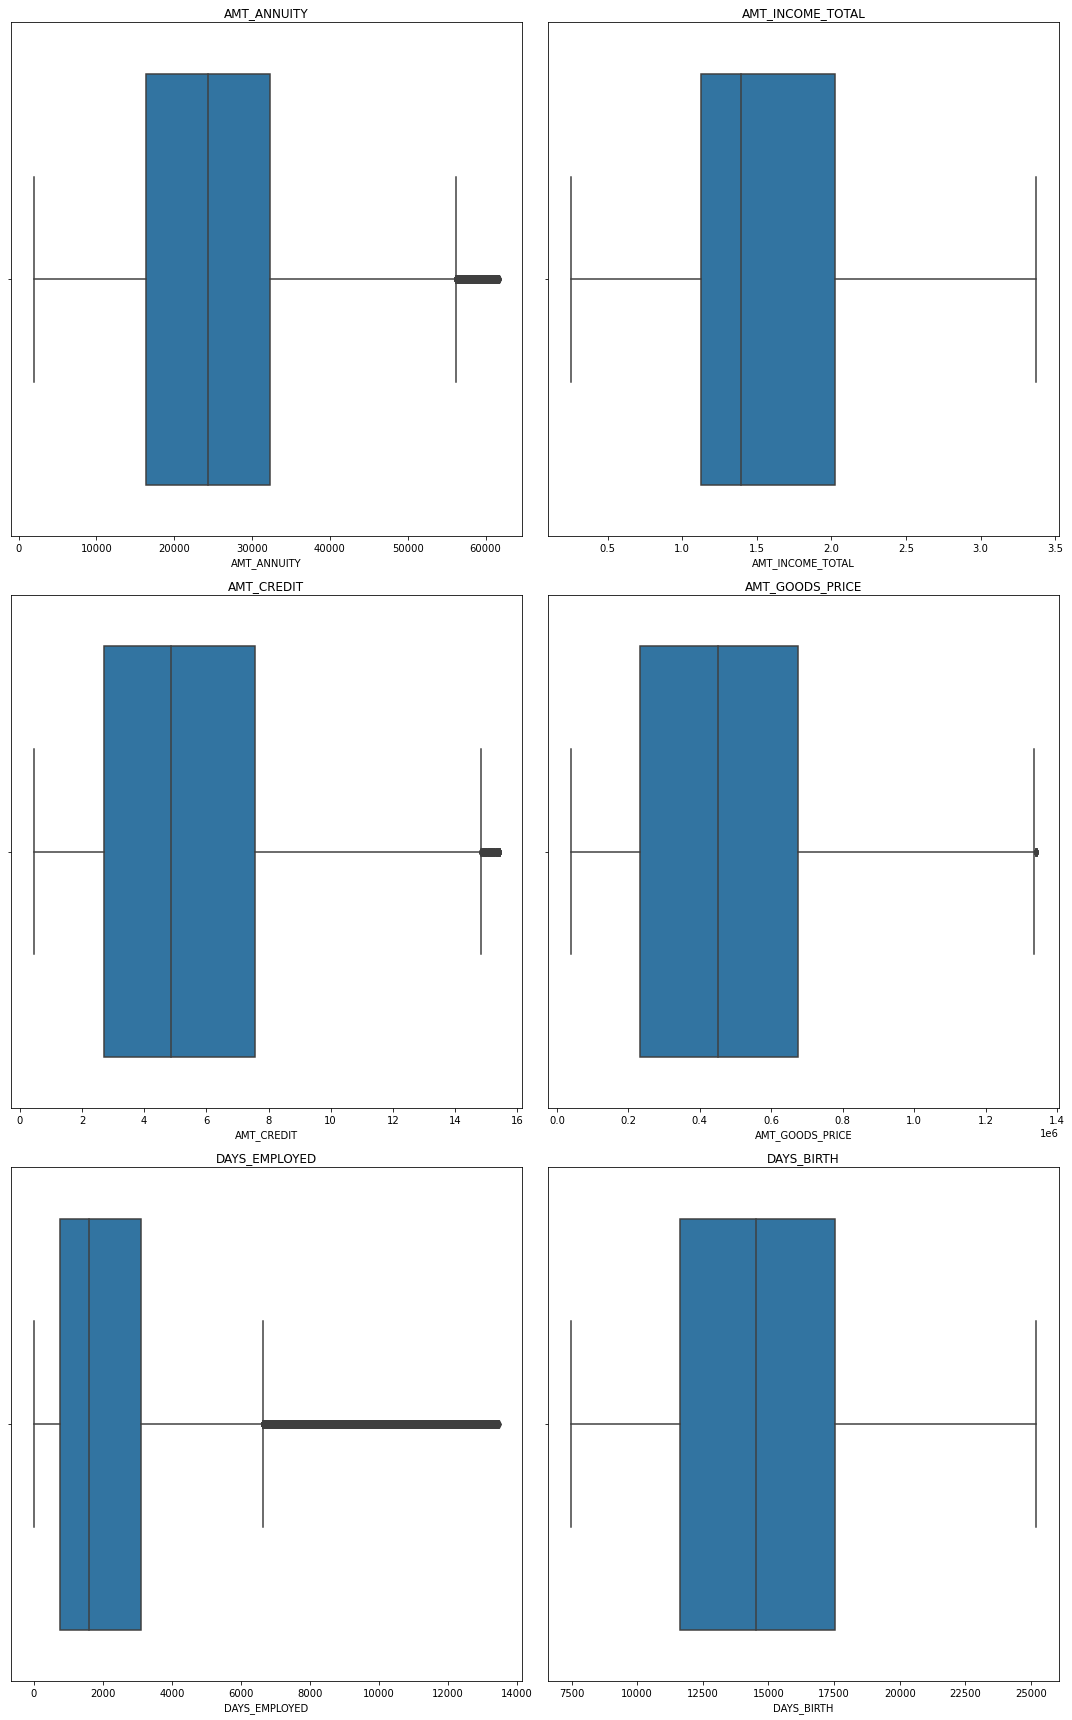

In [121]:
# checking outliers in diffrent columns
outliers_cols = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT',
                 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH',]
a=3
b=2
i=1
for col in outliers_cols:
    plt.subplot(a,b,i)
    sns.boxplot(x=bld[col],data=bld)
    i+=1
    plt.title(col)
plt.tight_layout()
plt.show()
    

In [122]:
bld['CNT_CHILDREN'].describe()

count    221271.000000
mean          0.455902
std           0.679389
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           2.000000
Name: CNT_CHILDREN, dtype: float64

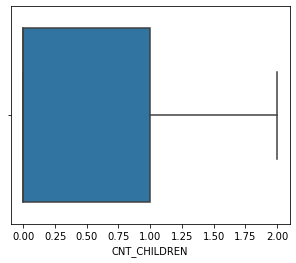

In [123]:
plt.figure(figsize=(5,4))
sns.boxplot(bld['CNT_CHILDREN'])
plt.show()

In [124]:
# checking that the max. value 350000 days removed or not from 'DAYS_EMPLOYED'
bld['DAYS_EMPLOYED'].max()

13477

after eda Analysis

In [125]:
# checking data is balanced or imbalanced

In [126]:
bld['TARGET'].value_counts()

0    201250
1     20021
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='TARGET'>

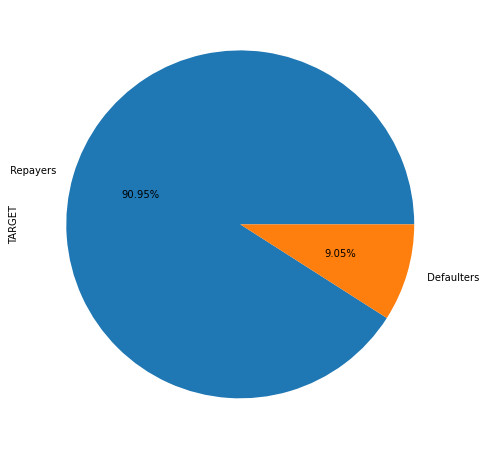

In [127]:
plt.figure(figsize=(10,8))
Defaulters=bld[bld.TARGET==1]
Repayers=bld[bld.TARGET==0]
labels = ' Repayers', ' Defaulters'
bld.TARGET.value_counts().plot.pie(autopct='%1.2f%%',labels=labels)

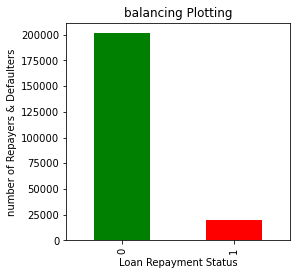

In [128]:
plt.figure(figsize=(4,4))
Defaulters=bld[bld.TARGET==1]
Repayers=bld[bld.TARGET==0]
labels = ' Repayers', ' Defaulters'
bld.TARGET.value_counts().plot.bar(' Repayers', ' Defaulters',color= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("number of Repayers & Defaulters")
plt.title("balancing Plotting")
plt.show()

 # univariae analysis and bivariate analysis

Text(0.5, 1.0, 'Loan Type VS Defaulters')

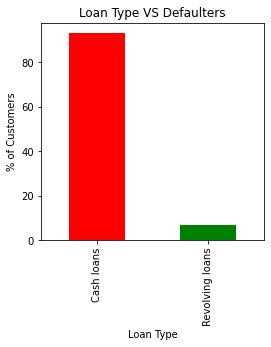

In [129]:

plt.figure(figsize=(4,4))
(Defaulters.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Defaulters")

Text(0.5, 1.0, 'Loan Type VS Repayers')

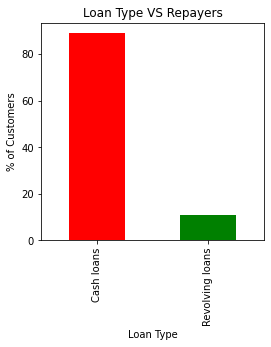

In [130]:
plt.figure(figsize=(4,4))
(Repayers.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS Repayers")

In [131]:
bld['NAME_CONTRACT_TYPE'].unique() 

array(['Cash loans', 'Revolving loans'], dtype=object)

Text(0.5, 1.0, 'Loan Type VS All Customers')

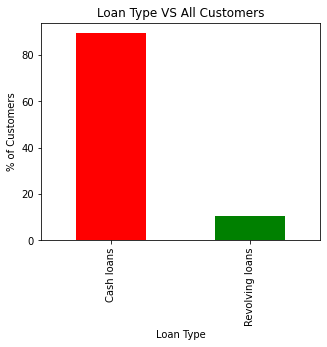

In [132]:
plt.figure(figsize=(5,4))
(bld.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.bar(color=['red', 'green'])
plt.ylabel("% of Customers")
plt.xlabel("Loan Type")
plt.title("Loan Type VS All Customers")


In [133]:
# percentage of  defaulters on revolving loans
    
len(bld[(bld.NAME_CONTRACT_TYPE=='Revolving loans') & bld.TARGET==1])/len(bld[bld.NAME_CONTRACT_TYPE=='Revolving loans'])*100

5.89578751480291

In [134]:
len(bld[bld.NAME_CONTRACT_TYPE=='Revolving loans'])

23644

In [135]:
# percentage of defaulters on Cash Loan
# problem
len(bld[(bld.NAME_CONTRACT_TYPE=='Cash loans') & bld.TARGET==1])/len(bld[bld.NAME_CONTRACT_TYPE=='Cash loans'])*100

9.425331558946905

In [136]:
#bld[(bld.NAME_CONTRACT_TYPE=='Cash loans') & bld.TARGET==0] #problem

In [137]:
# percentage of total loans
bld.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100

Cash loans         89.314461
Revolving loans    10.685539
Name: NAME_CONTRACT_TYPE, dtype: float64

In [138]:
bld['FLAG_DOCUMENT_3'].value_counts()

1    170739
0     50532
Name: FLAG_DOCUMENT_3, dtype: int64

In [139]:
Repayers['FLAG_DOCUMENT_3'].value_counts(normalize=True)

1    0.766306
0    0.233694
Name: FLAG_DOCUMENT_3, dtype: float64

In [140]:
bld[['FLAG_DOCUMENT_3', 'TARGET']].groupby(['FLAG_DOCUMENT_3'],as_index=False).mean()

FLAG_DOCUMENT_3    TARGET
0                0  0.069283
1                1  0.096756

In [141]:
plt.rcParams['figure.figsize']=[10,15]

def univ_describe(column_name):
    plt.figure(figsize=(10,12))
    plt.subplot(2,2,1)
    (Defaulters[column_name].value_counts(normalize=True)*100).plot.bar(color=['blue', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("Defaulters")
    

    plt.subplot(2,2,2)
    (Repayers[column_name].value_counts(normalize=True)*100).plot.bar(color=['black', 'red'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("Repayers")
   

    plt.subplot(2,2,3)
    (bld[column_name].value_counts(normalize=True)*100).plot.bar(color=['yellow', 'hotpink'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("distribution of customers")
    

    plt.subplot(2,2,4)

    per_def= bld[[column_name , 'TARGET']].groupby([column_name],as_index=False).mean()
    per_def["TARGET"] = per_def["TARGET"]*100
    per_def.sort_values(by='TARGET', ascending=False, inplace=True)

    plot = plt.bar(column_name, 'TARGET',data=per_def,color=['purple', 'green'])
    plt.ylabel("Percentage")
    plt.xlabel(column_name)
    plt.title("% defaulters ")
    plt.xticks(rotation=90)
    
   



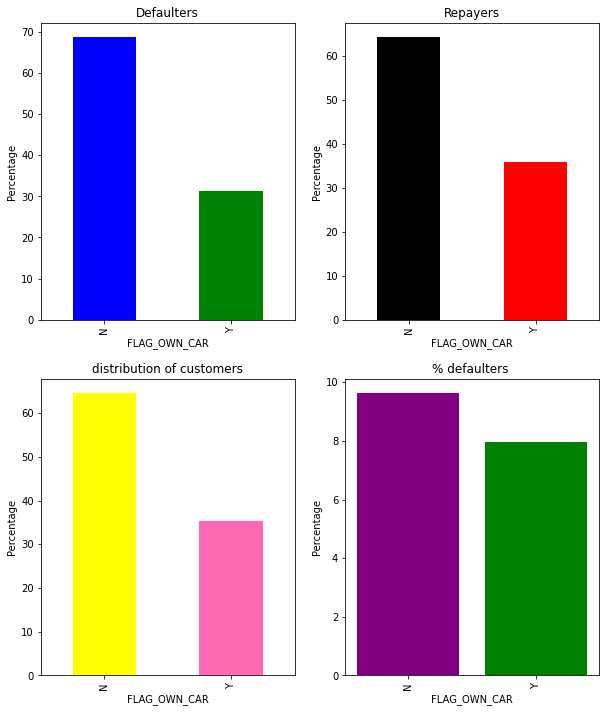

In [142]:
univ_describe('FLAG_OWN_CAR')

In [143]:
bld.FLAG_OWN_CAR.value_counts()

N    142914
Y     78357
Name: FLAG_OWN_CAR, dtype: int64

In [144]:
 (Defaulters['FLAG_OWN_CAR'].value_counts())

N    13771
Y     6250
Name: FLAG_OWN_CAR, dtype: int64

In [145]:
 (Repayers['FLAG_OWN_CAR'].value_counts())

N    129143
Y     72107
Name: FLAG_OWN_CAR, dtype: int64

In [146]:
bld.FLAG_OWN_CAR.value_counts(normalize=True)*100

N    64.587768
Y    35.412232
Name: FLAG_OWN_CAR, dtype: float64

In [147]:
 (Defaulters['FLAG_OWN_CAR'].value_counts(normalize=True)*100)

N    68.782778
Y    31.217222
Name: FLAG_OWN_CAR, dtype: float64

In [148]:
 (Repayers['FLAG_OWN_CAR'].value_counts(normalize=True)*100)

N    64.170435
Y    35.829565
Name: FLAG_OWN_CAR, dtype: float64

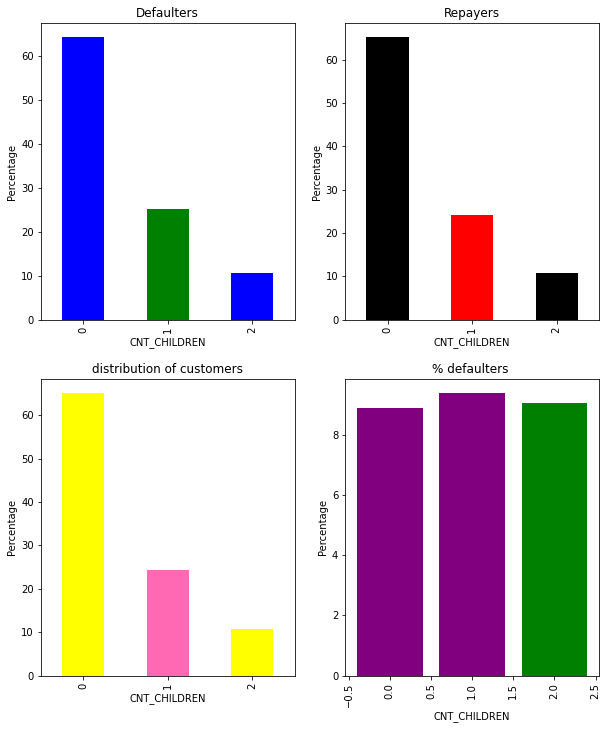

In [149]:
univ_describe('CNT_CHILDREN')

In [150]:
bld.CNT_CHILDREN.value_counts(normalize=True)*100

0    65.085348
1    24.239055
2    10.675597
Name: CNT_CHILDREN, dtype: float64

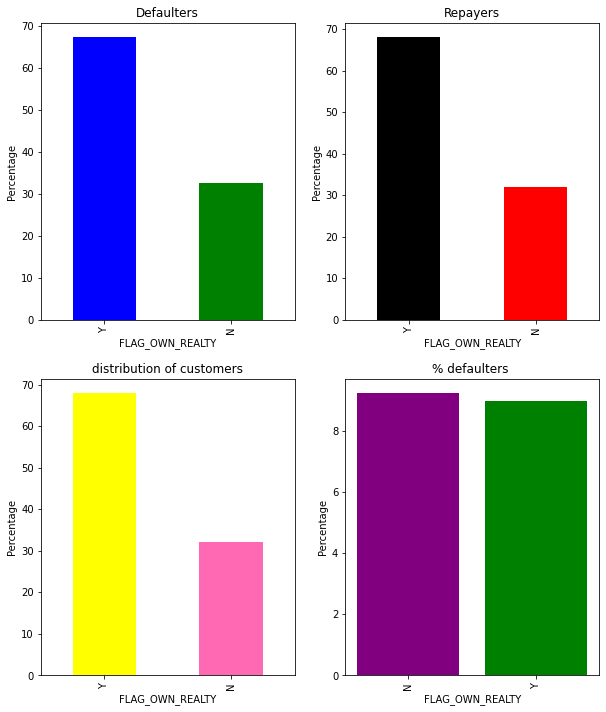

In [151]:
univ_describe('FLAG_OWN_REALTY')

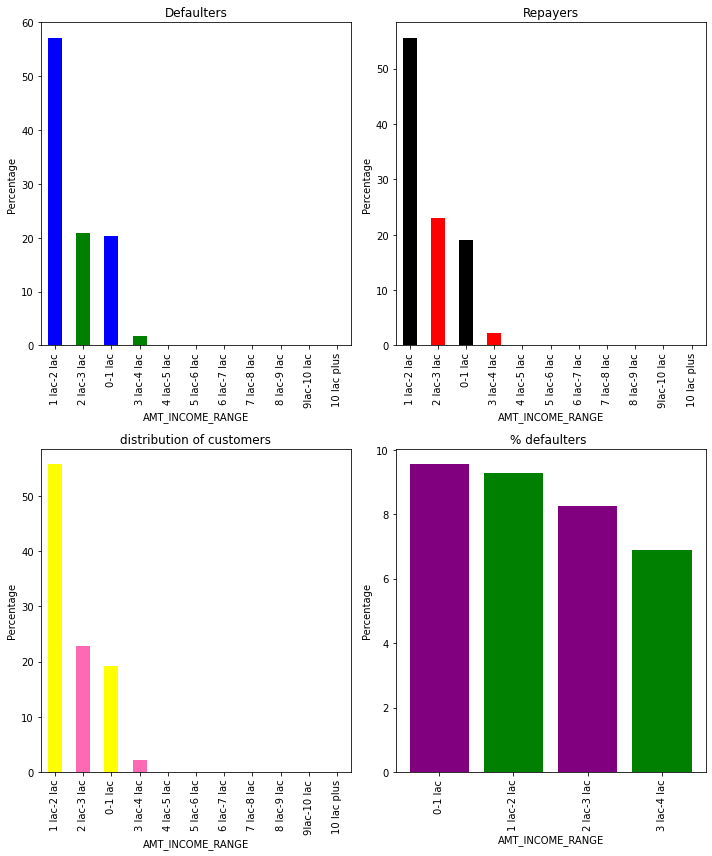

In [152]:
univ_describe('AMT_INCOME_RANGE')
plt.tight_layout()

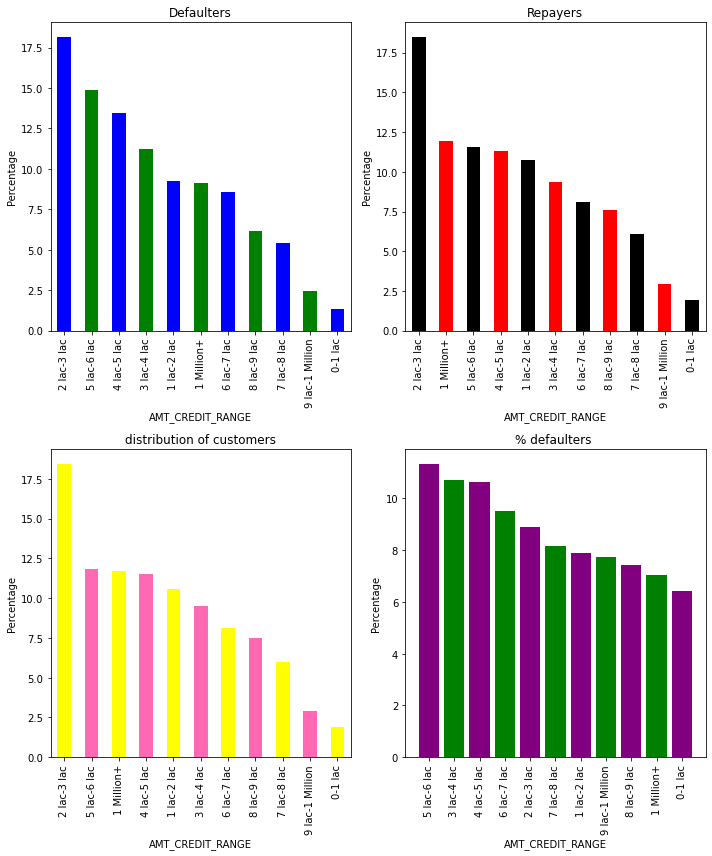

In [153]:
univ_describe('AMT_CREDIT_RANGE')
plt.tight_layout()

In [154]:
# inference:


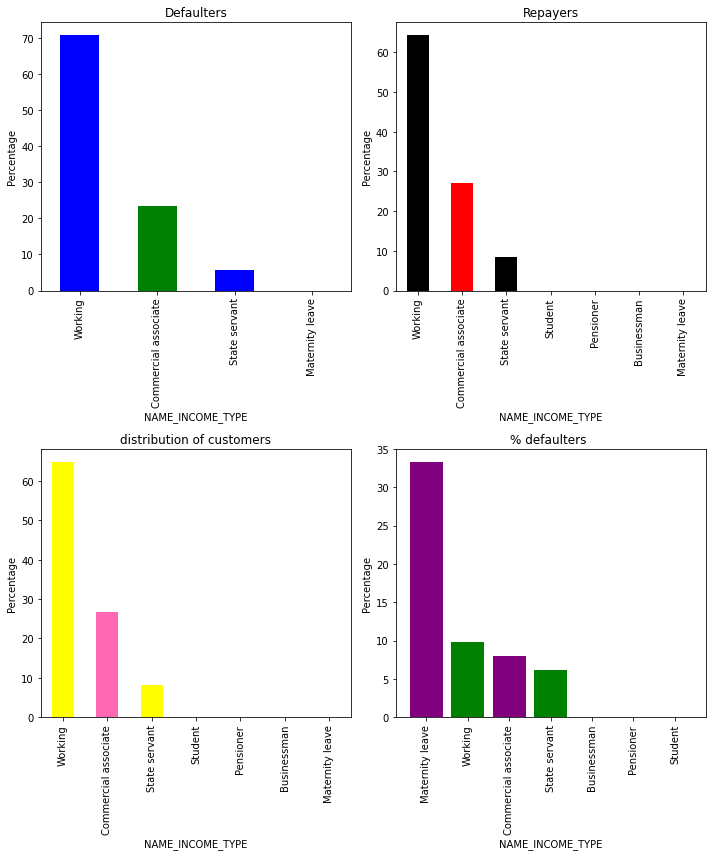

In [155]:
univ_describe('NAME_INCOME_TYPE')
plt.tight_layout()


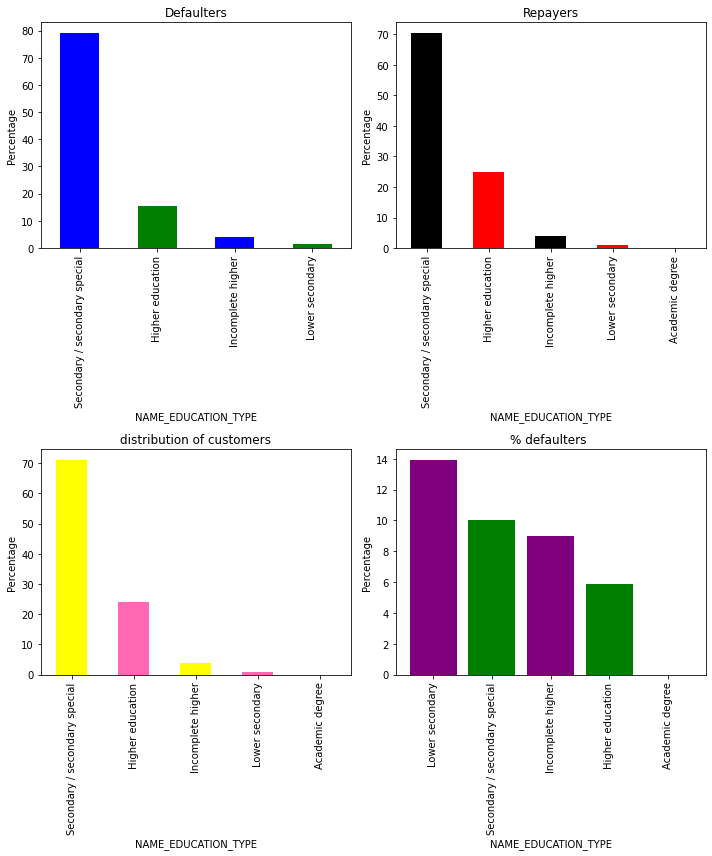

In [156]:
univ_describe('NAME_EDUCATION_TYPE')
plt.tight_layout()

In [157]:
Defaulters.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    79.056990
Higher education                 15.588632
Incomplete higher                 3.880925
Lower secondary                   1.473453
Name: NAME_EDUCATION_TYPE, dtype: float64

In [158]:
Repayers.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100

Secondary / secondary special    70.375155
Higher education                 24.780621
Incomplete higher                 3.891677
Lower secondary                   0.904845
Academic degree                   0.047702
Name: NAME_EDUCATION_TYPE, dtype: float64

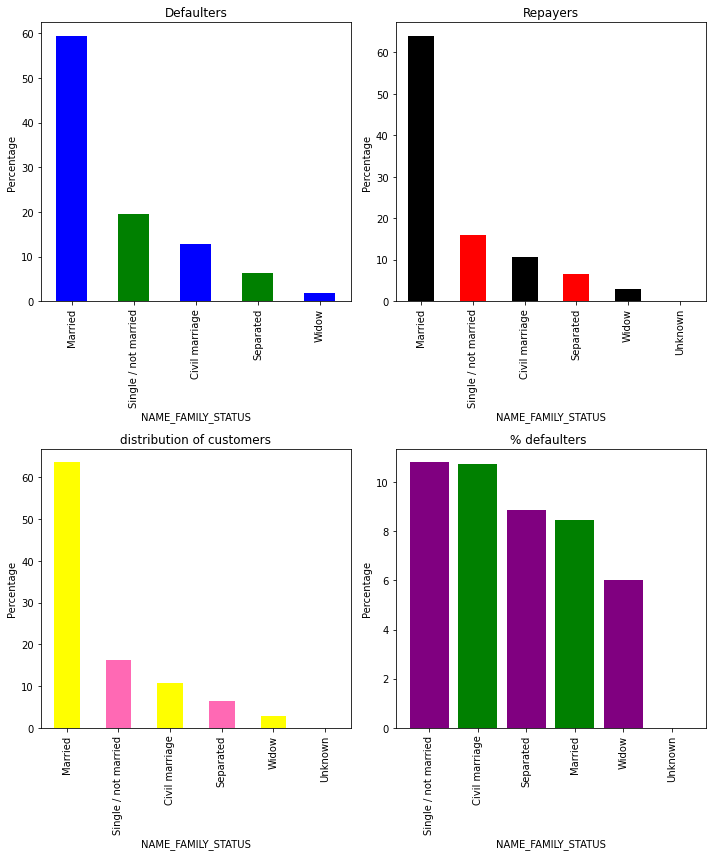

In [159]:
univ_describe('NAME_FAMILY_STATUS')
plt.tight_layout()

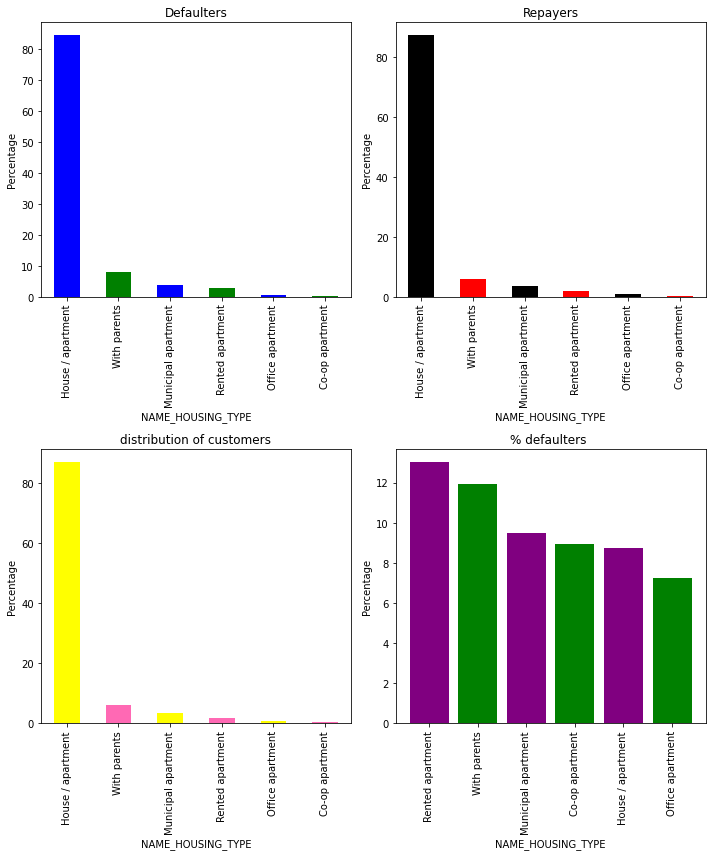

In [160]:
univ_describe('NAME_HOUSING_TYPE')
plt.tight_layout()
plt.show()

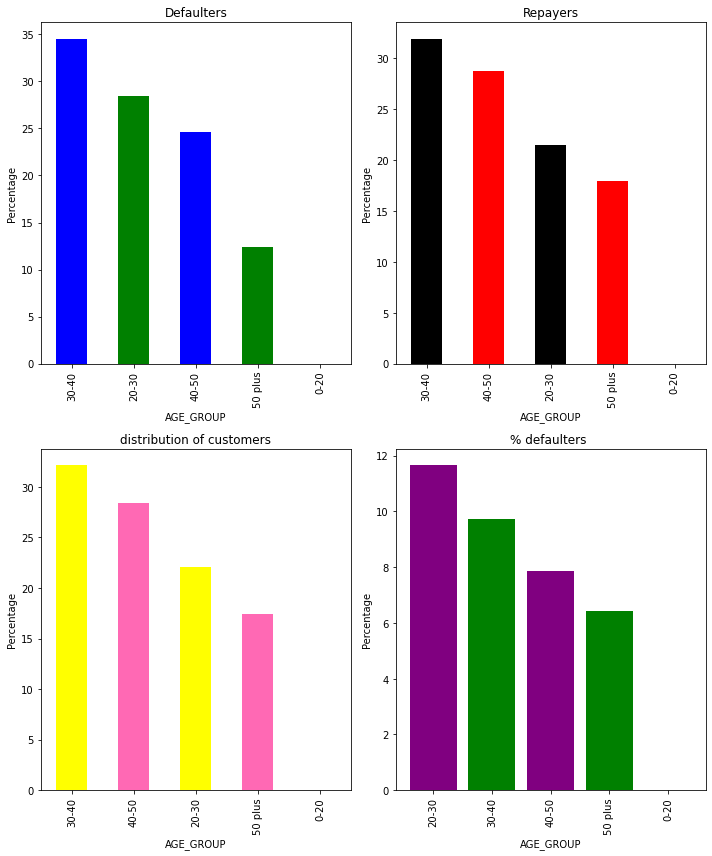

In [161]:
univ_describe('AGE_GROUP')
plt.tight_layout()

In [162]:
Defaulters.AGE_GROUP.value_counts(normalize=True)*100


30-40      34.543729
20-30      28.400180
40-50      24.669097
50 plus    12.386994
0-20        0.000000
Name: AGE_GROUP, dtype: float64

In [163]:
bld.AGE_GROUP.value_counts(normalize=True)*100

30-40      32.128928
40-50      28.365217
20-30      22.049433
50 plus    17.455970
0-20        0.000452
Name: AGE_GROUP, dtype: float64

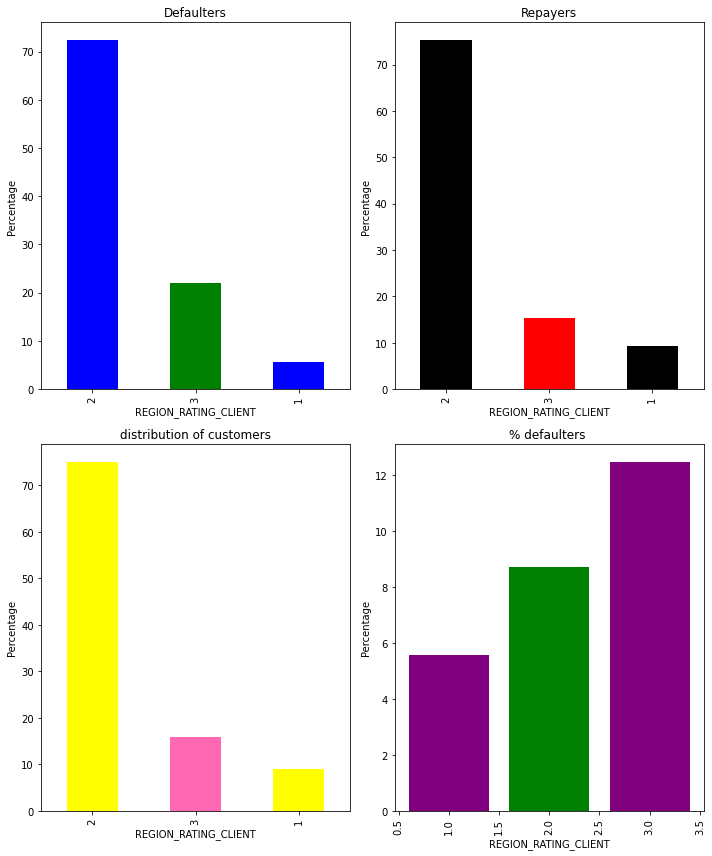

In [164]:
univ_describe('REGION_RATING_CLIENT')

plt.tight_layout()

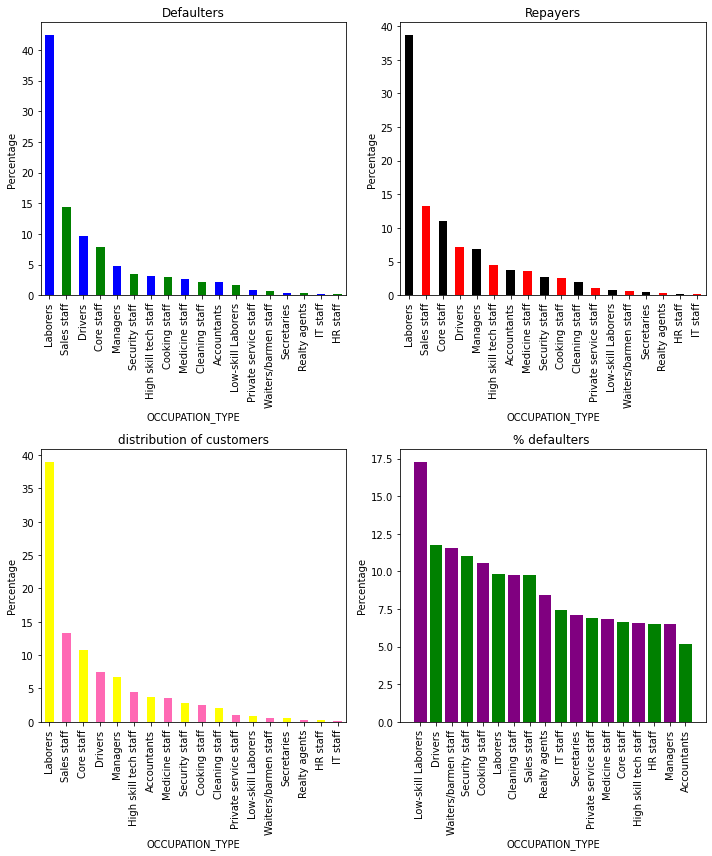

In [165]:
univ_describe('OCCUPATION_TYPE')
plt.tight_layout()

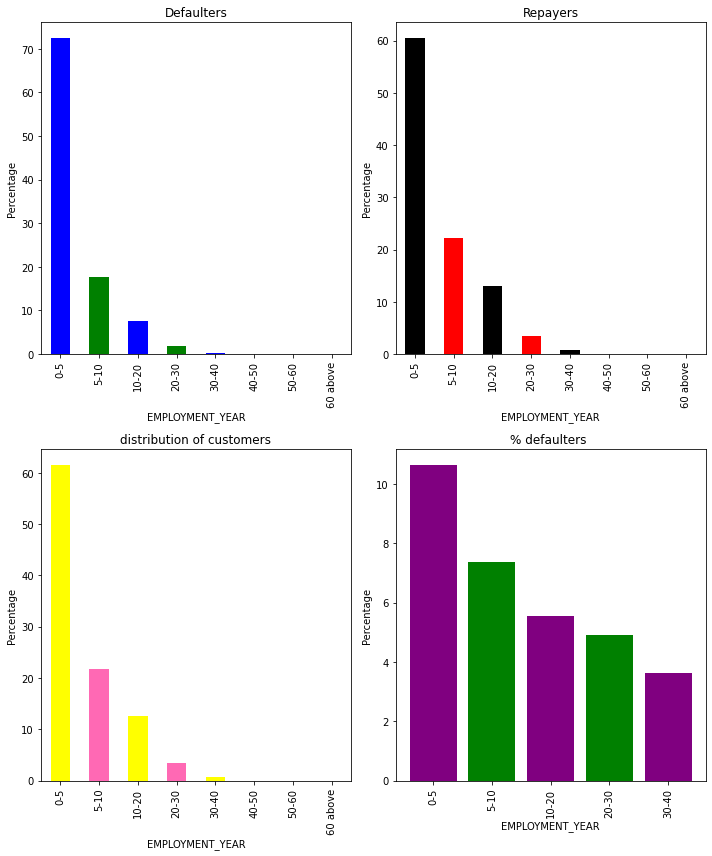

In [166]:
univ_describe('EMPLOYMENT_YEAR')
plt.tight_layout()

In [167]:
bld.EMPLOYMENT_YEAR.value_counts(normalize=True)*100

0-5         61.542181
5-10        21.817138
10-20       12.529884
20-30        3.351546
30-40        0.759250
40-50        0.000000
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

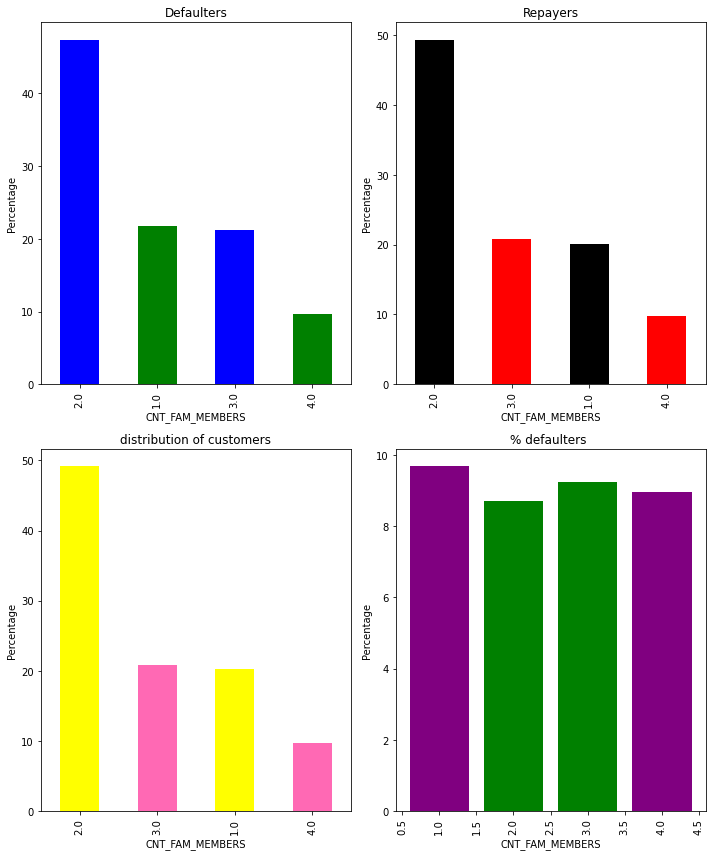

In [168]:
univ_describe('CNT_FAM_MEMBERS')
plt.tight_layout()

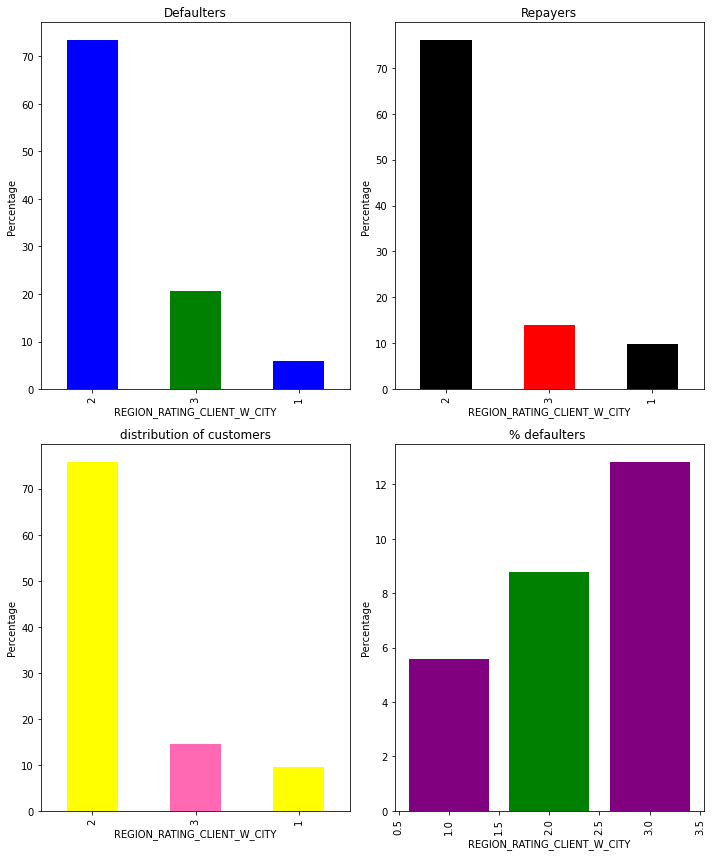

In [169]:
univ_describe('REGION_RATING_CLIENT_W_CITY')
plt.tight_layout()

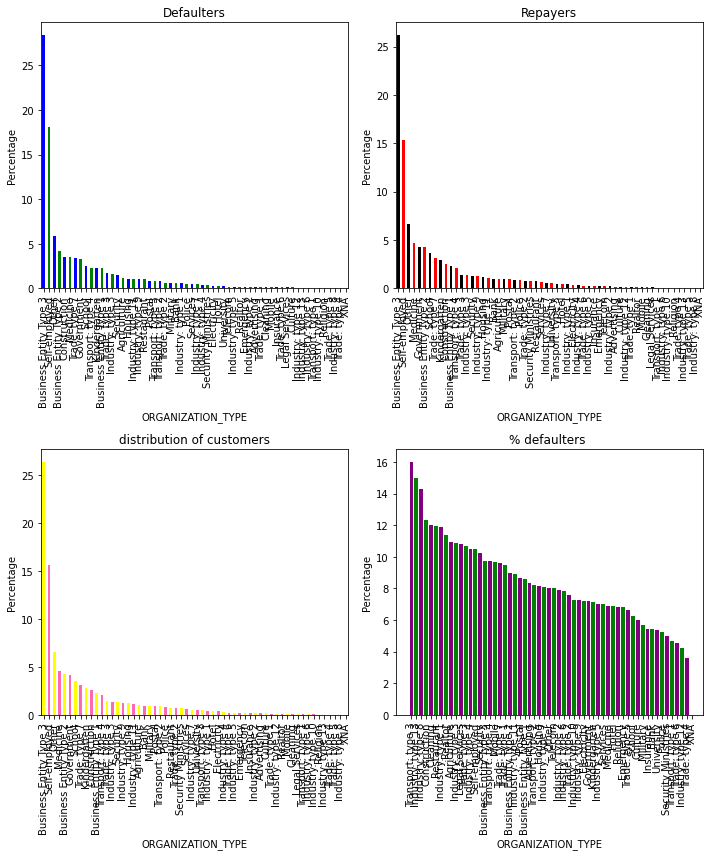

In [170]:
plt.rcParams['figure.figsize']=[20,20]
univ_describe('ORGANIZATION_TYPE')
plt.tight_layout()

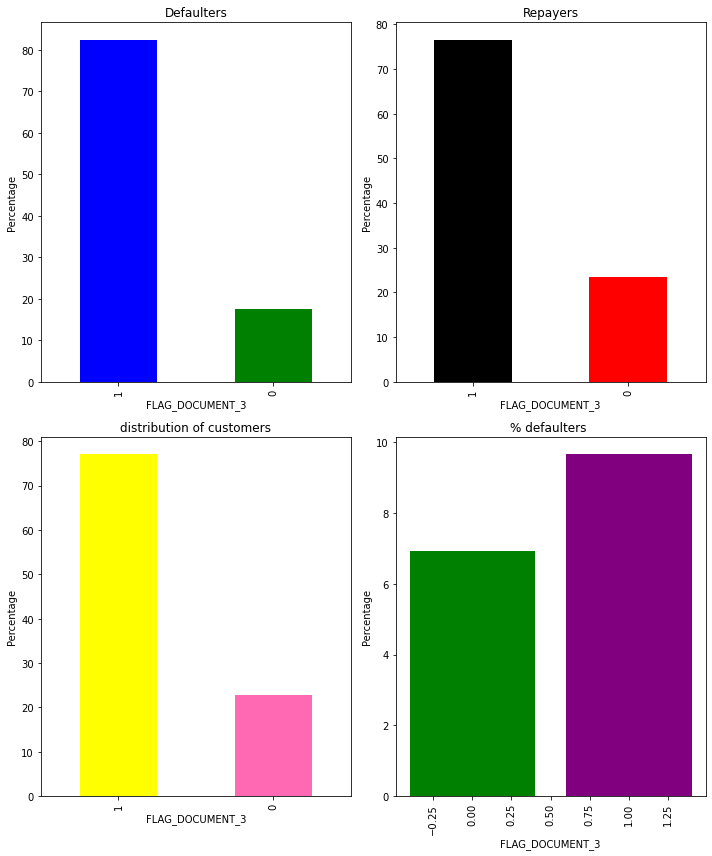

In [171]:
univ_describe('FLAG_DOCUMENT_3')
plt.tight_layout()

In [172]:

plt.tight_layout()

<Figure size 1440x1440 with 0 Axes>

In [173]:
bld.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_CREDIT_RANGE  AGE  \
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0      4 lac-5 lac   25   
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0       1 Million+   45   
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0      1 lac-2 lac   52   
3      1000

In [174]:
bld.select_dtypes(include=np.number).columns.to_frame()

0
SK_ID_CURR                                  SK_ID_CURR
TARGET                                          TARGET
CNT_CHILDREN                              CNT_CHILDREN
AMT_INCOME_TOTAL                      AMT_INCOME_TOTAL
AMT_CREDIT                                  AMT_CREDIT
AMT_ANNUITY                                AMT_ANNUITY
AMT_GOODS_PRICE                        AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE  REGION_POPULATION_RELATIVE
DAYS_BIRTH                                  DAYS_BIRTH
DAYS_EMPLOYED                            DAYS_EMPLOYED
DAYS_REGISTRATION                    DAYS_REGISTRATION
DAYS_ID_PUBLISH                        DAYS_ID_PUBLISH
CNT_FAM_MEMBERS                        CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START        HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_LIVE_REGION
OBS_30_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE      DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE      DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE          DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_3                        FLAG_DOCUMENT_3
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY    AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON    AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT    AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR
AGE                                                AGE
YEARS_EMPLOYED                          YEARS_EMPLOYED

In [175]:
 bld.shape

(221271, 52)

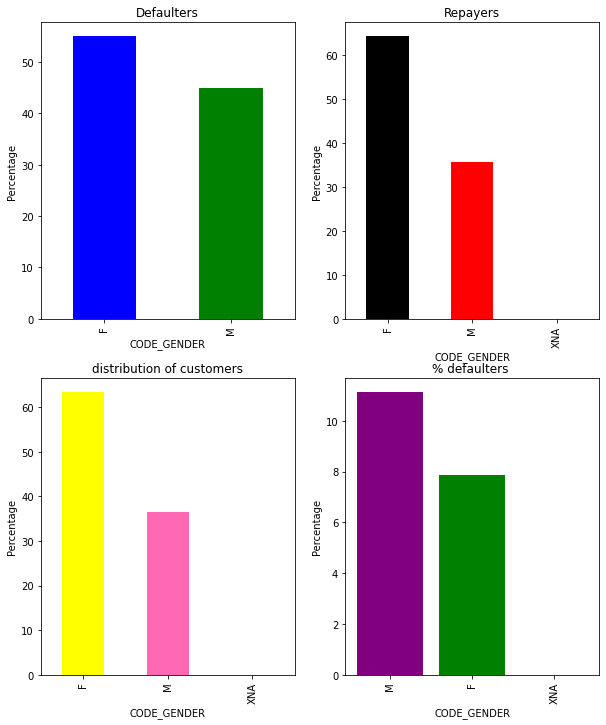

In [176]:
univ_describe('CODE_GENDER')

In [177]:
bld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221271 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   221271 non-null  int64   
 1   TARGET                       221271 non-null  int64   
 2   NAME_CONTRACT_TYPE           221271 non-null  object  
 3   CODE_GENDER                  221271 non-null  object  
 4   FLAG_OWN_CAR                 221271 non-null  category
 5   FLAG_OWN_REALTY              221271 non-null  category
 6   CNT_CHILDREN                 221271 non-null  int64   
 7   AMT_INCOME_TOTAL             221271 non-null  float64 
 8   AMT_CREDIT                   221271 non-null  float64 
 9   AMT_ANNUITY                  221271 non-null  float64 
 10  AMT_GOODS_PRICE              221271 non-null  float64 
 11  NAME_TYPE_SUITE              221271 non-null  object  
 12  NAME_INCOME_TYPE             221271 non-null

In [178]:
bld.loc[bld.CODE_GENDER=='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
35657       141289       0    Revolving loans         XNA            Y               Y             0             2.070       3.825      19125.0         337500.0   Unaccompanied               Working  Secondary / secondary special            Married  Municipal apartment                    0.020713       20232          10044            10024.0             3537            Laborers              2.0                    3                           3                    TUESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 1                       0.0                       0.0                       0.0                       0.0                  -286.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
38566       144669       0    Revolving loans         XNA            N               Y             2             1.575       2.700      13500.0         225000.0          Family               Working  Secondary / secondary special            Married    House / apartment                    0.026392       13717           2797             2241.0             4659  Low-skill Laborers              4.0                    2                           2                     FRIDAY                       16                           0                          0                           0                      0                      0                       0        Industry: type 3                       0.0                       0.0                       0.0                       0.0                  -493.0                0                         0.0                        0.0                         0.0                        3.0                        0.0                         4.0   
83382       196708       0    Revolving loans         XNA            N               Y             1             1.350       4.050      20250.0         225000.0   Unaccompanied               Working               Higher education            Married    House / apartment                    0.035792       10647           1228              183.0             1671          Core staff              3.0                    2                           2                   THURSDAY                       15                           0                          0                           0                      0                      0                       0            Kindergarten                       7.0                       1.0                       7.0                       1.0                  -851.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         3.0   
189640      319880       0    Revolving loans       

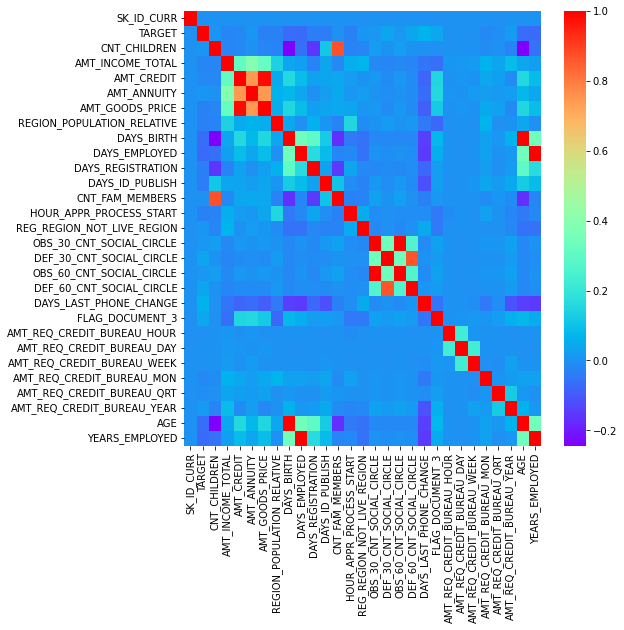

In [179]:
corrmat = bld.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [ ]:
# Now import previous application file 

In [180]:
prev_bld=pd.read_csv("previous_application.csv")

In [181]:
prev_bld.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [182]:
corrmat = prev_bld.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                Var2  Correlation
129            AMT_GOODS_PRICE     AMT_APPLICATION         1.00
130            AMT_GOODS_PRICE          AMT_CREDIT         0.99
87                  AMT_CREDIT     AMT_APPLICATION         0.98
417           DAYS_TERMINATION       DAYS_LAST_DUE         0.93
128            AMT_GOODS_PRICE         AMT_ANNUITY         0.82
86                  AMT_CREDIT         AMT_ANNUITY         0.82
65             AMT_APPLICATION         AMT_ANNUITY         0.81
372  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         0.80
297                CNT_PAYMENT     AMT_APPLICATION         0.68
298                CNT_PAYMENT          AMT_CREDIT         0.67

In [183]:
## rows and columns
prev_bld.shape

(1670214, 37)

In [184]:

prev_bld.select_dtypes(include=np.number)

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0           2030495      271877     1730.430          17145.0     17145.0               0.0          17145.0                       15                       1           0.000000               0.182832                  0.867336            -73                35         12.0            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1           2802425      108129    25188.615         607500.0    679671.0               NaN         607500.0                       11                       1                NaN                    NaN                       NaN           -164                -1         36.0            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2           2523466      122040    15060.735         112500.0    136444.5               NaN         112500.0                       11                       1                NaN                    NaN                       NaN           -301                -1         12.0            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3           2819243      176158    47041.335         450000.0    470790.0               NaN         450000.0                        7                       1                NaN                    NaN                       NaN           -512                -1         12.0            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4           1784265      202054    31924.395         337500.0    404055.0               NaN         337500.0                        9                       1                NaN                    NaN                       NaN           -781                -1         24.0                 NaN             NaN                        NaN            NaN               NaN                        NaN
...             ...         ...          ...              ...         ...               ...              ...                      ...                     ...                ...                    ...                       ...            ...               ...          ...                 ...             ...                        ...            ...               ...                        ...
1670209     2300464      352015    14704.290         267295.5    311400.0               0.0         267295.5                       12                       1           0.000000                    NaN                       NaN           -544                43         30.0            365243.0          -508.0                      362.0         -358.0            -351.0                        0.0
1670210     2357031      334635     6622.020          87750.0     64291.5           29250.0          87750.0                       15                       1           0.340554                    NaN                       NaN          -1694                43         12.0            365243.0         -1604.0                    -1274.0        -1304.0           -1297.0                        0.0
1670211     2659632      249544    11520.855         105237.0    102523.5           10525.5         105237.0                       12                       1           0.101401                    NaN                       NaN          -1488              1370         10.0            365243.0         -1457.0                    -1187.0        -1187.0           -1181.0                        0.0
1670212     2785582      400317    18821.520         180000

In [185]:
# all columns having numerical data types
prev_bld.select_dtypes(include=np.number).columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [186]:
# no. of numerical columns
len(prev_bld.select_dtypes(include=np.number).columns)

21

In [187]:
# categorical data types
prev_bld.select_dtypes(include=object)

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP          PRODUCT_COMBINATION
0           Consumer loans                   SATURDAY                           Y                    XAP             Approved  Cash through the bank                XAP              NaN         Repeater                Mobile            POS               XNA             Country-wide          Connectivity           middle     POS mobile with interest
1               Cash loans                   THURSDAY                           Y                    XNA             Approved                    XNA                XAP    Unaccompanied         Repeater                   XNA           Cash            x-sell           Contact center                   XNA       low_action             Cash X-Sell: low
2               Cash loans                    TUESDAY                           Y                    XNA             Approved  Cash through the bank                XAP  Spouse, partner         Repeater                   XNA           Cash            x-sell  Credit and cash offices                   XNA             high            Cash X-Sell: high
3               Cash loans                     MONDAY                           Y                    XNA             Approved  Cash through the bank                XAP              NaN         Repeater                   XNA           Cash            x-sell  Credit and cash offices                   XNA           middle          Cash X-Sell: middle
4               Cash loans                   THURSDAY                           Y                Repairs              Refused  Cash through the bank                 HC              NaN         Repeater                   XNA           Cash           walk-in  Credit and cash offices                   XNA             high            Cash Street: high
...                    ...                        ...                         ...                    ...                  ...                    ...                ...              ...              ...                   ...            ...               ...                      ...                   ...              ...                          ...
1670209     Consumer loans                  WEDNESDAY                           Y                    XAP             Approved  Cash through the bank                XAP              NaN        Refreshed             Furniture            POS               XNA                    Stone             Furniture       low_normal   POS industry with interest
1670210     Consumer loans                    TUESDAY                           Y                    XAP             Approved  Cash through the bank                XAP    Unaccompanied              New             Furniture            POS               XNA                    Stone             Furniture           middle   POS industry with interest
1670211     Consumer loans                     MONDAY                           Y                    XAP             Approved  Cash through the bank                XAP  Spouse, partner         Repeater  Consumer Electronics            POS               XNA             Country-wide  Consumer electronics       low_normal  POS household with interest
1670212         Cash loans                  WEDNESDAY                           Y                    XNA             Approved  Cash through the bank                XAP           Family         Repeater                   XNA           Cash            x-sell          AP+ (Cash loan)                   XNA       low_normal             Cash X-Sell: low
1670213         Cash loans                     SUNDAY                           Y                    XNA             Approved  Cash through the bank          

In [188]:
# categorical columns
prev_bld.select_dtypes(include=object).columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'], dtype='object')

In [189]:
#  number of categorical columns
len(prev_bld.select_dtypes(include=object).columns)

16

In [190]:
# total no. of null values in previous data set
prev_bld.isnull().sum().sum()

11109336

In [191]:
prev_bld.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [192]:
missing=prev_bld.isnull().sum()*100/len(prev_bld)

In [193]:
missing_sort=pd.DataFrame({'column_name':prev_bld.columns,'missing%':missing})

In [194]:
missing_sort.sort_values('missing%',ascending=False)

column_name   missing%
RATE_INTEREST_PRIVILEGED        RATE_INTEREST_PRIVILEGED  99.643698
RATE_INTEREST_PRIMARY              RATE_INTEREST_PRIMARY  99.643698
AMT_DOWN_PAYMENT                        AMT_DOWN_PAYMENT  53.636480
RATE_DOWN_PAYMENT                      RATE_DOWN_PAYMENT  53.636480
NAME_TYPE_SUITE                          NAME_TYPE_SUITE  49.119754
NFLAG_INSURED_ON_APPROVAL      NFLAG_INSURED_ON_APPROVAL  40.298129
DAYS_TERMINATION                        DAYS_TERMINATION  40.298129
DAYS_LAST_DUE                              DAYS_LAST_DUE  40.298129
DAYS_LAST_DUE_1ST_VERSION      DAYS_LAST_DUE_1ST_VERSION  40.298129
DAYS_FIRST_DUE                            DAYS_FIRST_DUE  40.298129
DAYS_FIRST_DRAWING                    DAYS_FIRST_DRAWING  40.298129
AMT_GOODS_PRICE                          AMT_GOODS_PRICE  23.081773
AMT_ANNUITY                                  AMT_ANNUITY  22.286665
CNT_PAYMENT                                  CNT_PAYMENT  22.286366
PRODUCT_COMBINATION                  PRODUCT_COMBINATION   0.020716
AMT_CREDIT                                    AMT_CREDIT   0.000060
NAME_YIELD_GROUP                        NAME_YIELD_GROUP   0.000000
NAME_PORTFOLIO                            NAME_PORTFOLIO   0.000000
NAME_SELLER_INDUSTRY                NAME_SELLER_INDUSTRY   0.000000
SELLERPLACE_AREA                        SELLERPLACE_AREA   0.000000
CHANNEL_TYPE                                CHANNEL_TYPE   0.000000
NAME_PRODUCT_TYPE                      NAME_PRODUCT_TYPE   0.000000
SK_ID_PREV                                    SK_ID_PREV   0.000000
NAME_GOODS_CATEGORY                  NAME_GOODS_CATEGORY   0.000000
NAME_CLIENT_TYPE                        NAME_CLIENT_TYPE   0.000000
CODE_REJECT_REASON                    CODE_REJECT_REASON   0.000000
SK_ID_CURR                                    SK_ID_CURR   0.000000
DAYS_DECISION                              DAYS_DECISION   0.000000
NAME_CONTRACT_STATUS                NAME_CONTRACT_STATUS   0.000000
NAME_CASH_LOAN_PURPOSE            NAME_CASH_LOAN_PURPOSE   0.000000
NFLAG_LAST_APPL_IN_DAY            NFLAG_LAST_APPL_IN_DAY   0.000000
FLAG_LAST_APPL_PER_CONTRACT  FLAG_LAST_APPL_PER_CONTRACT   0.000000
HOUR_APPR_PROCESS_START          HOUR_APPR_PROCESS_START   0.000000
WEEKDAY_APPR_PROCESS_START    WEEKDAY_APPR_PROCESS_START   0.000000
AMT_APPLICATION                          AMT_APPLICATION   0.000000
NAME_CONTRACT_TYPE                    NAME_CONTRACT_TYPE   0.000000
NAME_PAYMENT_TYPE                      NAME_PAYMENT_TYPE   0.000000

In [195]:
 # duplicate rows
prev_bld.duplicated().sum()

0

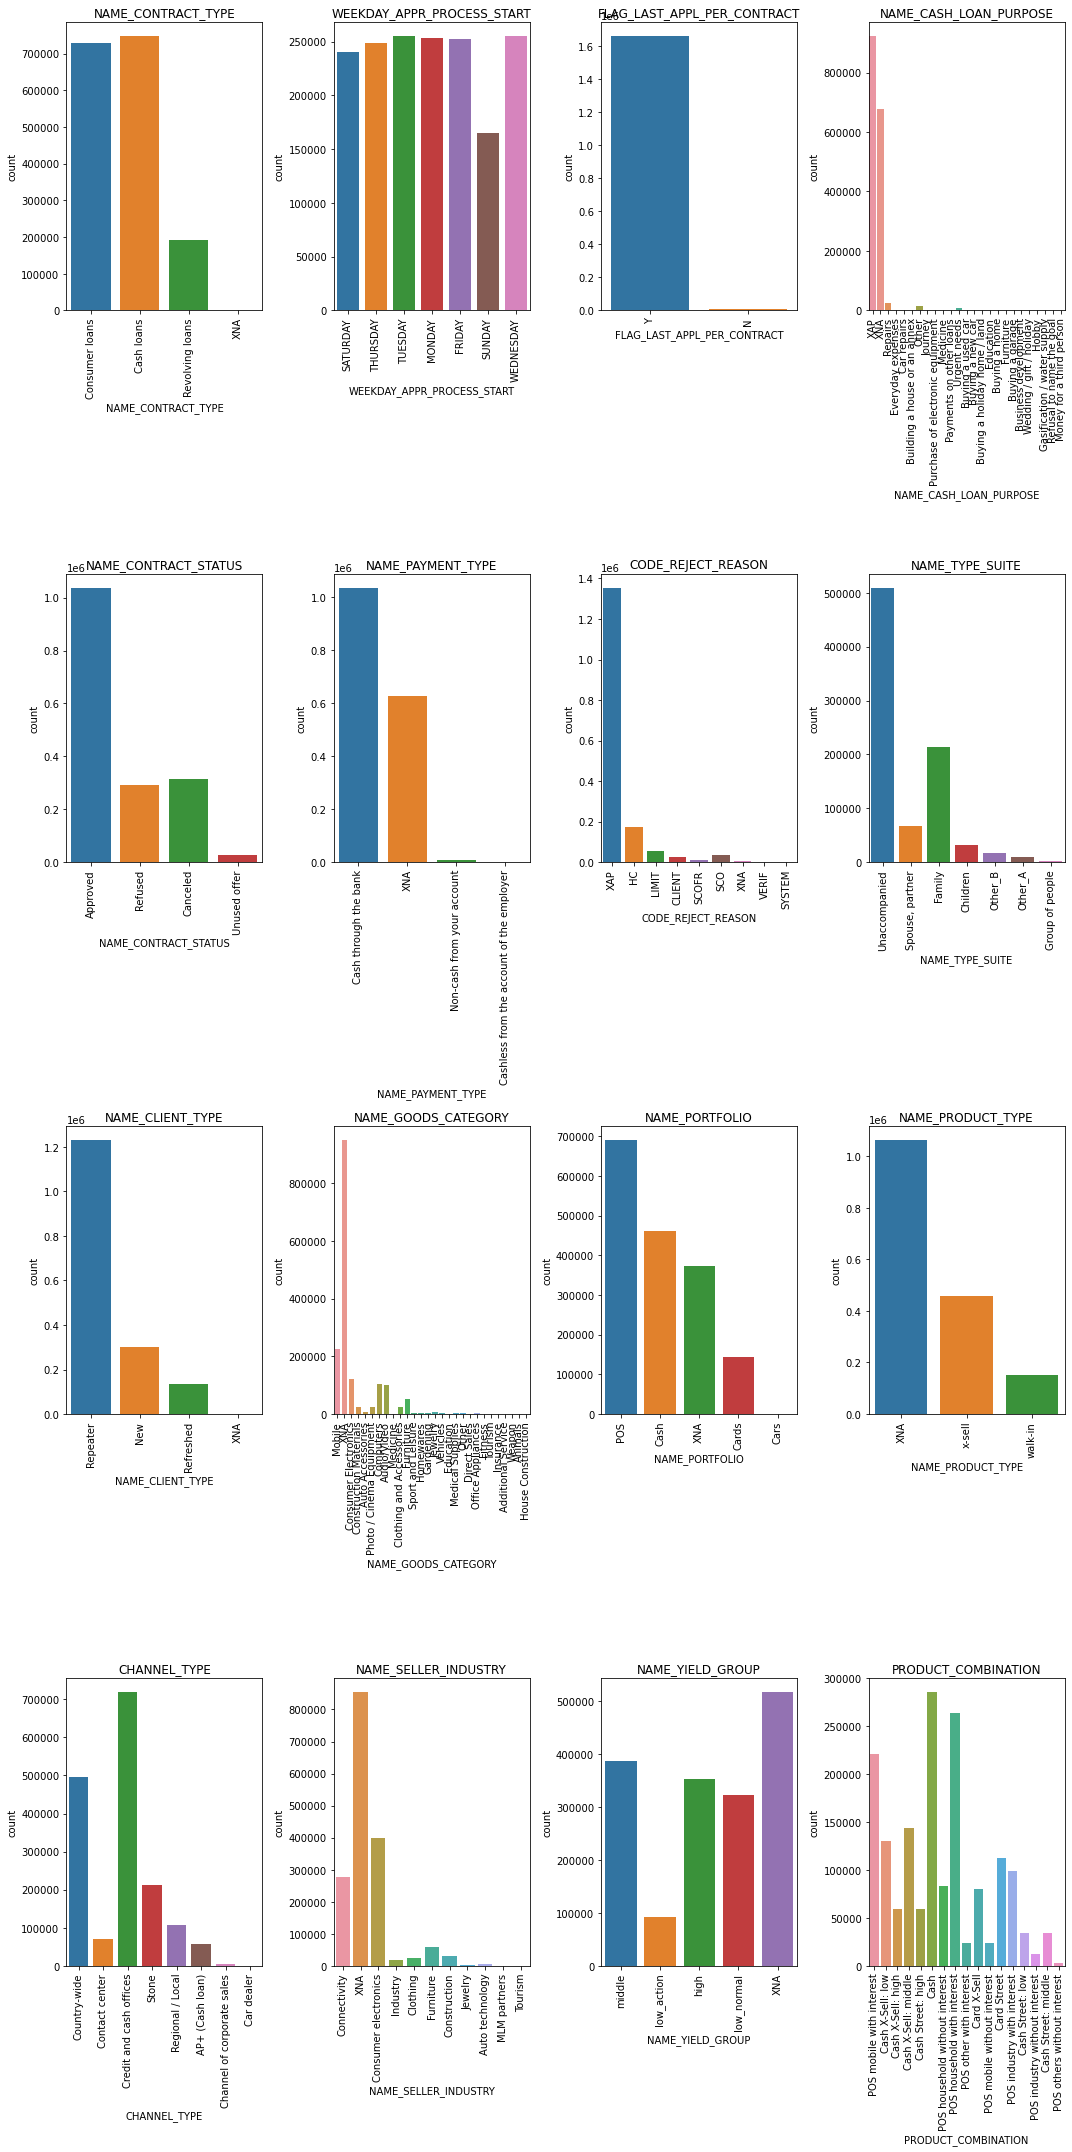

In [196]:
# categocrical columns 
plt.rcParams['figure.figsize']=[15,30]
cat_col=prev_bld.select_dtypes(include=object).columns
a=4
b=4
i=1
for col in cat_col:
    plt.subplot(a,b,i)
    sns.countplot(prev_bld[col])
    i+=1
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [197]:
num_cols=prev_bld.select_dtypes(include=np.number).columns
num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [198]:
prev_bld.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115834    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

In [199]:
null40=list(missing[missing>=40].index)
null40

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [200]:
prev_bld.drop(labels=null40,axis=1,inplace=True)

In [201]:
prev_bld.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved            -73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                  XNA         24.0             high         Cash Street: high

In [202]:
prev_bld.loc[prev_bld['SELLERPLACE_AREA']<=0]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  PRODUCT_COMBINATION
1           2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                           XNA             Approved           -164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                   XNA         36.0       low_action     Cash X-Sell: low
2           2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                           XNA             Approved           -301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0             high    Cash X-Sell: high
3           2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                           XNA             Approved           -512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         12.0           middle  Cash X-Sell: middle
4           1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                       Repairs              Refused           -781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                -1                   XNA         24.0             high    Cash Street: high
5           1383531      199383         Cash loans    23703.930         315000.0    340573.5         315000.0                   SATURDAY                        8                           Y                       1             Everyday expenses             Approved           -684  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         18.0       low_normal     Cash X-Sell: low
...             ...         ...                ...          ...              ...         ...              ...                        ...                      ...                         ...                     ...                           ...                  ...            ...                    ...                ...              ...                 ...            ...               ...                      ...               ...                   ...          ...              ...                  ...
1670189     2406354      377114         Cash loans    26240.715         796500.0    954207.0         796500.0                  WEDNESDAY                       14                           Y                       1  Building a house or an annex             Canceled            -72  Cash through the bank                XAP         Repeater                 XNA           Cash           walk-in           Contact center                -1                   

In [203]:
#days_col=prev_bld.iloc[:,31:36].columns
#days_col

In [204]:
negative_cols=['DAYS_DECISION', 'SELLERPLACE_AREA']
for i in negative_cols:
    prev_bld[i]=abs(prev_bld[i])

In [205]:
prev_bld.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06     1.284699e+06             1.670214e+06            1.670214e+06   1.670214e+06      1.670214e+06  1.297984e+06
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05     2.278473e+05             1.248418e+01            9.964675e-01   8.806797e+02      3.148644e+02  1.605408e+01
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05     3.153966e+05             3.334028e+00            5.932963e-02   7.790997e+02      7.127403e+03  1.456729e+01
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00             0.000000e+00            0.000000e+00   1.000000e+00      0.000000e+00  0.000000e+00
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04     5.084100e+04             1.000000e+01            1.000000e+00   2.800000e+02      1.000000e+00  6.000000e+00
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04     1.123200e+05             1.200000e+01            1.000000e+00   5.810000e+02      3.000000e+00  1.200000e+01
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05     2.340000e+05             1.500000e+01            1.000000e+00   1.300000e+03      8.200000e+01  2.400000e+01
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06             2.300000e+01            1.000000e+00   2.922000e+03      4.000000e+06  8.400000e+01

In [206]:
len(prev_bld.loc[prev_bld['SELLERPLACE_AREA']<=0])

60523

In [207]:
# SELLERPLACE_AREA should taken positive or negative????????

In [208]:
## binning of ' DAYS_DECISION'

In [209]:
#  lets Create bins for Employement Time
prev_bld['YEARS_DECISION'] = prev_bld ['DAYS_DECISION'] // 365
bins = [0,1,2,3,4,5,6]
slots = ['0-1','1-2','2-3','3-4','4-5','5 and above']

prev_bld['DECISION_TAKEN']=pd.cut(prev_bld['YEARS_DECISION'],bins=bins,labels=slots)

In [210]:
prev_bld['DECISION_TAKEN'].describe()

count     1013500
unique          6
top           0-1
freq       386114
Name: DECISION_TAKEN, dtype: object

In [211]:
prev_bld['DECISION_TAKEN'].value_counts(normalize=True)*100

0-1            38.097089
1-2            21.218451
2-3            13.009965
3-4            10.106167
5 and above     9.575136
4-5             7.993192
Name: DECISION_TAKEN, dtype: float64

# data type conversion

In [212]:
prev_bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object  
 12  NAME_CONTRACT_STATUS        

In [213]:
prev_bld.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  YEARS_DECISION DECISION_TAKEN
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved             73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest               0            NaN
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved            164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                 1                  XNA         36.0       low_action          Cash X-Sell: low               0            NaN
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved            301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 1                  XNA         12.0             high         Cash X-Sell: high               0            NaN
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved            512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 1                  XNA         12.0           middle       Cash X-Sell: middle               1            0-1
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused            781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                 1                  XNA         24.0             high         Cash Street: high               2            1-2

In [214]:
cat_cols=['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DECISION_TAKEN']
for i in cat_col:
    prev_bld[col]=prev_bld[col].astype('category')


In [215]:
prev_bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1297979 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1284699 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object  
 12  NAME_CONTRACT_STATUS        

# NULL VALUES IMPUTATION

In [216]:
prev_bld.isnull().sum()*100/len(prev_bld)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

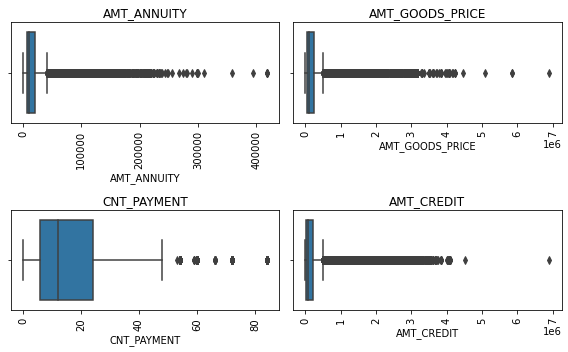

In [217]:
plt.rcParams['figure.figsize']=[8,5]
prev_bld_null=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_PAYMENT','AMT_CREDIT']
r=2
c=2
j=1
for i in prev_bld_null: 
    plt.subplot(r,c,j)
    sns.boxplot(prev_bld[i])
    j+=1
    plt.title(i)
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()


In [218]:
for i in prev_bld_null:
     prev_bld[i].fillna(prev_bld[i].median(),inplace=True)

In [219]:
prev_bld['DECISION_TAKEN'].fillna((prev_bld['DECISION_TAKEN'].mode()[0]),inplace = True)

In [220]:
prev_bld['PRODUCT_COMBINATION'].fillna((prev_bld['PRODUCT_COMBINATION'].mode()[0]),inplace = True)

In [221]:
prev_bld.isnull().sum().sum()


0

In [222]:
# no null values remaining in data set

In [223]:
prev_bld['CNT_PAYMENT'].describe()

count    1.670214e+06
mean     1.515057e+01
std      1.295220e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.600000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [224]:
prev_bld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 28 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  object  
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670214 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object  
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object  
 12  NAME_CONTRACT_STATUS        

In [225]:
#outlier
num_cols=prev_bld.select_dtypes(include=np.number).columns
num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'YEARS_DECISION'], dtype='object')

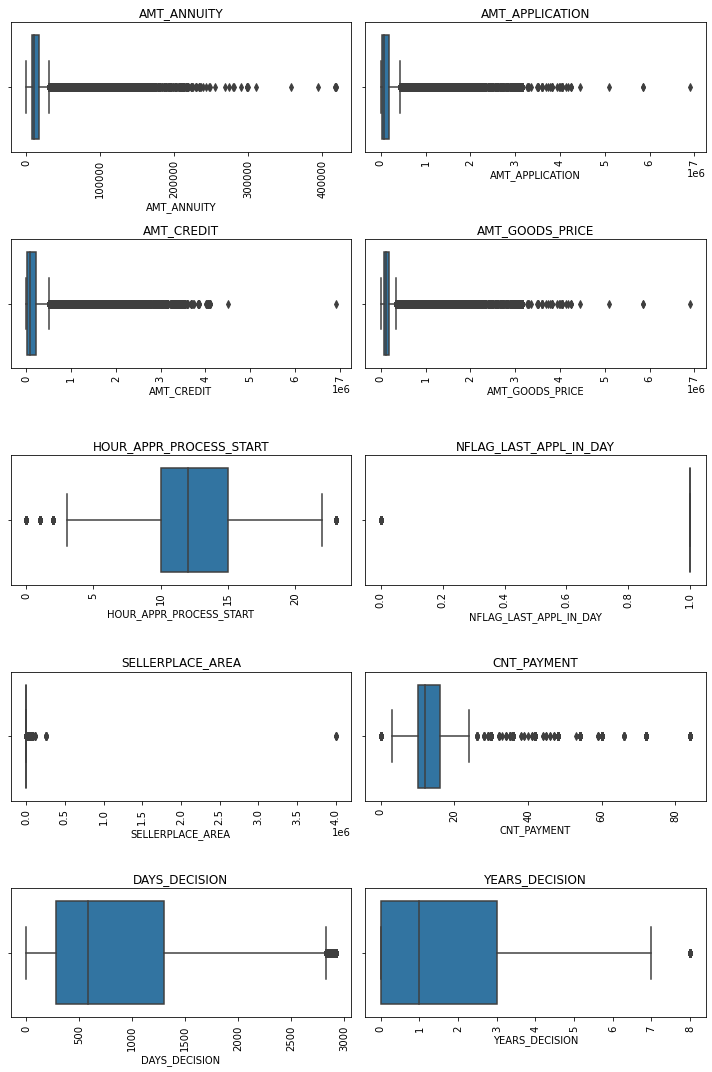

In [226]:

plt.rcParams['figure.figsize']=[10,15]
num_cols=[ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
          'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA',
          'CNT_PAYMENT','DAYS_DECISION','YEARS_DECISION']

r=5
c=2
i=1
for col in num_cols:
    plt.subplot(r,c,i)
    sns.boxplot(prev_bld[col])
    i+=1
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [227]:
prev_bld.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  YEARS_DECISION DECISION_TAKEN
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved             73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest               0            0-1
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                   THURSDAY                       11                           Y                       1                    XNA             Approved            164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                 1                  XNA         36.0       low_action          Cash X-Sell: low               0            0-1
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved            301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 1                  XNA         12.0             high         Cash X-Sell: high               0            0-1
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0         450000.0                     MONDAY                        7                           Y                       1                    XNA             Approved            512  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 1                  XNA         12.0           middle       Cash X-Sell: middle               1            0-1
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0         337500.0                   THURSDAY                        9                           Y                       1                Repairs              Refused            781  Cash through the bank                 HC         Repeater                 XNA           Cash           walk-in  Credit and cash offices                 1                  XNA         24.0             high         Cash Street: high               2            1-2

In [228]:

for col in num_cols:
    q1 = prev_bld[col].quantile(0.25)
    q2 = prev_bld[col].quantile(0.5)
    q3 = prev_bld[col].quantile(0.75)

    iqr = q3-q1
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    prev_bld = prev_bld[~((prev_bld[col] < lower) |(prev_bld[col] > upper))]


In [229]:
prev_bld.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  YEARS_DECISION DECISION_TAKEN
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                   SATURDAY                       15                           Y                       1                    XAP             Approved             73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest               0            0-1
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    TUESDAY                       11                           Y                       1                    XNA             Approved            301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 1                  XNA         12.0             high         Cash X-Sell: high               0            0-1
6     2315218      175704         Cash loans    11250.000              0.0         0.0         112320.0                    TUESDAY                       11                           Y                       1                    XNA             Canceled             14                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                 1                  XNA         12.0              XNA                      Cash               0            0-1
7     1656711      296299         Cash loans    11250.000              0.0         0.0         112320.0                     MONDAY                        7                           Y                       1                    XNA             Canceled             21                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                 1                  XNA         12.0              XNA                      Cash               0            0-1
8     2367563      342292         Cash loans    11250.000              0.0         0.0         112320.0                     MONDAY                       15                           Y                       1                    XNA             Canceled            386                    XNA                XAP         Repeater                 XNA            XNA               XNA  Credit and cash offices                 1                  XNA         12.0              XNA                      Cash               1            0-1

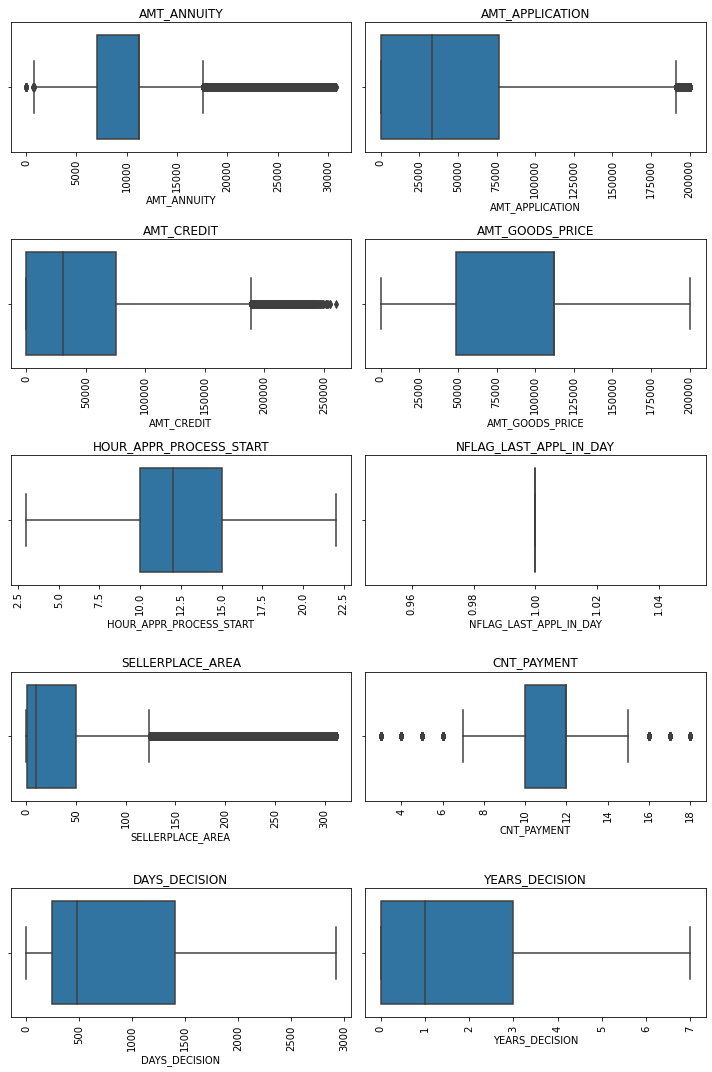

In [230]:
plt.rcParams['figure.figsize']=[10,15]
num_cols=[ 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
          'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'SELLERPLACE_AREA',
          'CNT_PAYMENT','DAYS_DECISION','YEARS_DECISION']


r=5
c=2
i=1
for col in num_cols:
    plt.subplot(r,c,i)
    sns.boxplot(prev_bld[col])
    i+=1
    plt.xticks(rotation=90)
    plt.title(col)
    plt.tight_layout()
plt.show()

In [231]:
prev_bld['CNT_PAYMENT'].describe()

count    904981.000000
mean         10.786536
std           2.853026
min           3.000000
25%          10.000000
50%          12.000000
75%          12.000000
max          18.000000
Name: CNT_PAYMENT, dtype: float64

In [232]:
bld.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_CREDIT_RANGE  AGE  \
0      100002       1         Cash loans           M            N               Y             0             2.025    4.065975      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0      4 lac-5 lac   25   
1      100003       0         Cash loans           F            N               N             0             2.700   12.935025      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0       1 Million+   45   
2      100004       0    Revolving loans           M            Y               Y             0             0.675    1.350000       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                     MONDAY                        9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0      1 lac-2 lac   52   
3      1000

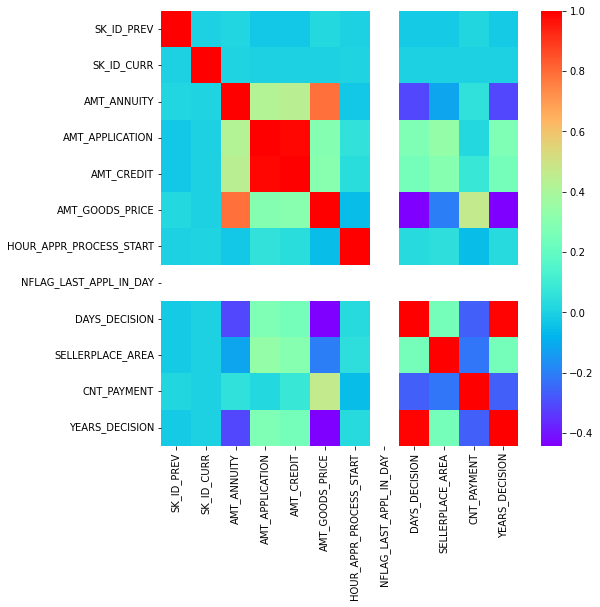

In [233]:
corrmat = prev_bld.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [234]:
corrmat = prev_bld.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1             Var2  Correlation
140    YEARS_DECISION    DAYS_DECISION         0.99
51         AMT_CREDIT  AMT_APPLICATION         0.99
62    AMT_GOODS_PRICE      AMT_ANNUITY         0.79
125       CNT_PAYMENT  AMT_GOODS_PRICE         0.47
101     DAYS_DECISION  AMT_GOODS_PRICE         0.44
137    YEARS_DECISION  AMT_GOODS_PRICE         0.44
50         AMT_CREDIT      AMT_ANNUITY         0.44
38    AMT_APPLICATION      AMT_ANNUITY         0.42
111  SELLERPLACE_AREA  AMT_APPLICATION         0.34
134    YEARS_DECISION      AMT_ANNUITY         0.31

In [ ]:
# now we will merge both files

In [235]:
mergeddf =  pd.merge(bld,prev_bld,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
1      100004       0      Revolving loans           M            Y               Y             0             0.675      1.350000         6750.0           135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
2      100006       0           Cash loans           F            N               Y             0             1.350      3.126825        29686.5           297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
3      100006       0           Cash loans         

In [236]:
mergeddf.shape,prev_bld.shape,bld.shape

((554538, 79), (904981, 28), (221271, 52))

In [237]:
mergeddf.shape,prev_bld.shape,bld.shape

((554538, 79), (904981, 28), (221271, 52))

In [238]:
mergeddf.isnull().sum()


SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
HOUR_APPR_PROCESS_START_x       0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NO

In [239]:
mergeddf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554538 entries, 0 to 554537
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    554538 non-null  int64   
 1   TARGET                        554538 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          554538 non-null  object  
 3   CODE_GENDER                   554538 non-null  object  
 4   FLAG_OWN_CAR                  554538 non-null  category
 5   FLAG_OWN_REALTY               554538 non-null  category
 6   CNT_CHILDREN                  554538 non-null  int64   
 7   AMT_INCOME_TOTAL              554538 non-null  float64 
 8   AMT_CREDIT_x                  554538 non-null  float64 
 9   AMT_ANNUITY_x                 554538 non-null  float64 
 10  AMT_GOODS_PRICE_x             554538 non-null  float64 
 11  NAME_TYPE_SUITE               554538 non-null  object  
 12  NAME_INCOME_TYPE              

In [240]:
mergeddf.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL   AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEARS_EMPLOYED    SK_ID_PREV  AMT_ANNUITY_y  AMT_APPLICATION   AMT_CREDIT_y  AMT_GOODS_PRICE_y  HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  YEARS_DECISION
count  554538.000000  554538.000000  554538.000000     554538.000000  554538.000000  554538.000000       5.545380e+05               554538.000000  554538.000000  554538.000000      554538.000000    554538.000000    554538.000000              554538.000000               554538.000000             554538.000000             554538.000000             554538.000000             554538.000000           554538.000000     554538.00000               554538.000000              554538.000000               554538.000000              554538.000000              554538.000000               554538.000000  554538.000000   554538.000000  5.545380e+05  554538.000000    554538.000000  554538.000000      554538.000000              554538.000000                554538.0  554538.000000     554538.000000  554538.000000   554538.000000
mean   278468.108306       0.096313       0.463710          1.569683       5.226656   24959.886335       4.660440e+05                    0.020064   14711.289398    2351.802672        4630.176132      2805.262433         2.212864                  12.070419                    0.011682                  1.542439                  0.154166                  1.524191                  0.109369            -1048.849374          0.80166                    0.005570                   0.006268                    0.034308                   0.254809                   0.320267                    2.576076      39.803963        5.947922  1.925765e+06    9962.971196     46747.321518   46986.516729       85014.928499                  12.563112                     1.0     877.920265         39.779620      10.699824        1.911687
std    102855.008193       0.295020       0.684491          0.601613       3.142366   11321.961405       2.816830e+05                    0.012095    3636.477357    2214.202161        3230.243735      1513.611037         0.872756                   3.244109                    0.107449                  2.586535                  0.468528                  2.563461                  0.381177              800.492656          0.39875                    0.078162                   0.106555                    0.200661                   0.870776                   0.700913                    2.127126       9.962323        6.074975  5.320791e+05    4341.074450     48903.760657   51002.686040       40590.246146                   3.303962                     0.0     826.779223         60.132194       2.888051        2.259618
min    100003.000000       0.000000       0.000000          0.265500       0.450000    1980.000000       4.050000e+04                    0.000290    7489.000000       0.000000           0.000000         0.000000         1.000000                   0.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4173.000000          0.00000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      20.000000        0.000000  1.000001e+06       0.000000         0.000000       0.000000           0.000000                   3.00000

In [241]:
# List of variables to map

varlist =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_LAST_APPL_PER_CONTRACT']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the merged list
mergeddf[varlist] = mergeddf[varlist].apply(binary_map)
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0      100003       0           Cash loans           F            0               0             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
1      100004       0      Revolving loans           M            1               1             0             0.675      1.350000         6750.0           135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
2      100006       0           Cash loans           F            0               1             0             1.350      3.126825        29686.5           297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
3      100006       0           Cash loans         

In [242]:
#dropping SK_ID_PREV since non required technical field 

mergeddf.drop(['SK_ID_PREV'], 1, inplace = True)
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0      100003       0           Cash loans           F            0               0             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
1      100004       0      Revolving loans           M            1               1             0             0.675      1.350000         6750.0           135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
2      100006       0           Cash loans           F            0               1             0             1.350      3.126825        29686.5           297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
3      100006       0           Cash loans         

In [243]:
mergeddf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 554538 entries, 0 to 554537
Data columns (total 78 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    554538 non-null  int64   
 1   TARGET                        554538 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          554538 non-null  object  
 3   CODE_GENDER                   554538 non-null  object  
 4   FLAG_OWN_CAR                  554538 non-null  category
 5   FLAG_OWN_REALTY               554538 non-null  category
 6   CNT_CHILDREN                  554538 non-null  int64   
 7   AMT_INCOME_TOTAL              554538 non-null  float64 
 8   AMT_CREDIT_x                  554538 non-null  float64 
 9   AMT_ANNUITY_x                 554538 non-null  float64 
 10  AMT_GOODS_PRICE_x             554538 non-null  float64 
 11  NAME_TYPE_SUITE               554538 non-null  object  
 12  NAME_INCOME_TYPE              

In [244]:
obj_dtypes = [i for i in mergeddf.select_dtypes(include=np.object).columns if i not in ["type"] ]
num_dtypes = [i for i in mergeddf.select_dtypes(include = np.number).columns if i not in [ 'TARGET']]

In [245]:
num_dtypes

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'AGE',
 'YEARS_EMPLOYED',
 'AMT_ANNUITY_y',
 'AMT_APPLICATION',
 'AMT_CREDIT_y',
 'AMT_GOODS_PRICE_y',
 'HOUR_APPR_PROCESS_START_y',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'YEARS_DECISION']

In [246]:
obj_dtypes

['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']

In [247]:
dummy1 = pd.get_dummies(mergeddf[['NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'NAME_CONTRACT_TYPE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP']], drop_first=True)
dummy1.head()

NAME_CONTRACT_TYPE_x_Revolving loans  CODE_GENDER_M  CODE_GENDER_XNA  NAME_TYPE_SUITE_Family  NAME_TYPE_SUITE_Group of people  NAME_TYPE_SUITE_Other_A  NAME_TYPE_SUITE_Other_B  NAME_TYPE_SUITE_Spouse, partner  NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Maternity leave  NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  NAME_INCOME_TYPE_Student  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  NAME_EDUCATION_TYPE_Secondary / secondary special  NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  NAME_HOUSING_TYPE_House / apartment  NAME_HOUSING_TYPE_Municipal apartment  NAME_HOUSING_TYPE_Office apartment  NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  OCCUPATION_TYPE_Cleaning staff  OCCUPATION_TYPE_Cooking staff  OCCUPATION_TYPE_Core staff  OCCUPATION_TYPE_Drivers  \
0                                     0              0                0                       1                                0                        0                        0                                0                              0                                 0                           0                               1                         0                         0                                     1                                      0                                    0                                                  0                           1                             0                                        0                         0                                    1                                      0                                   0                                   0                               0                               0                              0                           1                        0   
1                                     1              1                0                       0                                0                        0                        0                                0                              1                                 0                           0                               0                         0                         1                                     0                                      0                                    0                                                  1                           0                             0                                        1                         0                                    1                                      0                                   0                                   0                               0                               0                              0                           0                        0   
2                                     0              0                0                       0                                0                        0                        0                                0                              1                                 0                           0                               0                         0                         1                                     0                                      0                                    0                                                  1                           0                             0                                        0                         0                                    1                                      0                                   0                                   0                               0                               0                              0                           0                        0   
3                                     0              0                0                    

In [248]:
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0      100003       0           Cash loans           F            0               0             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
1      100004       0      Revolving loans           M            1               1             0             0.675      1.350000         6750.0           135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
2      100006       0           Cash loans           F            0               1             0             1.350      3.126825        29686.5           297000.0   Unaccompanied          Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
3      100006       0           Cash loans         

In [249]:
for i in mergeddf.select_dtypes(include=np.object).columns:
    print(i,':')
    print(mergeddf[i].unique())
    print('\n')

NAME_CONTRACT_TYPE_x :
['Cash loans' 'Revolving loans']


CODE_GENDER :
['F' 'M' 'XNA']


NAME_TYPE_SUITE :
['Family' 'Unaccompanied' 'Spouse, partner' 'Other_A' 'Children' 'Other_B'
 'Group of people']


NAME_INCOME_TYPE :
['State servant' 'Working' 'Commercial associate' 'Student' 'Pensioner'
 'Maternity leave']


NAME_EDUCATION_TYPE :
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


NAME_FAMILY_STATUS :
['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']


NAME_HOUSING_TYPE :
['House / apartment' 'With parents' 'Municipal apartment'
 'Office apartment' 'Rented apartment' 'Co-op apartment']


OCCUPATION_TYPE :
['Core staff' 'Laborers' 'Drivers' 'Sales staff' 'Cleaning staff'
 'Private service staff' 'Medicine staff' 'Managers' 'Security staff'
 'Cooking staff' 'High skill tech staff' 'Low-skill Laborers'
 'Accountants' 'Secretaries' 'Waiters/barmen staff' 'Realty agents'
 'HR staff' 'IT staff']


NAME_

In [250]:
mergeddf

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0           100003       0           Cash loans           F            0               0             0             2.700     12.935025        35698.5          1129500.0          Family         State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
1           100004       0      Revolving loans           M            1               1             0             0.675      1.350000         6750.0           135000.0   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032       19046            225             4260.0             2531        Laborers              1.0                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0   
2           100006       0           Cash loans           F            0               1             0             1.350      3.126825        29686.5           297000.0   Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019       19005           3039             9833.0             2437        Laborers              2.0                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0   
3           1000

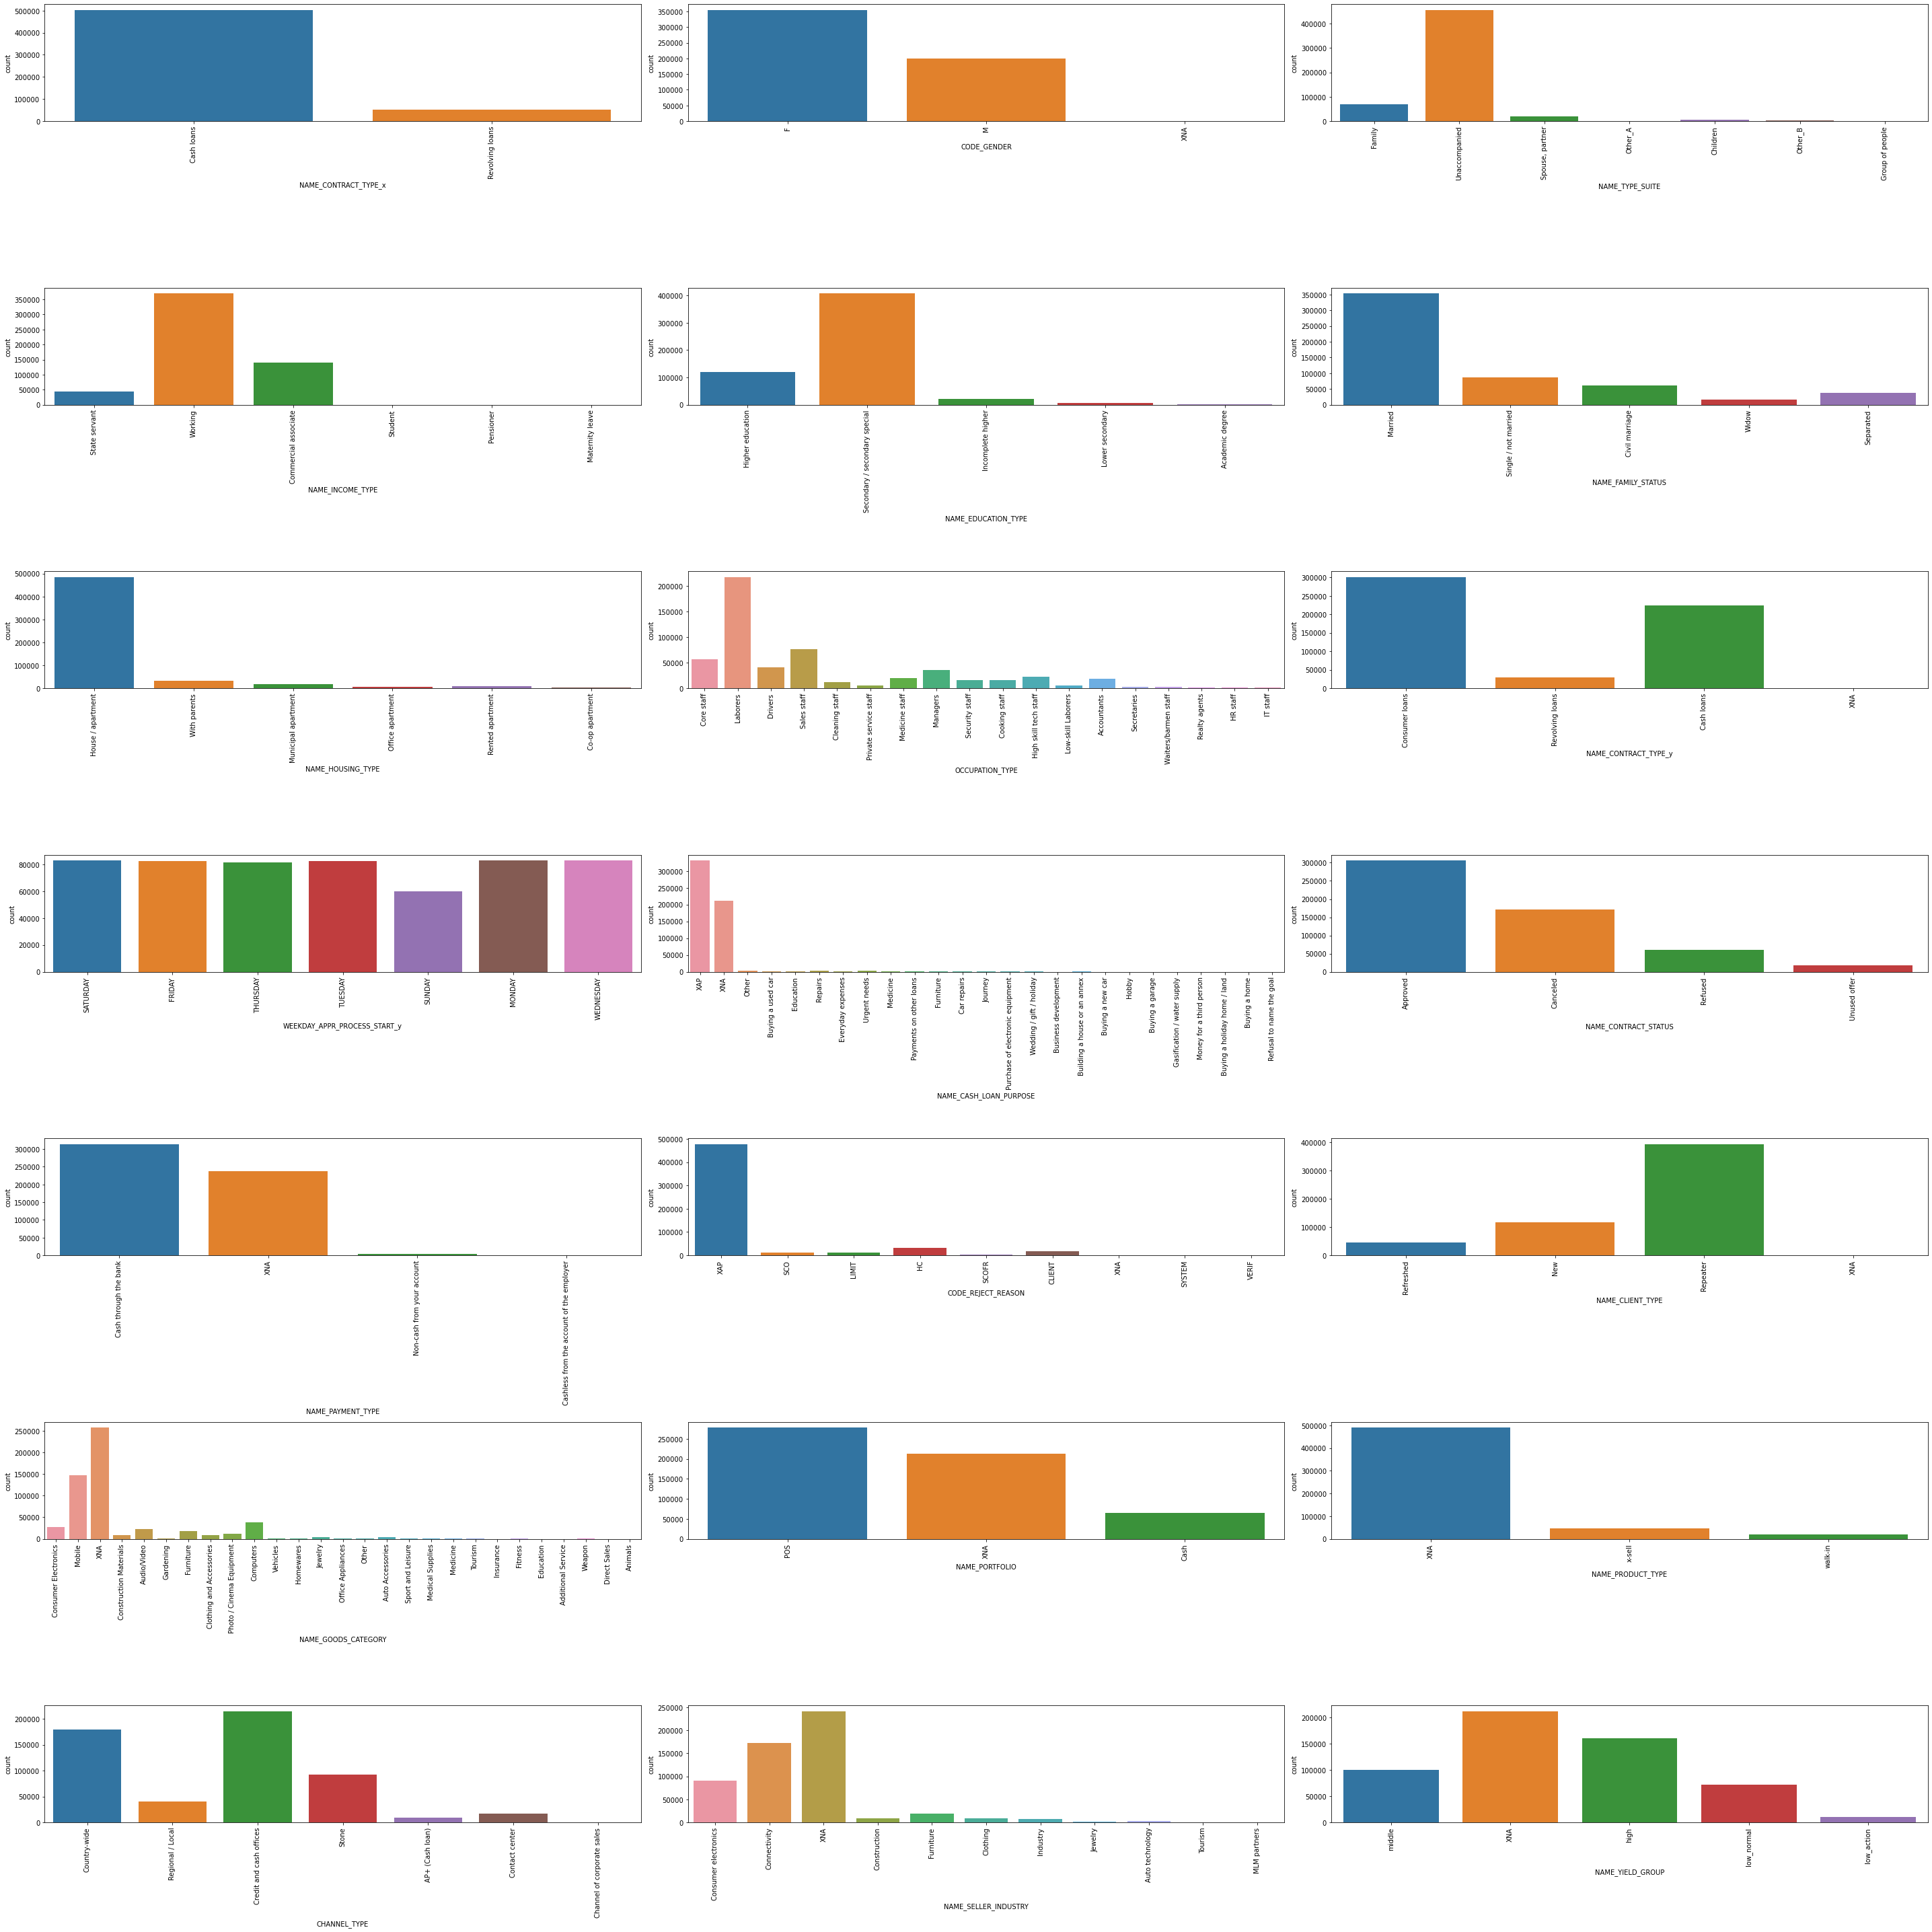

In [251]:
plt.rcParams['figure.figsize']=[40,40]
count = 1
for i in mergeddf.select_dtypes(include=np.object):
    plt.subplot(7,3,count)
    sns.countplot(mergeddf[i])
    plt.xticks(rotation=90)
    count+=1
plt.tight_layout()
plt.show()

In [252]:
mergeddf['CODE_GENDER'].value_counts()

F      354860
M      199654
XNA        24
Name: CODE_GENDER, dtype: int64

In [253]:
mergeddf['CODE_GENDER'] = np.where(mergeddf['CODE_GENDER']=='XNA','F',mergeddf['CODE_GENDER'])

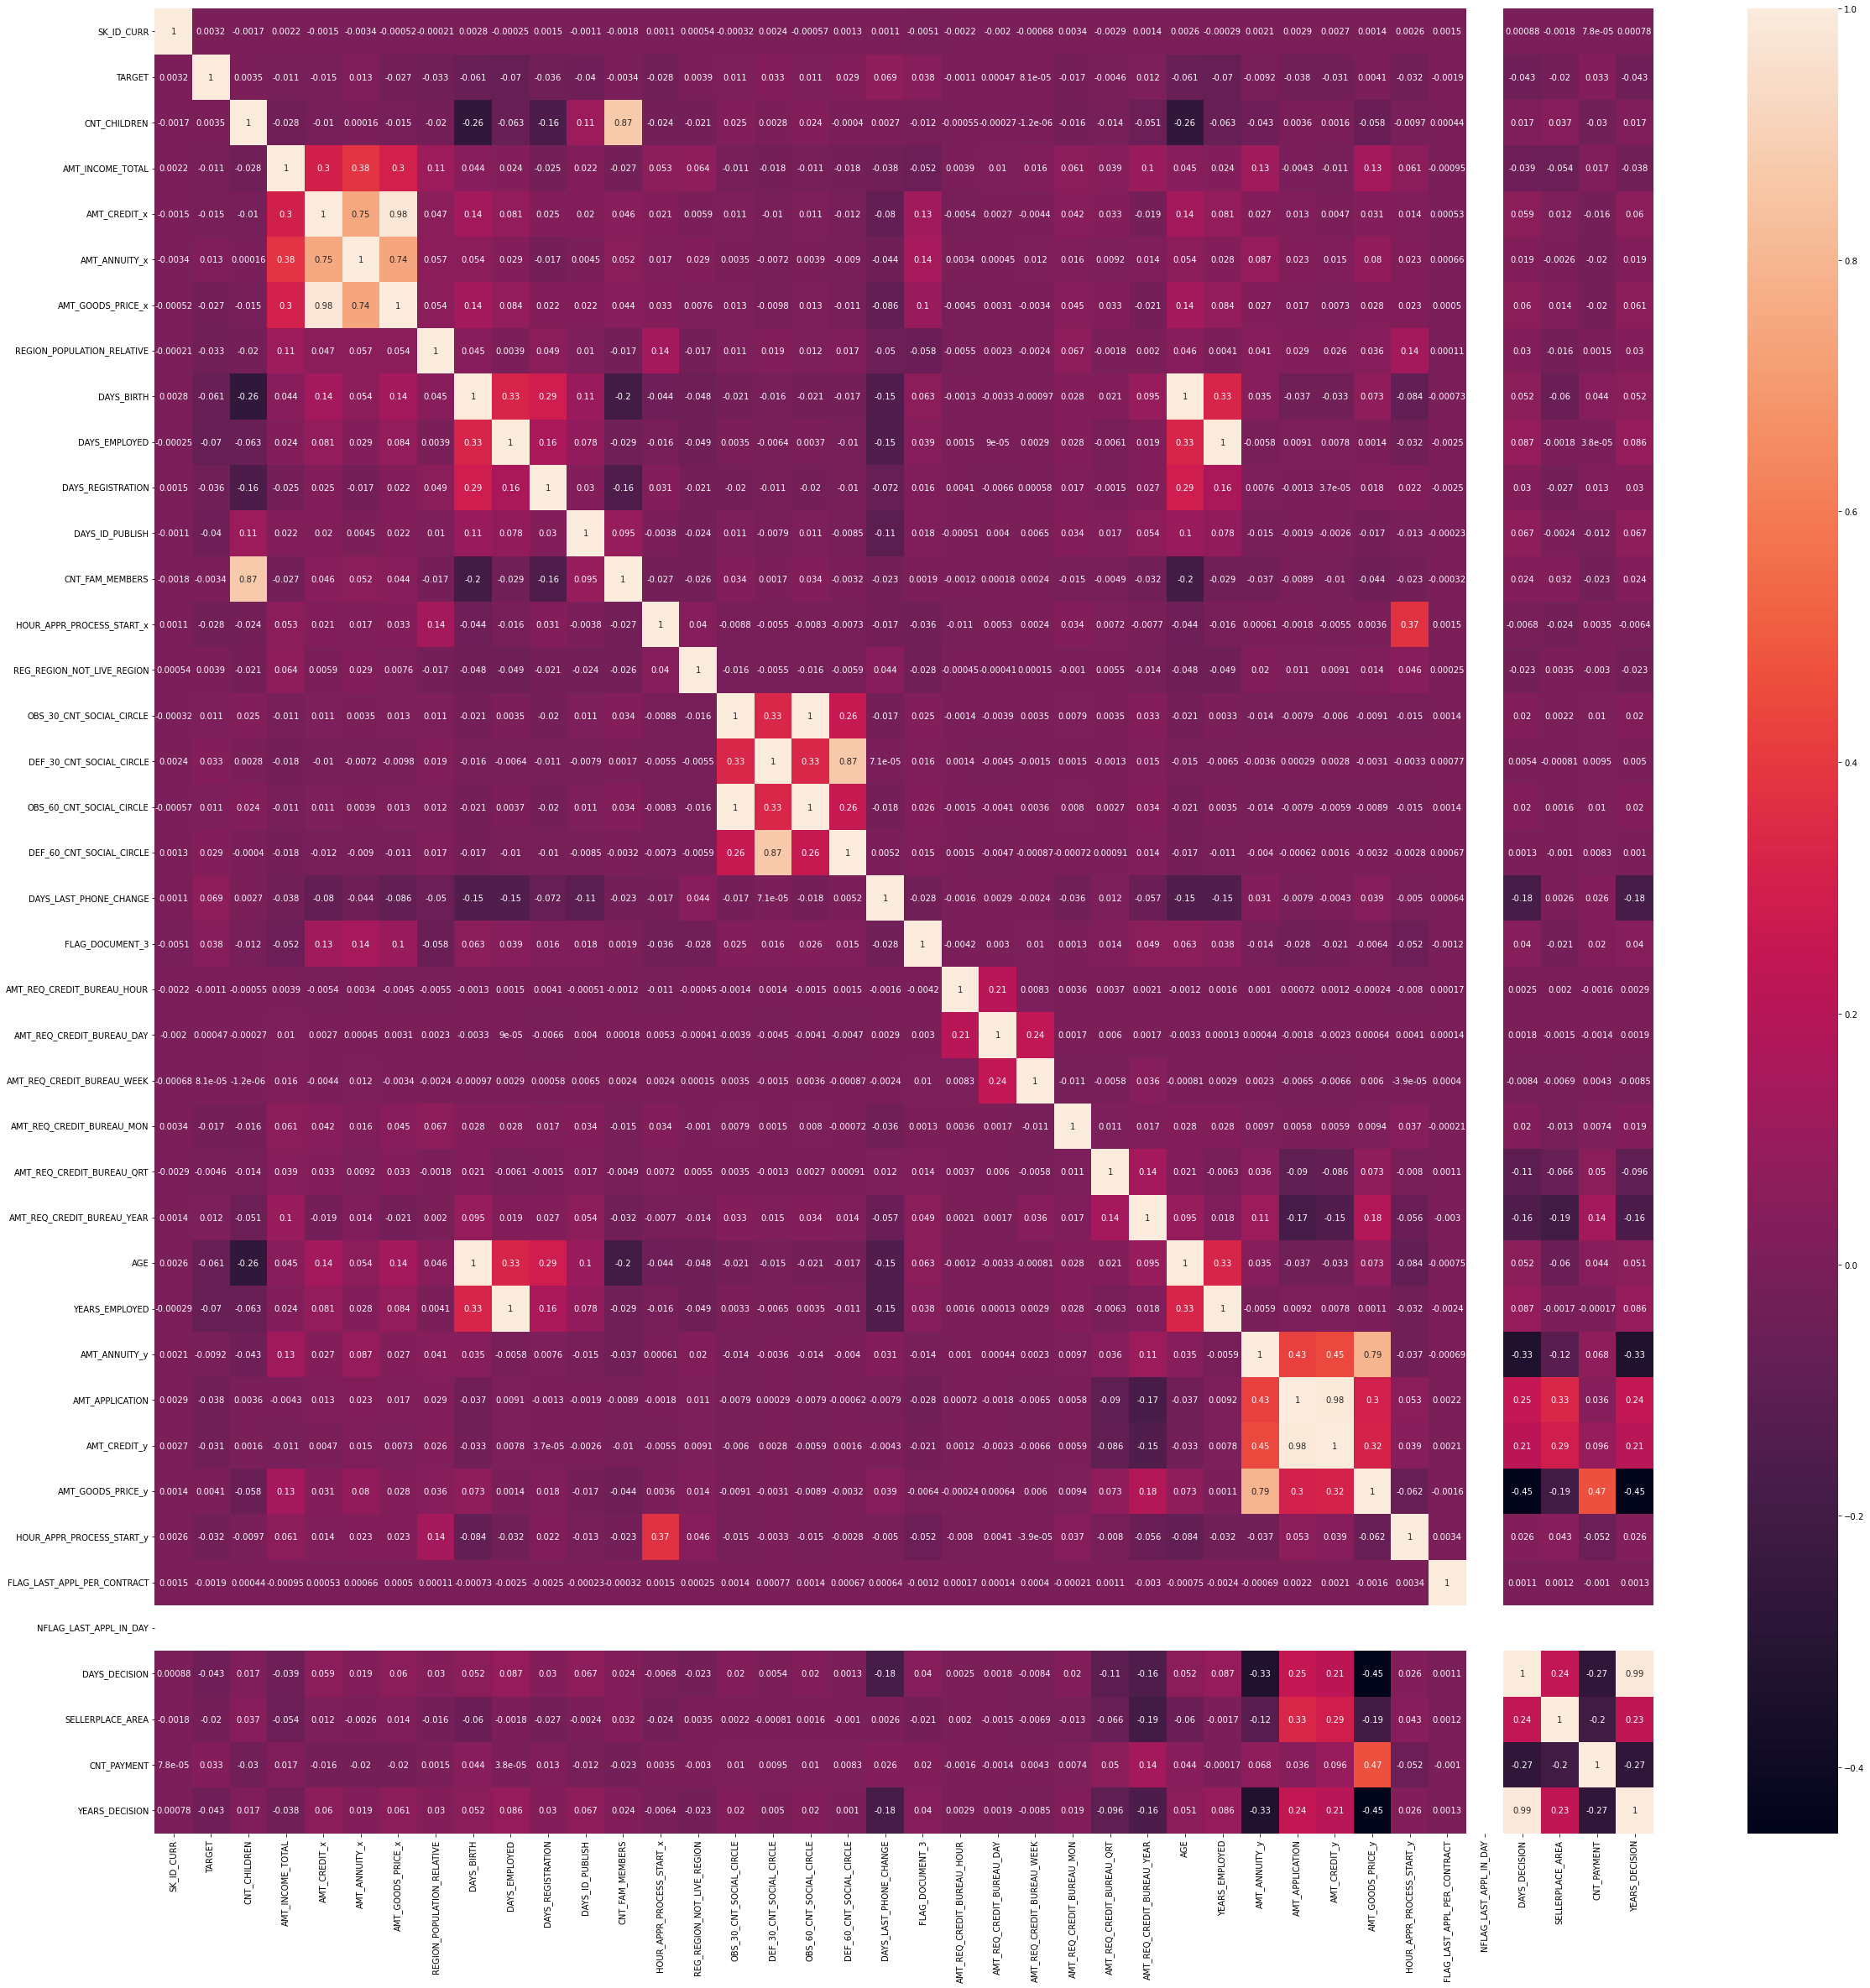

In [254]:
sns.heatmap(mergeddf.corr(),annot=True)
plt.show()

In [255]:
# applying statistical tests on the numerical and categorical columns!!

In [256]:
from statsmodels.formula.api import ols 

In [257]:
import statsmodels.api as sma 

In [258]:
for i in mergeddf.select_dtypes(include=np.number):
    model = ols('TARGET~mergeddf[i]',data=mergeddf).fit()
    print(i,':')
    print(sma.stats.anova_lm(model))
    print('\n')

SK_ID_CURR :
                   df        sum_sq   mean_sq         F    PR(>F)
mergeddf[i]       1.0      0.481543  0.481543  5.532689  0.018665
Residual     554536.0  48264.558474  0.087036       NaN       NaN


TARGET :
                   df        sum_sq       mean_sq             F  PR(>F)
mergeddf[i]       1.0  4.826504e+04  4.826504e+04  2.595949e+31     0.0
Residual     554536.0  1.031018e-21  1.859245e-27           NaN     NaN


CNT_CHILDREN :
                   df        sum_sq   mean_sq         F    PR(>F)
mergeddf[i]       1.0      0.596559  0.596559  6.854184  0.008844
Residual     554536.0  48264.443458  0.087036       NaN       NaN


AMT_INCOME_TOTAL :
                   df        sum_sq   mean_sq          F        PR(>F)
mergeddf[i]       1.0      5.561679  5.561679  63.907681  1.306361e-15
Residual     554536.0  48259.478338  0.087027        NaN           NaN


AMT_CREDIT_x :
                   df        sum_sq    mean_sq           F        PR(>F)
mergeddf[i]       1.0  

DAYS_DECISION :
                   df        sum_sq    mean_sq            F         PR(>F)
mergeddf[i]       1.0     89.251196  89.251196  1027.341788  3.296232e-225
Residual     554536.0  48175.788821   0.086876          NaN            NaN


SELLERPLACE_AREA :
                   df        sum_sq    mean_sq           F        PR(>F)
mergeddf[i]       1.0     18.974024  18.974024  218.085748  2.417318e-49
Residual     554536.0  48246.065993   0.087003         NaN           NaN


CNT_PAYMENT :
                   df        sum_sq    mean_sq          F         PR(>F)
mergeddf[i]       1.0     53.224469  53.224469  612.19192  4.421477e-135
Residual     554536.0  48211.815548   0.086941        NaN            NaN


YEARS_DECISION :
                   df        sum_sq    mean_sq            F         PR(>F)
mergeddf[i]       1.0     90.361456  90.361456  1040.145614  5.497892e-228
Residual     554536.0  48174.678561   0.086874          NaN            NaN




In [259]:
# applying chi square test on categorical columns !!!!
import scipy.stats as stats

In [260]:
for i in mergeddf.select_dtypes(include=np.object):
    tbl = pd.crosstab(mergeddf[i],mergeddf['TARGET'])
    test,pvalue,a,b = stats.chi2_contingency(tbl)
    print(i,":",pvalue)

NAME_CONTRACT_TYPE_x : 1.0676380629631349e-205
CODE_GENDER : 0.0
NAME_TYPE_SUITE : 1.8474588937529196e-12
NAME_INCOME_TYPE : 6.239265390535729e-190
NAME_EDUCATION_TYPE : 0.0
NAME_FAMILY_STATUS : 3.518085468074658e-198
NAME_HOUSING_TYPE : 4.747040746776353e-123
OCCUPATION_TYPE : 0.0
NAME_CONTRACT_TYPE_y : 3.80290966853324e-155
WEEKDAY_APPR_PROCESS_START_y : 9.284510110477163e-12
NAME_CASH_LOAN_PURPOSE : 1.714021180305972e-65
NAME_CONTRACT_STATUS : 0.0
NAME_PAYMENT_TYPE : 6.893986026989631e-125
CODE_REJECT_REASON : 0.0
NAME_CLIENT_TYPE : 1.3192495131872836e-37
NAME_GOODS_CATEGORY : 5.766599038512788e-145
NAME_PORTFOLIO : 7.706020217088594e-161
NAME_PRODUCT_TYPE : 1.3373879192104769e-68
CHANNEL_TYPE : 2.7848656414574267e-146
NAME_SELLER_INDUSTRY : 1.6176592493448163e-147
NAME_YIELD_GROUP : 8.269738614822627e-222


In [261]:
# dropping the columns from the analysis, by taking 1% as significance level. 

In [262]:
for i in mergeddf.columns:
    print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE_x
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT_x
AMT_ANNUITY_x
AMT_GOODS_PRICE_x
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START_x
HOUR_APPR_PROCESS_START_x
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
FLAG_DOCUMENT_3
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
AMT_CREDIT_RANGE
AGE
AGE_GROUP
YEARS_EMPLOYED
EMPLOYMENT_YEAR
AMT

In [263]:
final = mergeddf.drop(['SK_ID_CURR','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',],axis=1)

In [264]:
for i in final.select_dtypes(include=np.object):
    print(i,":")
    print(final[i].value_counts())
    print('\n')

NAME_CONTRACT_TYPE_x :
Cash loans         503266
Revolving loans     51272
Name: NAME_CONTRACT_TYPE_x, dtype: int64


CODE_GENDER :
F    354884
M    199654
Name: CODE_GENDER, dtype: int64


NAME_TYPE_SUITE :
Unaccompanied      456445
Family              69479
Spouse, partner     19026
Children             4825
Other_B              2909
Other_A              1403
Group of people       451
Name: NAME_TYPE_SUITE, dtype: int64


NAME_INCOME_TYPE :
Working                 370100
Commercial associate    140635
State servant            43738
Pensioner                   48
Student                     16
Maternity leave              1
Name: NAME_INCOME_TYPE, dtype: int64


NAME_EDUCATION_TYPE :
Secondary / secondary special    407371
Higher education                 120660
Incomplete higher                 20864
Lower secondary                    5459
Academic degree                     184
Name: NAME_EDUCATION_TYPE, dtype: int64


NAME_FAMILY_STATUS :
Married                 353761
Single / not

In [265]:
#Treating Name_Type_Suite
final["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      456445
Family              69479
Spouse, partner     19026
Children             4825
Other_B              2909
Other_A              1403
Group of people       451
Name: NAME_TYPE_SUITE, dtype: int64

In [266]:
final["NAME_TYPE_SUITE"]=np.where(final["NAME_TYPE_SUITE"]=="Unaccompanied","Unaccompanied","Accompanied")

In [267]:
#Treating NAME_INCOME_TYPE
final["NAME_INCOME_TYPE"].value_counts()

Working                 370100
Commercial associate    140635
State servant            43738
Pensioner                   48
Student                     16
Maternity leave              1
Name: NAME_INCOME_TYPE, dtype: int64

In [268]:
def nameincome(x):
    if x=="Working":
        return "Working"
    elif x=="Commercial associate":
        return "Commercial associate"
    else:
        return "Other"

In [269]:
final["NAME_INCOME_TYPE"] = final["NAME_INCOME_TYPE"].apply(nameincome)

In [270]:
def education(x):
    if x=="Secondary / secondary special":
        return "Secondary"
    else:
        return "Higher"

In [271]:
# treating education type 
final['NAME_EDUCATION_TYPE'] = final['NAME_EDUCATION_TYPE'].apply(education)

In [272]:
def marriage(x):
    if x=="Married":
        return "Married"
    else:
        return "Others"

In [273]:
final["NAME_FAMILY_STATUS"] = final["NAME_FAMILY_STATUS"].apply(marriage)

In [274]:
def house(x):
    if x=="House / apartment":
        return "OWN"
    else:
        return "Others"

In [275]:
final["NAME_HOUSING_TYPE"] = final["NAME_HOUSING_TYPE"].apply(house)

In [276]:
final['NAME_HOUSING_TYPE'].value_counts()

OWN       485216
Others     69322
Name: NAME_HOUSING_TYPE, dtype: int64

In [277]:
dictionary = final['OCCUPATION_TYPE'].value_counts().to_dict()

In [278]:
final['OCCUPATION_TYPE'] = final['OCCUPATION_TYPE'].map(dictionary)

In [279]:
final['OCCUPATION_TYPE'].value_counts()

218073    218073
76772      76772
56799      56799
40884      40884
35129      35129
23031      23031
19831      19831
18283      18283
16491      16491
15466      15466
12584      12584
5926        5926
5470        5470
3341        3341
2887        2887
1723        1723
1040        1040
808          808
Name: OCCUPATION_TYPE, dtype: int64

In [280]:
final['NAME_CONTRACT_TYPE_y'] = np.where(final['NAME_CONTRACT_TYPE_y']=='XNA','Consumer loans',final['NAME_CONTRACT_TYPE_y'])

In [281]:
final['NAME_CONTRACT_TYPE_y'].value_counts()

Consumer loans     301513
Cash loans         223317
Revolving loans     29708
Name: NAME_CONTRACT_TYPE_y, dtype: int64

In [282]:
final['WEEKDAY_APPR_PROCESS_START_y'] = final['WEEKDAY_APPR_PROCESS_START_y'].map(final['WEEKDAY_APPR_PROCESS_START_y'].value_counts().to_dict())

In [283]:
final['WEEKDAY_APPR_PROCESS_START_y'].value_counts()

82906    82906
82812    82812
82737    82737
82464    82464
82452    82452
81339    81339
59828    59828
Name: WEEKDAY_APPR_PROCESS_START_y, dtype: int64

In [284]:
final['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 331221
XNA                                 210763
Other                                 3517
Repairs                               3036
Urgent needs                          2159
Everyday expenses                      944
Education                              562
Medicine                               530
Purchase of electronic equipment       440
Car repairs                            254
Journey                                238
Wedding / gift / holiday               200
Buying a used car                      180
Furniture                              142
Payments on other loans                122
Building a house or an annex            96
Business development                    34
Gasification / water supply             30
Buying a new car                        24
Buying a holiday home / land            12
Hobby                                   10
Money for a third person                 8
Buying a garage                          6
Buying a ho

In [285]:
def cash_loan(x):
    if x=="XAP":
        return "XAP"
    elif x=="XNA":
        return "XNA"
    else:
        return "Others"

In [286]:
final['NAME_CASH_LOAN_PURPOSE'] = final['NAME_CASH_LOAN_PURPOSE'].apply(cash_loan)

In [287]:
final['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP       331221
XNA       210763
Others     12554
Name: NAME_CASH_LOAN_PURPOSE, dtype: int64

In [288]:
final["NAME_CASH_LOAN_PURPOSE"]=np.where(final["NAME_CASH_LOAN_PURPOSE"]=="Others","XAP",final["NAME_CASH_LOAN_PURPOSE"])

In [289]:
final["NAME_CONTRACT_STATUS"].value_counts()

Approved        306187
Canceled        172009
Refused          59542
Unused offer     16800
Name: NAME_CONTRACT_STATUS, dtype: int64

In [290]:
final["NAME_CONTRACT_STATUS"]=np.where(final["NAME_CONTRACT_STATUS"]=="Approved","Approved","Rejected")

In [291]:
final["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        314275
XNA                                          236889
Non-cash from your account                     2984
Cashless from the account of the employer       390
Name: NAME_PAYMENT_TYPE, dtype: int64

In [292]:
final["NAME_PAYMENT_TYPE"]=np.where(final["NAME_PAYMENT_TYPE"]=="Cash through the bank","Cash through the bank","XNA")

In [293]:
final['CODE_REJECT_REASON'].value_counts()

XAP       478192
HC         30482
CLIENT     16800
LIMIT      13090
SCO        10993
SCOFR       3499
XNA         1269
VERIF        177
SYSTEM        36
Name: CODE_REJECT_REASON, dtype: int64

In [294]:
final["CODE_REJECT_REASON"]=np.where(final["CODE_REJECT_REASON"]=="XAP","XAP","Others")

In [295]:
final['NAME_CLIENT_TYPE'].value_counts()

Repeater     393169
New          116006
Refreshed     44608
XNA             755
Name: NAME_CLIENT_TYPE, dtype: int64

In [296]:
final['NAME_CLIENT_TYPE'] = np.where(final['NAME_CLIENT_TYPE']=="Repeater","Repeater","New")

In [297]:
final["NAME_GOODS_CATEGORY"].value_counts()

XNA                         257608
Mobile                      146598
Computers                    37701
Consumer Electronics         27649
Audio/Video                  22525
Furniture                    18227
Photo / Cinema Equipment     11535
Construction Materials        8206
Clothing and Accessories      8139
Auto Accessories              3922
Jewelry                       3804
Sport and Leisure             1374
Homewares                     1164
Other                         1158
Vehicles                      1147
Gardening                     1108
Medical Supplies               868
Office Appliances              723
Tourism                        393
Medicine                       390
Fitness                         97
Weapon                          44
Insurance                       40
Direct Sales                    40
Education                       39
Additional Service              38
Animals                          1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [298]:
electronics=["Mobile","Computers","Consumer Electronics","Audio/Video"]

In [299]:
def namecat(x):
    if x in electronics:
        return "electronics"
    else:
        return "XNA"

In [300]:
final["NAME_GOODS_CATEGORY"]=final["NAME_GOODS_CATEGORY"].apply(namecat)

In [301]:
final["NAME_GOODS_CATEGORY"].value_counts()

XNA            320065
electronics    234473
Name: NAME_GOODS_CATEGORY, dtype: int64

In [302]:
final["NAME_GOODS_CATEGORY"]=np.where(final["NAME_GOODS_CATEGORY"]=="XNA","Others",final["NAME_GOODS_CATEGORY"])

In [303]:
final["NAME_PORTFOLIO"].value_counts()

POS     278152
XNA     212295
Cash     64091
Name: NAME_PORTFOLIO, dtype: int64

In [304]:
#Treatment of name portfolio
final["NAME_PORTFOLIO"].value_counts()

POS     278152
XNA     212295
Cash     64091
Name: NAME_PORTFOLIO, dtype: int64

In [305]:
final["NAME_PORTFOLIO"]=final["NAME_PORTFOLIO"].map(final["NAME_PORTFOLIO"].value_counts().to_dict())

In [306]:
final["NAME_PRODUCT_TYPE"].value_counts()

XNA        490447
x-sell      46185
walk-in     17906
Name: NAME_PRODUCT_TYPE, dtype: int64

In [307]:
final["NAME_PRODUCT_TYPE"]=np.where(final["NAME_PRODUCT_TYPE"]=="XNA","XNA","Others")

In [308]:
final["CHANNEL_TYPE"].value_counts()

Credit and cash offices       215078
Country-wide                  179608
Stone                          92326
Regional / Local               40978
Contact center                 16918
AP+ (Cash loan)                 9359
Channel of corporate sales       271
Name: CHANNEL_TYPE, dtype: int64

In [309]:
final["CHANNEL_TYPE"]=final["CHANNEL_TYPE"].map(final["CHANNEL_TYPE"].value_counts().to_dict())

In [310]:
#NAME_SELLER_INDUSTRY changed

In [311]:
final["NAME_SELLER_INDUSTRY"]=final["NAME_SELLER_INDUSTRY"].map(final["NAME_SELLER_INDUSTRY"].value_counts().to_dict())

In [312]:
final["NAME_YIELD_GROUP"].value_counts()

XNA           212295
high          160717
middle         99535
low_normal     72182
low_action      9809
Name: NAME_YIELD_GROUP, dtype: int64

In [313]:
final.head()

TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR AMT_INCOME_RANGE NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  \
0       0           Cash loans           F            0               0             0             2.700     12.935025        35698.5          1129500.0     Accompanied            Other              Higher            Married               OWN                    0.003541       16765           1188             1186.0              291            56799                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                        0.0                        0.0                         0.0       1 Million+   45     40-50               3             0-5      2 lac-3 lac       Consumer loans        6737.31         68809.50   
1       0      Revolving loans           M            1               1             0             0.675      1.350000         6750.0           135000.0   Unaccompanied          Working           Secondary             Others               OWN                    0.010032       19046            225             4260.0             2531           218073                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                        0.0                        0.0                         0.0      1 lac-2 lac   52   50 plus               0             0-5          0-1 lac       Consumer loans        5357.25         24282.00   
2       0           Cash loans           F            0               1             0             1.350      3.126825        29686.5           297000.0   Unaccompanied          Working           Secondary             Others               OWN                    0.008019       19005           3039             9833.0             2437           218073                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                        0.0                        0.0                         1.0      3 lac-4 lac   52   50 plus               8            5-10      1 lac-2 lac      Revolving loans       11250.00             0.00   
3       0          

In [314]:
final["NAME_YIELD_GROUP"]=np.where(final["NAME_YIELD_GROUP"]=="XNA","high",final["NAME_YIELD_GROUP"])

In [315]:
for i in final.select_dtypes(include=np.object):
    print(final[i].unique())

['Cash loans' 'Revolving loans']
['F' 'M']
['Accompanied' 'Unaccompanied']
['Other' 'Working' 'Commercial associate']
['Higher' 'Secondary']
['Married' 'Others']
['OWN' 'Others']
['Consumer loans' 'Revolving loans' 'Cash loans']
['XAP' 'XNA']
['Approved' 'Rejected']
['Cash through the bank' 'XNA']
['XAP' 'Others']
['New' 'Repeater']
['electronics' 'Others']
['XNA' 'Others']
['middle' 'high' 'low_normal' 'low_action']


In [316]:
catcol = final.select_dtypes(include=np.object)

In [317]:
catcol = pd.get_dummies(catcol, drop_first=True)

In [318]:
catcol

NAME_CONTRACT_TYPE_x_Revolving loans  CODE_GENDER_M  NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Other  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Secondary  NAME_FAMILY_STATUS_Others  NAME_HOUSING_TYPE_Others  NAME_CONTRACT_TYPE_y_Consumer loans  NAME_CONTRACT_TYPE_y_Revolving loans  NAME_CASH_LOAN_PURPOSE_XNA  NAME_CONTRACT_STATUS_Rejected  NAME_PAYMENT_TYPE_XNA  CODE_REJECT_REASON_XAP  NAME_CLIENT_TYPE_Repeater  NAME_GOODS_CATEGORY_electronics  NAME_PRODUCT_TYPE_XNA  NAME_YIELD_GROUP_low_action  NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle
0                                          0              0                              0                       1                         0                              0                          0                         0                                    1                                     0                           0                              0                      0                       1                          0                                1                      1                            0                            0                        1
1                                          1              1                              1                       0                         1                              1                          1                         0                                    1                                     0                           0                              0                      0                       1                          0                                1                      1                            0                            0                        1
2                                          0              0                              1                       0                         1                              1                          1                         0                                    0                                     1                           0                              1                      1                       1                          1                                0                      1                            0                            0                        0
3                                          0              0                              1                       0                         1                              1                          1                         0                                    0                                     0                           1                              1                      1                       1                          1                                0                      1                            0                            0                        0
4                                          0              0                              1                       0                         1                              1                          1                         0                                    1                                     0                           0                              0                      1                       1                          0                                0                      1                            0                            0                        1
...                                      ...            ...                            ...                     ...                       ...                            ...                        ...                       ...                                  ...                                   ...                         ...                            ...                    ...                     ...                        ...                              ...                    ...                          ...                          ...                      ...
5545

In [319]:
numcol = final.select_dtypes(exclude=np.object)

In [320]:
from sklearn.preprocessing import StandardScaler

In [321]:
numcol

TARGET FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_CREDIT_RANGE  AGE AGE_GROUP  YEARS_EMPLOYED EMPLOYMENT_YEAR AMT_INCOME_RANGE  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  DAYS_DECISION  NAME_PORTFOLIO  CHANNEL_TYPE  \
0            0            0               0             0             2.700     12.935025        35698.5          1129500.0                    0.003541       16765           1188             1186.0              291            56799                    1                           1                       MONDAY                         11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                        0.0                        0.0                         0.0       1 Million+   45     40-50               3             0-5      2 lac-3 lac       6737.310         68809.50       68053.5           68809.50                         82812                         15           2341          278152        179608   
1            0            1               1             0             0.675      1.350000         6750.0           135000.0                    0.010032       19046            225             4260.0             2531           218073                    2                           2                       MONDAY                          9                           0                          0                           0                      0                      0                       0              Government                       0.0                       0.0                       0.0                       0.0                  -815.0                0                        0.0                        0.0                         0.0      1 lac-2 lac   52   50 plus               0             0-5          0-1 lac       5357.250         24282.00       20106.0           24282.00                         82452                          5            815          278152         40978   
2            0            0               1             0             1.350      3.126825        29686.5           297000.0                    0.008019       19005           3039             9833.0             2437           218073                    2                           2                    WEDNESDAY                         17                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       0.0                       2.0                       0.0                  -617.0                1                        0.0                        0.0                         1.0      3 lac-4 lac   52   50 plus               8            5-10      1 lac-2 lac      11250.000             0.00           0.0          112320.00                         81339                         15            181          212295        215078   
3            0            0             

In [322]:
numcol['WEEKDAY_APPR_PROCESS_START_x'] = numcol['WEEKDAY_APPR_PROCESS_START_x'].astype(object)

In [323]:
lis = ['ORGANIZATION_TYPE','AMT_CREDIT_RANGE','AGE_GROUP','EMPLOYMENT_YEAR','AMT_INCOME_RANGE','PRODUCT_COMBINATION','DECISION_TAKEN']
for i in lis:
    final[i] = final[i].astype(object)

In [324]:
for i in final.select_dtypes(include=np.object):
    print(i,':')
    print(final[i].unique())
    print('\n')

NAME_CONTRACT_TYPE_x :
['Cash loans' 'Revolving loans']


CODE_GENDER :
['F' 'M']


NAME_TYPE_SUITE :
['Accompanied' 'Unaccompanied']


NAME_INCOME_TYPE :
['Other' 'Working' 'Commercial associate']


NAME_EDUCATION_TYPE :
['Higher' 'Secondary']


NAME_FAMILY_STATUS :
['Married' 'Others']


NAME_HOUSING_TYPE :
['OWN' 'Others']


ORGANIZATION_TYPE :
['School' 'Government' 'Business Entity Type 3' 'Religion' 'Other'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Transport: type 2'
 'Construction' 'Housing' 'Kindergarten' 'Trade: type 7'
 'Industry: type 11' 'Military' 'Services' 'Self-employed'
 'Transport: type 4' 'Industry: type 1' 'Security' 'Trade: type 2'
 'University' 'Police' 'Business Entity Type 1' 'Postal'
 'Transport: type 3' 'Agriculture' 'Restaurant' 'Culture' 'Hotel'
 'Industry: type 7' 'Industry: type 3' 'Trade: type 3' 'Industry: type 9'
 'Bank' 'Trade: type 6' 'Industry: type 2' 'Emergency' 'Industry: type 4'
 'Insurance' 'Mobile' 'Industry: type 10' 'Industry: type 

In [325]:
def frequency_encoding(data, column):
    
    # Calculate the frequency of each category in the column
    freq = data[column].value_counts()
    
    # Replace the categories with their frequencies
    data[column] = data[column].map(freq)
    
    return data

In [326]:
for i in lis:
    final = frequency_encoding(final, i)

In [327]:
catcol = final.select_dtypes(include=np.object)

In [328]:
catcol = pd.get_dummies(catcol,drop_first=True)

In [329]:
numcol = final.select_dtypes(exclude=np.object)

In [330]:
numcol['WEEKDAY_APPR_PROCESS_START_x'] = numcol['WEEKDAY_APPR_PROCESS_START_x'].map(numcol['WEEKDAY_APPR_PROCESS_START_x'].value_counts().to_dict())

In [331]:
sc=StandardScaler()
numcol = sc.fit_transform(numcol)

In [332]:
numcol = pd.DataFrame(numcol,columns = final.select_dtypes(exclude=np.object).columns)

In [333]:
numcol

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_CREDIT_RANGE       AGE  AGE_GROUP  YEARS_EMPLOYED  EMPLOYMENT_YEAR  AMT_INCOME_RANGE  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  DAYS_DECISION  NAME_PORTFOLIO  \
0      -0.326462     -0.740803        -1.556894     -0.677453          1.878812      2.453049       0.948477           2.355330                   -1.366049    0.564753      -0.525609          -1.066229        -1.661104        -0.615533             -2.303790                    -2.294171                      0.393730                  -0.329958                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473          -0.750548                 -0.209717                 -0.329044                 -0.204486                 -0.286924                0.275892         0.497405                  -0.292623                  -0.456928                   -1.211060         -0.165675  0.521569   0.383167       -0.485257         0.797449         -0.927281      -0.743057         0.451135      0.413057          -0.399245                      0.397629                   0.737566       1.769615        0.747888   
1      -0.326462      1.349886         0.642304     -0.677453         -1.487140     -1.233675      -1.608370          -1.175237                   -0.829394    1.192009      -0.960529          -0.114597        -0.181198         1.213269             -0.170708                    -0.131958                      0.393730                  -0.946461                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473          -0.687858                 -0.596335                 -0.329044                 -0.594584                 -0.286924                0.292132        -2.010435                  -0.292623                  -0.456928                   -1.211060         -0.102652  1.224217  -1.603340       -0.979087         0.797449         -1.229608      -1.060964        -0.459379     -0.527042          -1.496246                      0.346472                  -2.289106      -0.076103        0.747888   
2      -0.326462     -0.740803         0.642304     -0.677453         -0.365156     -0.668233       0.417473          -0.600122                   -0.995822    1.180735       0.310359           1.610661        -0.243301         1.213269             -0.170708                    -0.131958                      0.381706                   1.519550                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473           1.462356                  0.176901                 -0.329044                  0.185612                 -0.286924                0.539480         0.497405                  -0.292623                  -0.456928                   -0.740942         -0.312901  1.224217  -1.603340        0.337792        -0.941801          0.870474       0.296477        -0.955905     -0.921257           0.672701                      0.188311                   0.737566      -0.842935       -0.238124   
3      -0.326462     -0.740803    

In [334]:
catcol

NAME_CONTRACT_TYPE_x_Revolving loans  CODE_GENDER_M  NAME_TYPE_SUITE_Unaccompanied  NAME_INCOME_TYPE_Other  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Secondary  NAME_FAMILY_STATUS_Others  NAME_HOUSING_TYPE_Others  NAME_CONTRACT_TYPE_y_Consumer loans  NAME_CONTRACT_TYPE_y_Revolving loans  NAME_CASH_LOAN_PURPOSE_XNA  NAME_CONTRACT_STATUS_Rejected  NAME_PAYMENT_TYPE_XNA  CODE_REJECT_REASON_XAP  NAME_CLIENT_TYPE_Repeater  NAME_GOODS_CATEGORY_electronics  NAME_PRODUCT_TYPE_XNA  NAME_YIELD_GROUP_low_action  NAME_YIELD_GROUP_low_normal  NAME_YIELD_GROUP_middle
0                                          0              0                              0                       1                         0                              0                          0                         0                                    1                                     0                           0                              0                      0                       1                          0                                1                      1                            0                            0                        1
1                                          1              1                              1                       0                         1                              1                          1                         0                                    1                                     0                           0                              0                      0                       1                          0                                1                      1                            0                            0                        1
2                                          0              0                              1                       0                         1                              1                          1                         0                                    0                                     1                           0                              1                      1                       1                          1                                0                      1                            0                            0                        0
3                                          0              0                              1                       0                         1                              1                          1                         0                                    0                                     0                           1                              1                      1                       1                          1                                0                      1                            0                            0                        0
4                                          0              0                              1                       0                         1                              1                          1                         0                                    1                                     0                           0                              0                      1                       1                          0                                0                      1                            0                            0                        1
...                                      ...            ...                            ...                     ...                       ...                            ...                        ...                       ...                                  ...                                   ...                         ...                            ...                    ...                     ...                        ...                              ...                    ...                          ...                          ...                      ...
5545

In [335]:
final_data = pd.concat([numcol,catcol],axis=1)

In [336]:
final_data.isnull().sum().sum()

0

In [337]:
final_data.head()

TARGET  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OCCUPATION_TYPE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_CREDIT_RANGE       AGE  AGE_GROUP  YEARS_EMPLOYED  EMPLOYMENT_YEAR  AMT_INCOME_RANGE  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  WEEKDAY_APPR_PROCESS_START_y  HOUR_APPR_PROCESS_START_y  DAYS_DECISION  NAME_PORTFOLIO  \
0 -0.326462     -0.740803        -1.556894     -0.677453          1.878812      2.453049       0.948477           2.355330                   -1.366049    0.564753      -0.525609          -1.066229        -1.661104        -0.615533             -2.303790                    -2.294171                      0.393730                  -0.329958                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473          -0.750548                 -0.209717                 -0.329044                 -0.204486                 -0.286924                0.275892         0.497405                  -0.292623                  -0.456928                   -1.211060         -0.165675  0.521569   0.383167       -0.485257         0.797449         -0.927281      -0.743057         0.451135      0.413057          -0.399245                      0.397629                   0.737566       1.769615        0.747888   
1 -0.326462      1.349886         0.642304     -0.677453         -1.487140     -1.233675      -1.608370          -1.175237                   -0.829394    1.192009      -0.960529          -0.114597        -0.181198         1.213269             -0.170708                    -0.131958                      0.393730                  -0.946461                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473          -0.687858                 -0.596335                 -0.329044                 -0.594584                 -0.286924                0.292132        -2.010435                  -0.292623                  -0.456928                   -1.211060         -0.102652  1.224217  -1.603340       -0.979087         0.797449         -1.229608      -1.060964        -0.459379     -0.527042          -1.496246                      0.346472                  -2.289106      -0.076103        0.747888   
2 -0.326462     -0.740803         0.642304     -0.677453         -0.365156     -0.668233       0.417473          -0.600122                   -0.995822    1.180735       0.310359           1.610661        -0.243301         1.213269             -0.170708                    -0.131958                      0.381706                   1.519550                   -0.108719                   -0.224966                    -0.202578               -0.313219               -0.632809                -0.534473           1.462356                  0.176901                 -0.329044                  0.185612                 -0.286924                0.539480         0.497405                  -0.292623                  -0.456928                   -0.740942         -0.312901  1.224217  -1.603340        0.337792        -0.941801          0.870474       0.296477        -0.955905     -0.921257           0.672701                      0.188311                   0.737566      -0.842935       -0.238124   
3 -0.326462     -0.740803         0.642304     -0

In [338]:
from sklearn.preprocessing import PowerTransformer

In [339]:
pt = PowerTransformer()
dffs = pt.fit_transform(final_data)

In [340]:
 dffs = pd.DataFrame(dffs,columns=final_data.columns)

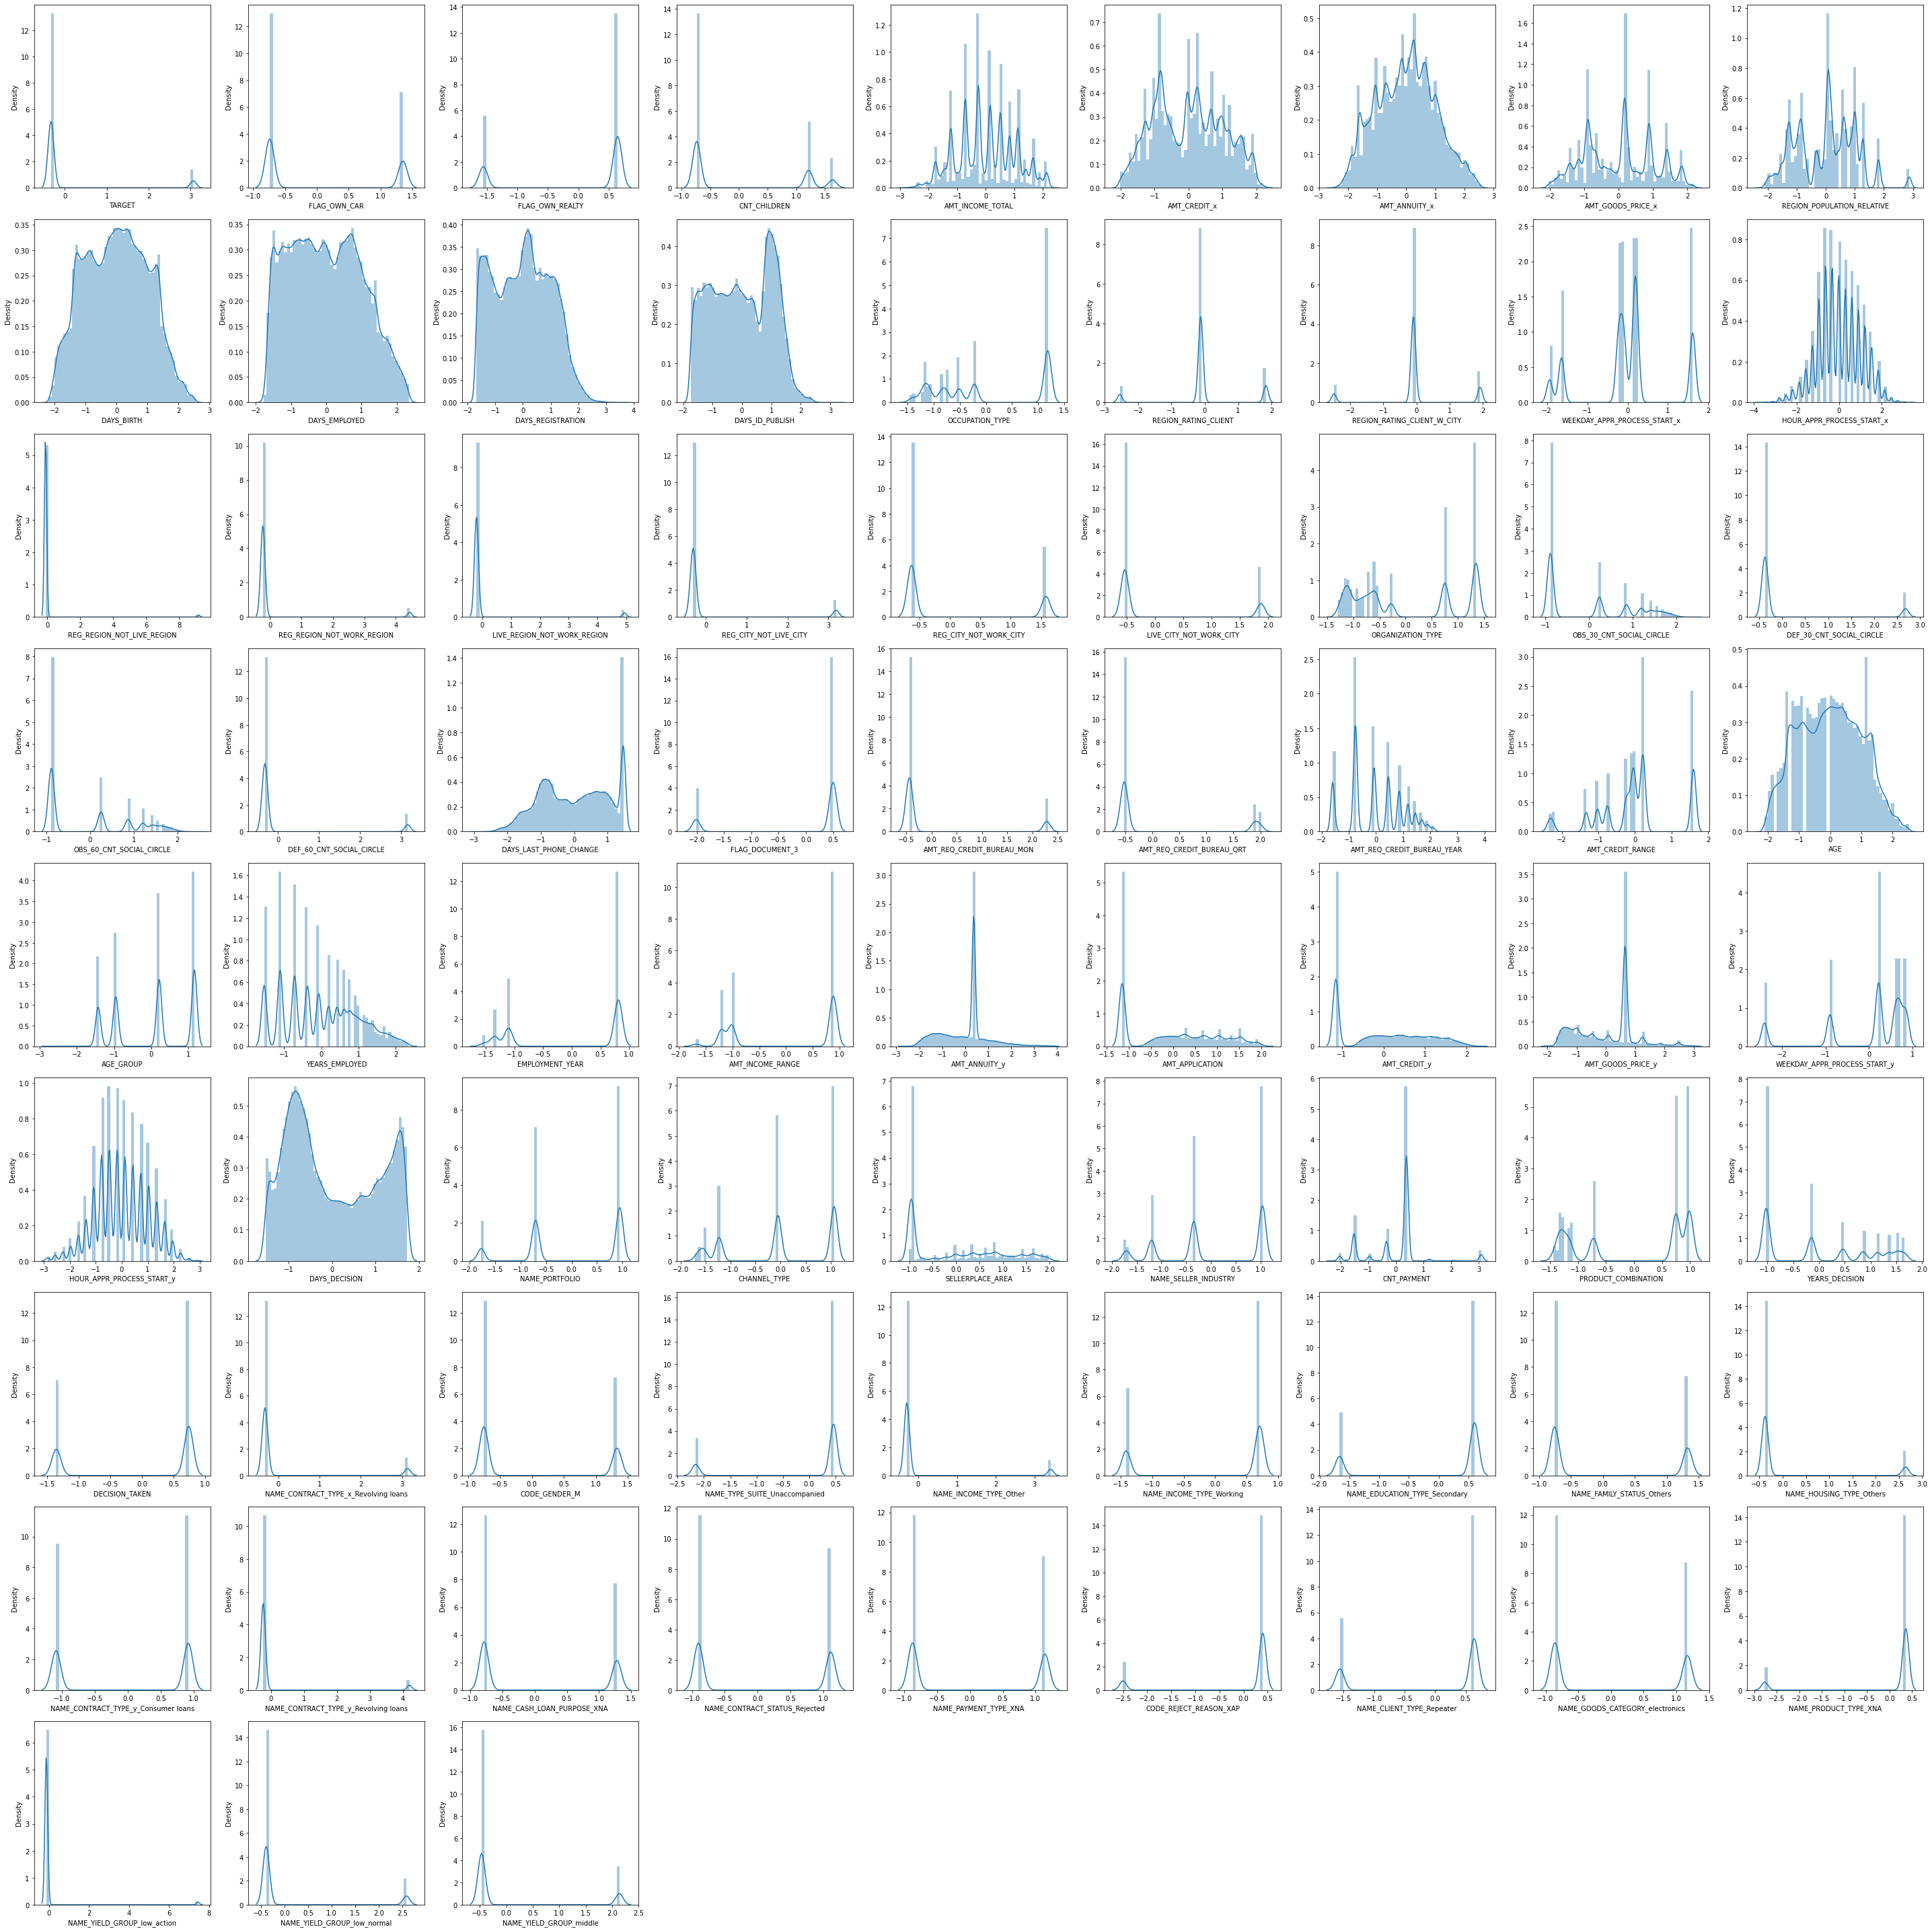

In [341]:
count=1
for i in dffs.columns:
    plt.subplot(9,9,count)
    sns.distplot(dffs[i])
    count +=1
plt.tight_layout()
plt.show()

In [342]:
# it can be seen that after transformation the data has been normally distributed!

In [343]:
!pip install mlxtend

In [344]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV


In [345]:
lr = LogisticRegression()

In [346]:
X = dffs.drop('TARGET',axis=1)
y = dffs['TARGET']

sfs1 = SequentialFeatureSelector(estimator = lr, k_features = 50, forward = True, scoring = 'accuracy')

sfs1.fit(dffs.drop('TARGET',axis=1),
         dffs['TARGET']) # x, y

In [347]:
from sklearn.decomposition import PCA

In [348]:
pc = PCA(n_components=74)
dfpca = pc.fit_transform(X)

In [349]:
dfpca = pd.DataFrame(dfpca,columns = np.arange(1,75))

In [350]:
lis = []
add = 0
for i in pc.explained_variance_ratio_:
    add += i 
    lis.append(add)
print(lis)

[0.12851959117788295, 0.18386234950531777, 0.23092183585106515, 0.2751565389365063, 0.3117144597693119, 0.3458835444120846, 0.3757022149527309, 0.4040583874097055, 0.4309008571413644, 0.4533090950341157, 0.47442447944653876, 0.49465158407295706, 0.5143820579113269, 0.5329862050815273, 0.5508414195806028, 0.5678271981397731, 0.5846307320815924, 0.6009782987126587, 0.616773180204214, 0.6321483232916283, 0.6473136189291154, 0.6619664124532788, 0.6761531189905636, 0.6901077159172153, 0.7039106119564287, 0.7175163036047317, 0.7309736904357869, 0.7442934460783996, 0.7573986125262187, 0.7703520295532726, 0.7829725201803943, 0.7953926070436139, 0.8074189858310019, 0.8190156698953143, 0.8304403922809833, 0.8417201304552513, 0.852632205441381, 0.8630579507569838, 0.8731226953903164, 0.8827373529660224, 0.8921204430113149, 0.9013658073603591, 0.9104434728457361, 0.9194146538211161, 0.9283125447632674, 0.9368191649274941, 0.9447783647383599, 0.9521108928794211, 0.959017682984321, 0.964426426822241

In [351]:
tuple(enumerate(lis))


((0, 0.12851959117788295),
 (1, 0.18386234950531777),
 (2, 0.23092183585106515),
 (3, 0.2751565389365063),
 (4, 0.3117144597693119),
 (5, 0.3458835444120846),
 (6, 0.3757022149527309),
 (7, 0.4040583874097055),
 (8, 0.4309008571413644),
 (9, 0.4533090950341157),
 (10, 0.47442447944653876),
 (11, 0.49465158407295706),
 (12, 0.5143820579113269),
 (13, 0.5329862050815273),
 (14, 0.5508414195806028),
 (15, 0.5678271981397731),
 (16, 0.5846307320815924),
 (17, 0.6009782987126587),
 (18, 0.616773180204214),
 (19, 0.6321483232916283),
 (20, 0.6473136189291154),
 (21, 0.6619664124532788),
 (22, 0.6761531189905636),
 (23, 0.6901077159172153),
 (24, 0.7039106119564287),
 (25, 0.7175163036047317),
 (26, 0.7309736904357869),
 (27, 0.7442934460783996),
 (28, 0.7573986125262187),
 (29, 0.7703520295532726),
 (30, 0.7829725201803943),
 (31, 0.7953926070436139),
 (32, 0.8074189858310019),
 (33, 0.8190156698953143),
 (34, 0.8304403922809833),
 (35, 0.8417201304552513),
 (36, 0.852632205441381),
 (37, 0.

In [352]:
pcadf = dfpca[np.arange(1,43)]

In [353]:
pcadf['TARGET'] = mergeddf['TARGET']

In [354]:
pcadf['TARGET'].value_counts()

0    501129
1     53409
Name: TARGET, dtype: int64

In [355]:
pcadf

1         2         3         4         5         6         7         8         9        10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        37        38        39        40        41        42  TARGET
0       4.189826  2.083112 -1.171418  3.018158 -0.389072  0.485449 -1.959533 -0.619128  0.039901  2.548251  1.689040 -1.110886 -2.415195 -0.557827 -0.320621  0.614710 -1.001663 -1.891797 -0.368187 -0.570272  0.387375  0.930718 -1.060757  0.533110 -0.054447 -0.143409  1.667185 -0.993024 -0.844357  0.272764  1.153200 -0.789039  0.221096 -1.168810 -0.436915 -1.379317 -0.783906 -0.853517 -0.213686  2.415752 -1.996632 -1.161730       0
1       3.662667 -2.439888  1.032151 -2.979029 -2.132813 -0.491093 -0.024257 -0.910532 -2.858367 -2.556569  2.335410 -0.688522 -0.642913  1.757872 -0.161600 -0.533703 -0.800962 -1.570058  0.056537 -1.300772  1.598598  0.218586 -1.267860 -0.605889 -0.068652 -0.162084 -0.349503 -0.435949  0.866652  0.049516 -0.107012 -0.216900  1.034291 -1.072915  0.886742  0.012224  1.782962  0.037723  0.092904  0.707768 -0.331257 -0.607097       0
2      -3.615531  1.119390 -0.013867 -1.409577 -0.377904  0.682386 -0.608800  1.015532 -2.388366  0.821645 -1.702269  0.709674  0.748620  2.385876  3.097893  2.229063  0.069274 -1.184699  0.359009  0.108046 -0.843113  0.216136  0.551389 -1.342537  1.396292 -0.490951  1.286426  0.962849  0.060882 -0.500295 -0.193151 -0.604806 -0.308244  0.541817  0.421909  0.486465  0.039222  0.112396  0.533398  0.697758  0.215014 -0.450421       0
3      -4.015302  1.307666 -0.493390 -1.656836 -0.449473  0.902939 -0.259992  0.067225 -1.913897  0.644718 -0.832078  0.388166  1.732864  0.285215 -1.071985  1.568132  0.365939 -0.496606 -0.519359  0.505073 -0.720995  0.174494  0.432588 -1.217663  1.645655 -0.324626  0.985012  0.813839  0.318060 -0.330918 -0.537815 -0.236803 -0.244176  0.350955  0.371441  0.535481  0.078258  0.183242  0.276561  0.748812  0.414129 -0.859890       0
4       1.979939  1.325374 -0.503590 -1.945407 -0.427959  0.607583 -0.366126  0.622656 -2.922610  0.812372 -1.310151  0.774518  0.569840  1.485997 -1.082705  1.622161 -0.015834 -1.912784  0.815029  0.058851 -0.479730 -0.122376  0.142987 -1.320343  1.361496 -0.606045  0.491950 -0.398956  0.065065 -0.126472 -0.694819 -0.309749 -0.551032  0.633307  0.471063 -0.645537 -0.542922 -0.141240  0.059366  0.698884 -0.358151 -1.294611       0
...          ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...       ...     ...
554533  3.377464  2.433908 -2.162618 -2.266020  2.034044 -0.668018  3.033681 -0.053036  0.743487  0.564243  0.140093 -0.998398 -0.272679  0.221977 -0.255285  1.498660  0.940271  0.243465  0.334478 -0.308724 -1.548386 -2.888572  0.351924 -1.330226  1.620754  2.164351 -0.667052 -0.391106 -0.861367 -0.811707  1.127710  0.207664 -0.115556 -0.453200  1.158302  0.574261  0.540986  0.052172  0.188079 -0.049010 -0.625376  0.735584       0
554534  2.846920  2.264229 -2.659905 -2.524548  2.074419 -0.700132  2.982603  0.232156  0.663452  0.471621 -0.044975 -0.907957 -0.311529  0.114214 -0.117374  1.488924  1.050184  0.111211  0.772600 -0.413356 -1.398231 -2.927770  0.553252 -1.623195  0.935694  2.217990 -0.979012 -0.084462 -0.232449 -0.547301  0.143154  1.301863  0.095898 -0.665327  1.034043  0.471700  0.304684 -0.104043 -0.034308  0.274271 -0.049593  0.348803       0
554535  1.833576 -0.688976 -1.855613 -1.608855 -0.899194 -1.322691  1.250823  1.464901  1.039390  2.

In [356]:
x = pcadf.drop('TARGET',axis=1)
y=pcadf['TARGET']

In [357]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=10)

In [358]:
pred = lr.fit(xtrain,ytrain).predict(xtest)

In [359]:
from sklearn.metrics import accuracy_score

In [360]:
accuracy_score(ytest,pred)

0.9052836585277888

In [361]:
!pip install imblearn

In [362]:
from imblearn.over_sampling import SMOTE

# Load the data and split it into features and target
X, y = x,y

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the data and split it into training and test sets
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# The training data is now balanced
print(f'Original training data shape: {X.shape}')
print(f'Resampled training data shape: {X_resampled.shape}')


Original training data shape: (554538, 42)
Resampled training data shape: (1002258, 42)


In [363]:
pred = lr.fit(X_train,y_train).predict(X_test)

In [364]:
accuracy_score(y_test,pred)

0.6250922914213877

In [365]:
from sklearn.ensemble import RandomForestClassifier

In [366]:
rf = RandomForestClassifier(n_estimators=100)

In [367]:
predrf = rf.fit(X_train,y_train).predict(X_test)

In [368]:
accuracy_score(y_test,predrf)

0.9667401672220781

In [369]:
from sklearn.metrics import classification_report

In [370]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    100354
           1       0.98      0.96      0.97    100098

    accuracy                           0.97    200452
   macro avg       0.97      0.97      0.97    200452
weighted avg       0.97      0.97      0.97    200452



In [371]:
import pickle 

In [372]:
rf = RandomForestClassifier(n_estimators=100)
predrft = rf.fit(X_train,y_train).predict(X_train)

In [373]:
print(classification_report(y_train,predrft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    400775
           1       1.00      1.00      1.00    401031

    accuracy                           1.00    801806
   macro avg       1.00      1.00      1.00    801806
weighted avg       1.00      1.00      1.00    801806



In [374]:
from sklearn.ensemble import AdaBoostClassifier

In [375]:
abc = AdaBoostClassifier(n_estimators=100)

In [376]:
predabc = abc.fit(X_train,y_train).predict(X_test)

In [377]:
print(classification_report(y_test,predabc))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65    100354
           1       0.65      0.68      0.67    100098

    accuracy                           0.66    200452
   macro avg       0.66      0.66      0.66    200452
weighted avg       0.66      0.66      0.66    200452



In [378]:
!pip install xgboost

In [379]:
from xgboost import XGBClassifier

In [380]:
xgb = XGBClassifier(n_estimators=100)

In [381]:
predabc = xgb.fit(X_train,y_train).predict(X_test)

In [382]:
print(classification_report(y_test,predabc))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75    100354
           1       0.74      0.80      0.77    100098

    accuracy                           0.76    200452
   macro avg       0.76      0.76      0.76    200452
weighted avg       0.76      0.76      0.76    200452



In [383]:
from sklearn.tree import DecisionTreeClassifier

In [384]:
dt = DecisionTreeClassifier()

In [385]:
preddt = dt.fit(X_train,y_train).predict(X_train)

In [386]:
print(classification_report(y_train,preddt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    400775
           1       1.00      1.00      1.00    401031

    accuracy                           1.00    801806
   macro avg       1.00      1.00      1.00    801806
weighted avg       1.00      1.00      1.00    801806



In [387]:
 y_resampled

0          0
1          0
2          0
3          0
4          0
          ..
1002253    1
1002254    1
1002255    1
1002256    1
1002257    1
Name: TARGET, Length: 1002258, dtype: int64

In [388]:
X_resampled['TARGET'] = y_resampled

In [389]:
X_resampled.to_csv('finaldataresampled.csv', index=False)